<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/CGR_Pcts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Options

In [ ]:
options(scipen=999)

options(repr.plot.width=14, repr.plot.height=15)

# Packages

In [ ]:
library(tidyverse)
library(ggplot2)
library(lubridate)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("wesanderson")
library(wesanderson)
install.packages("gapminder")
library(gapminder)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Need a 14 color pallette colorRampPalette(brewer.pal(name="Dark2", n = 8))(14)



# Gender

# Data

In [ ]:
CGR_gender_compiled <- read.csv("/content/CGR_2_Gender - CGR_2Gender_Compiled.csv")

In [ ]:
gender_pct <- read.csv("/content/CGR_2_Gender - Compiled_3.csv")

In [ ]:
head(CGR_gender_compiled)
tail(CGR_gender_compiled)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0
2,2016,Cayuga,Felony Total,431,326,105,0
3,2016,Cayuga,Drug,51,36,15,0
4,2016,Cayuga,Violent,104,88,16,0
5,2016,Cayuga,DWI,38,25,13,0
6,2016,Cayuga,Other,238,177,61,0


,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
303,2019,Yates,Other,44,31,13,0
304,2019,Yates,Misdemeanor Total,204,153,51,0
305,2019,Yates,Drug,28,22,6,0
306,2019,Yates,DWI,58,42,16,0
307,2019,Yates,Property,26,19,7,0
308,2019,Yates,Other,92,70,22,0


##Display the Data for Total Arrests

In [ ]:
# Total arrests for both 2016 & 2019
Sum <- colSums(CGR_gender_compiled[ , 4, drop= FALSE])
Sum

Total.Arrests 
       230970

### Display Total Arrests by Year

**2016 Total Arrests**

In [ ]:
Total_Arrests_16 <- CGR_gender_compiled %>%
                filter(Year == "2016") 
head(Total_Arrests_16)
tail(Total_Arrests_16)

In [ ]:
# Total arrests for both 2016 
colSums(Total_Arrests_16[ , 4, drop= FALSE])


Total.Arrests 
       124185

**2019 Total Arrests**

In [ ]:
Total_Arrests_19 <- CGR_gender_compiled %>%
                filter(Year == "2019") 
head(Total_Arrests_19,3)
tail(Total_Arrests_19,3)

In [ ]:
# Total arrests for both 2019 
colSums(Total_Arrests_19[ , 4, drop= FALSE])

Total.Arrests 
       106785

Quick check.  Add 2016 total and 2019 toatal.

In [ ]:
124185 + 106785

[1] 230970

## Display the Total Arrests  by Gender

In [ ]:
# Total arrests for Males
colSums(CGR_gender_compiled[ , 5, drop= FALSE])

Male 
164391

In [ ]:
# Total arrests for Females
colSums(Total_Arrests_19[ , 6, drop= FALSE])

Female 
 30999

Total Arrests of Males in 2016 & 2019

## Calculate the change over time for TotalArrest, Male, Female.

Warning message:
“Removed 26 rows containing missing values (position_stack).”
Warning message:
“Removed 272 rows containing missing values (geom_bar).”


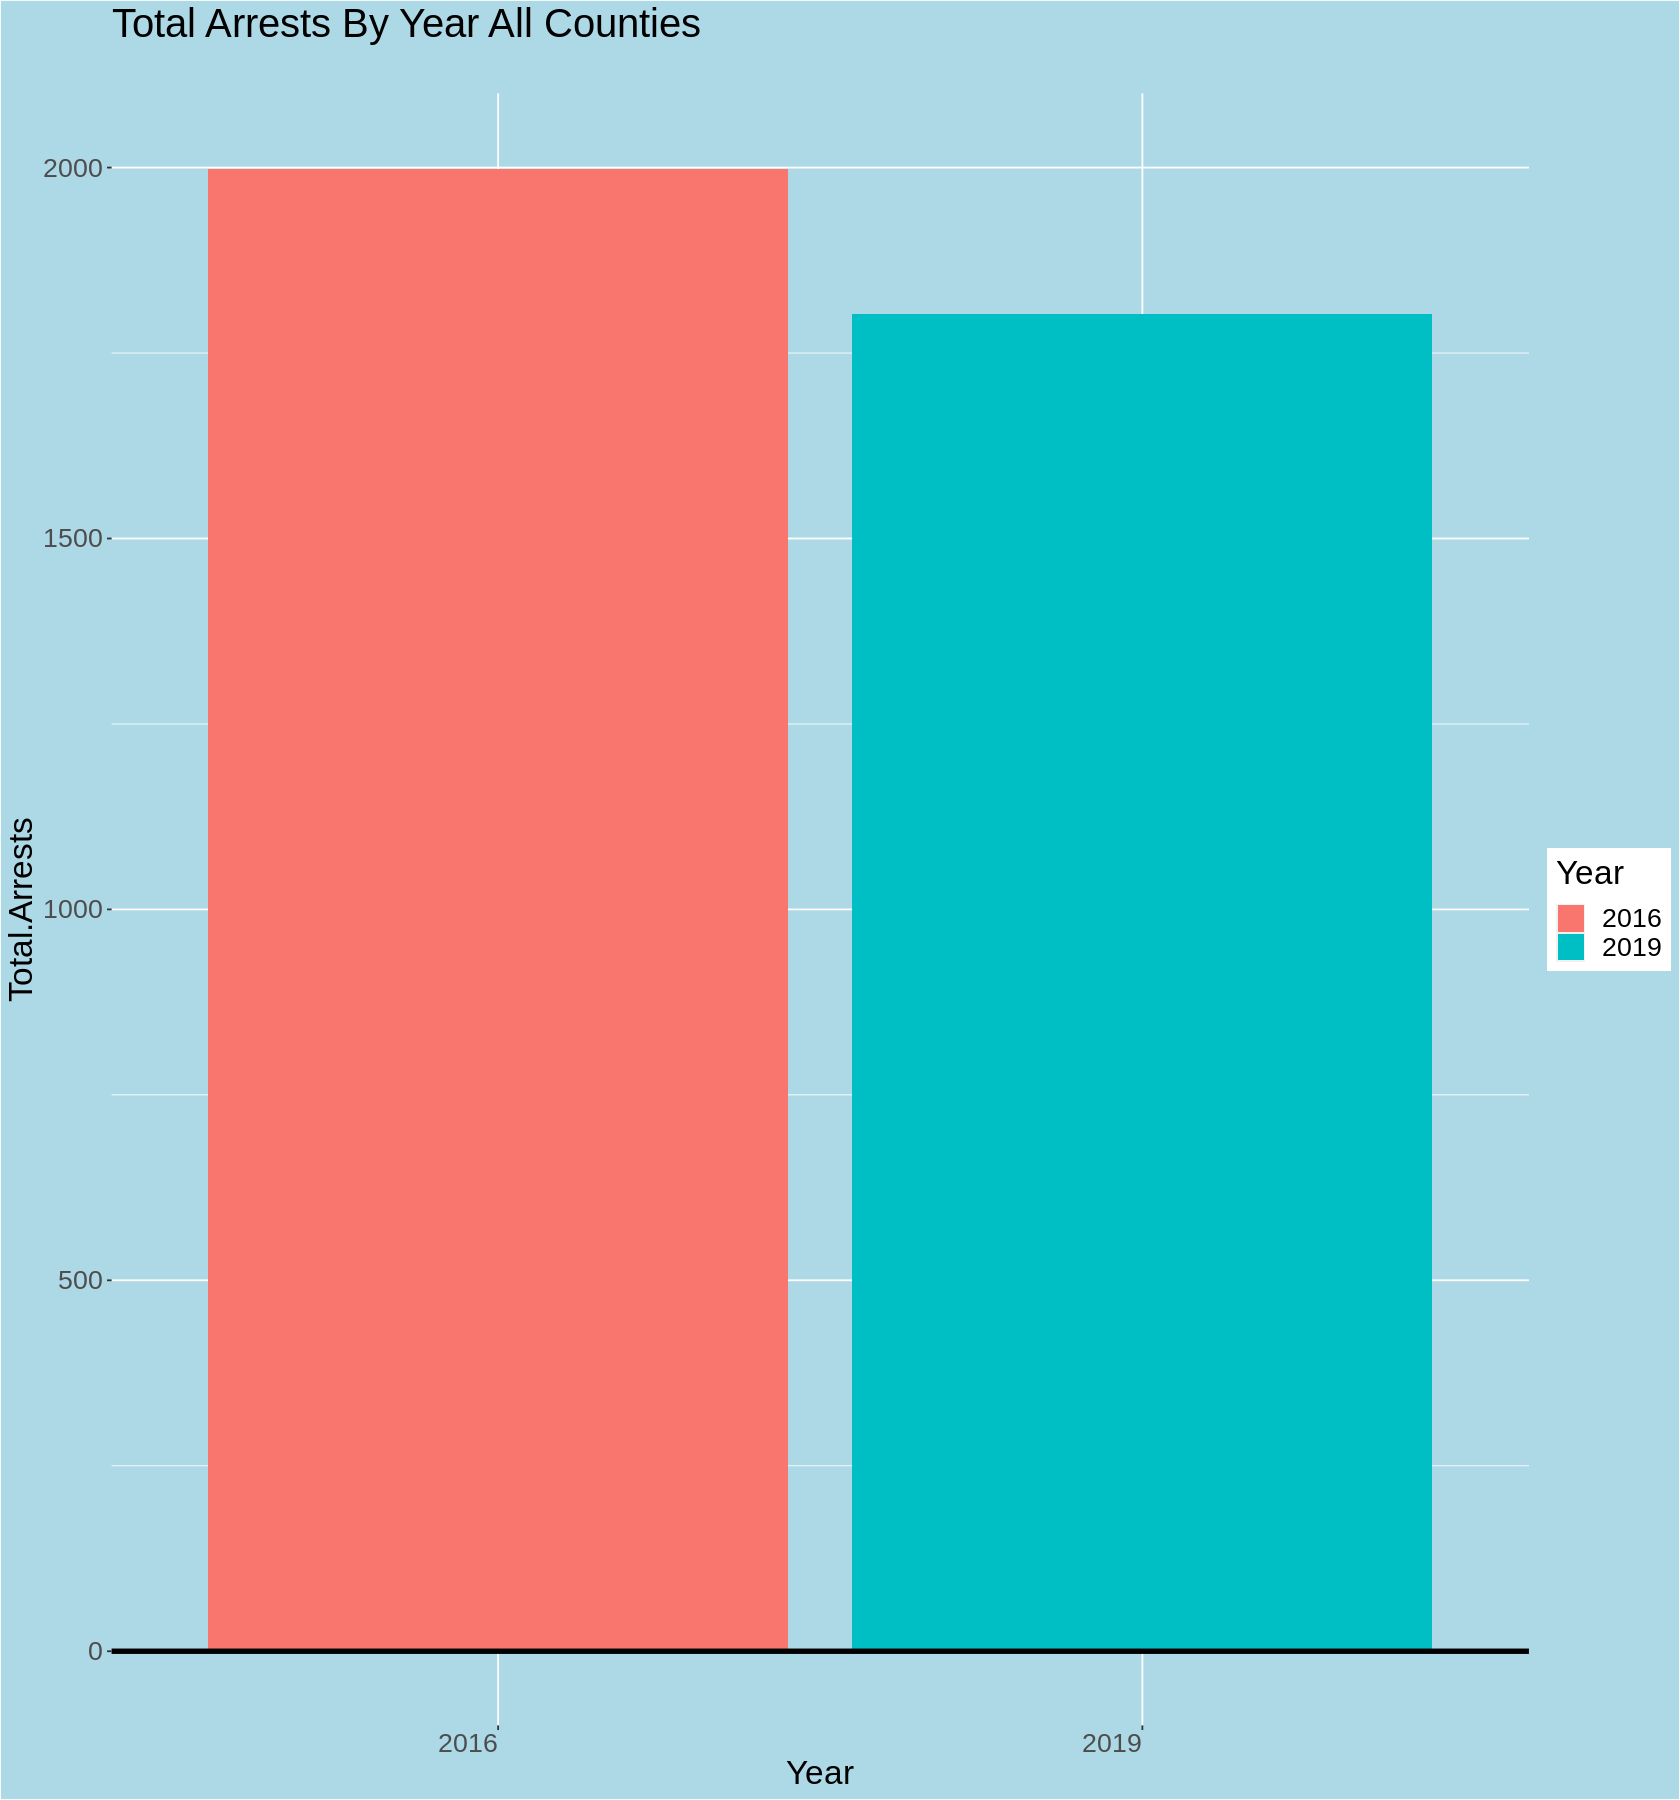

In [ ]:
ggplot(CGR_gender_compiled, aes(x= Year , y = Total.Arrests , fill = Year)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,2000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Total Arrests By Year All Counties",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) 

**Calculate change over time for Total Arrests**

#124185 (2016) - 106785 (2019) = 17400

17400 / 124185 = 0.140113540282643

The rate of decline/decay is appx 14% over the 4 year period.

124185 * 0.86 = 106799





**Calculate the change over time for Males for Total Arrests**

Warning message:
“Removed 15 rows containing missing values (position_stack).”
Warning message:
“Removed 281 rows containing missing values (geom_bar).”


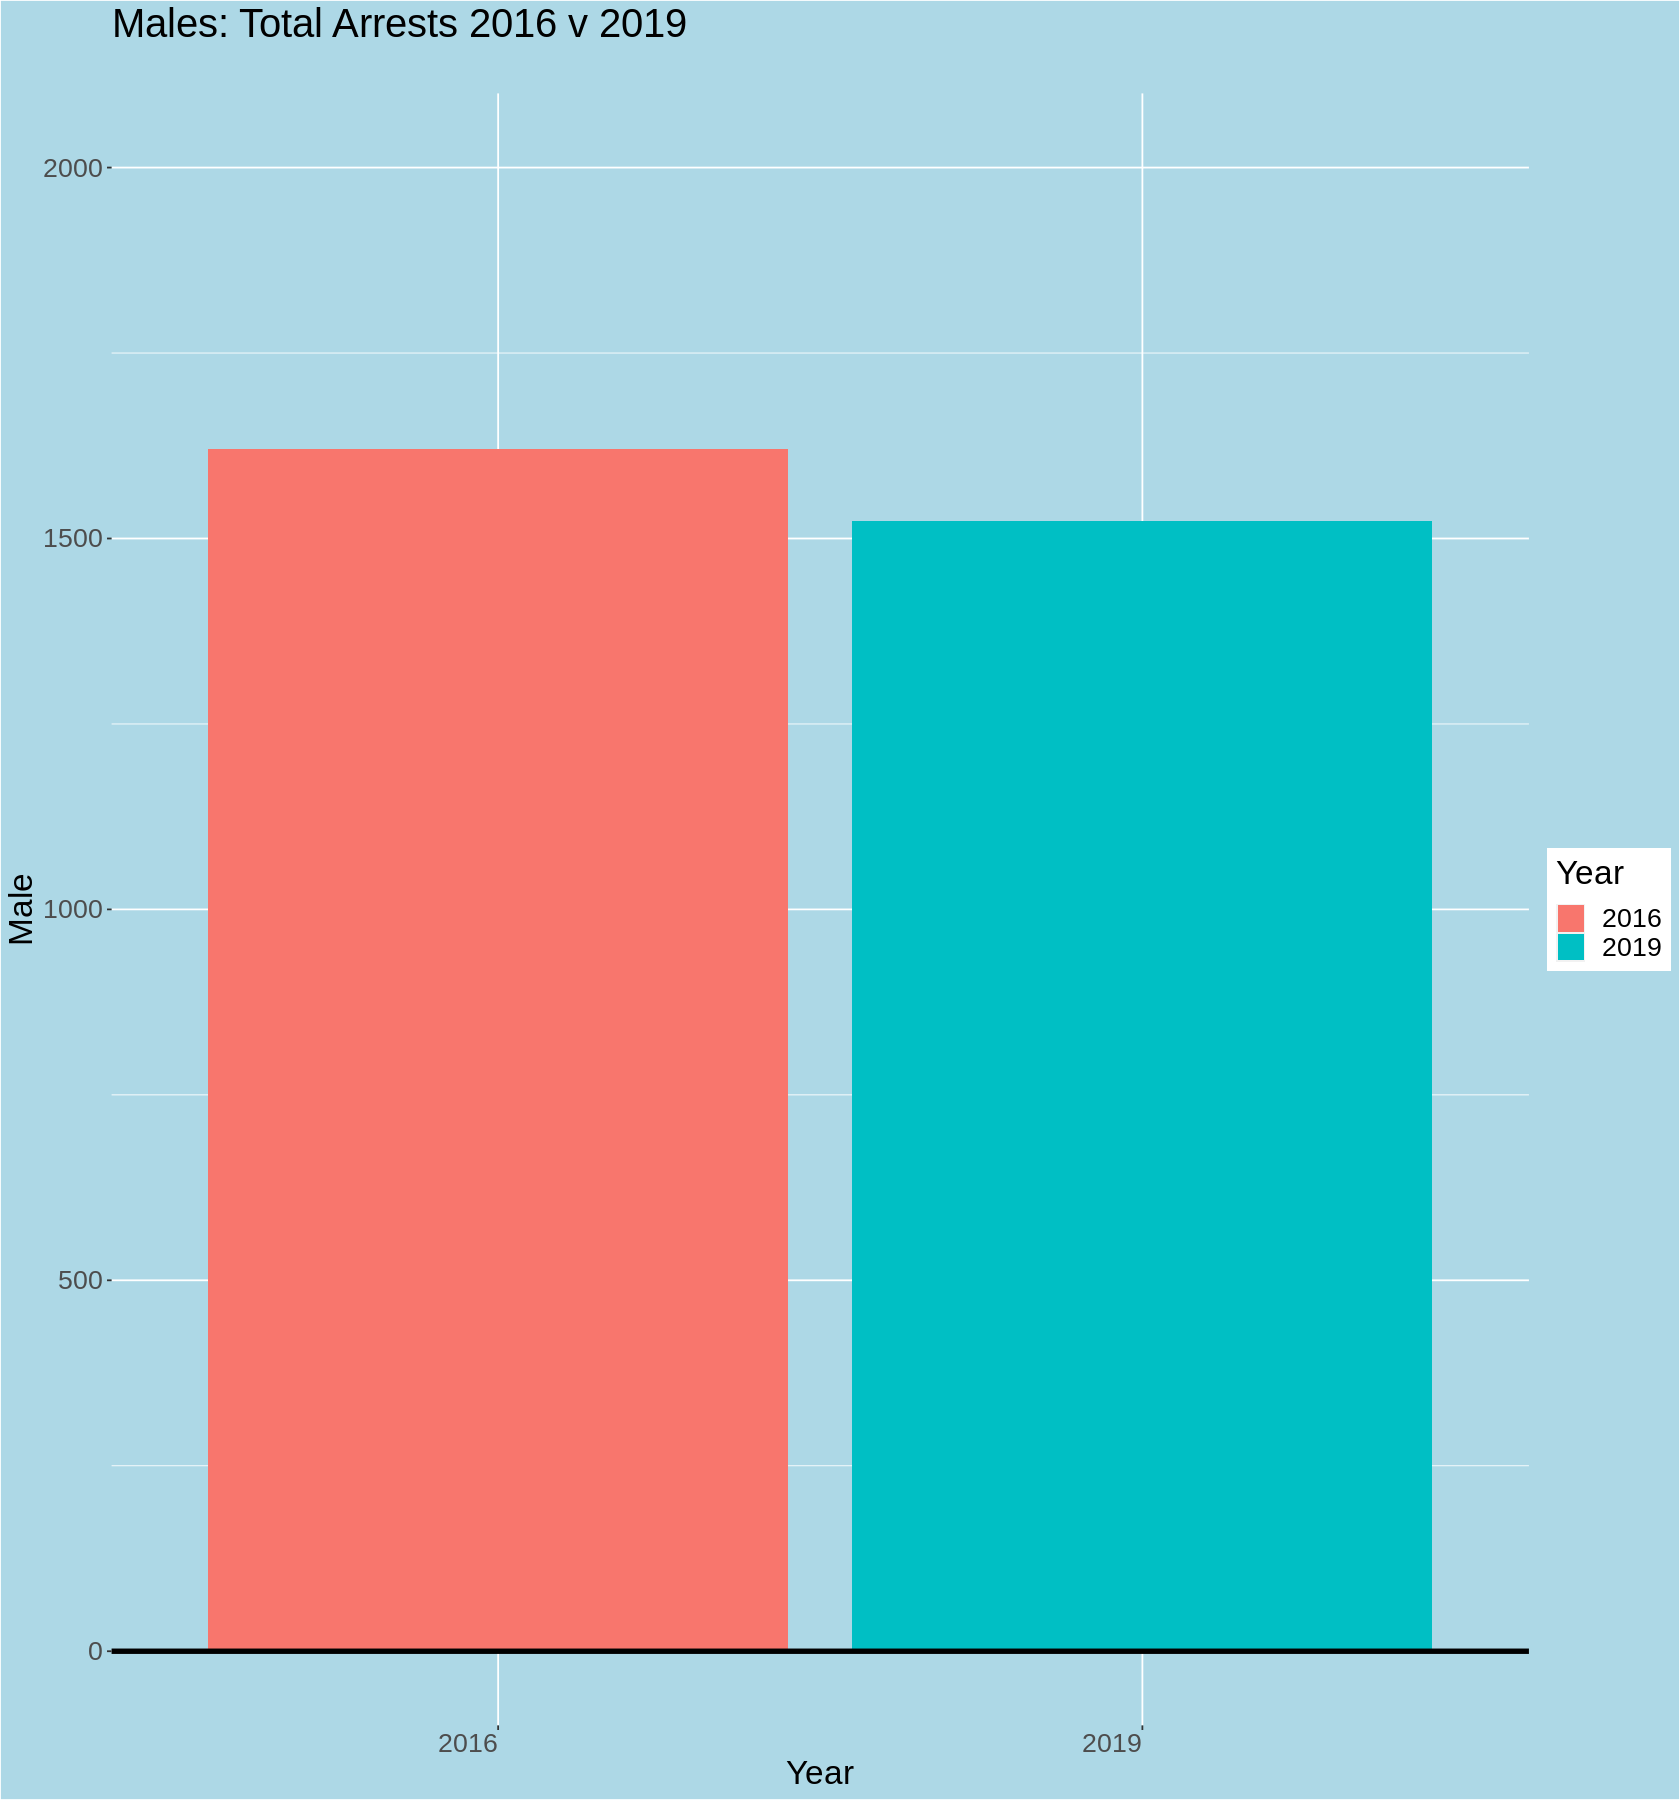

In [ ]:
ggplot(CGR_gender_compiled, aes(x= Year , y = Male , fill = Year)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,2000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Males: Total Arrests 2016 v 2019",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue"))

In [ ]:
Total_Arrests_16 <- CGR_gender_compiled %>%
                filter(Year == "2016") 
head(Total_Arrests_16 ,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0
2,2016,Cayuga,Felony Total,431,326,105,0
3,2016,Cayuga,Drug,51,36,15,0


In [ ]:
Total_Arrests_19 <- CGR_gender_compiled %>%
                filter(Year == "2019")
head(Total_Arrests_19,3) 

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2019,Cayuga,Total Arrests,1241,905,336,0
2,2019,Cayuga,Felony Total,411,309,102,0
3,2019,Cayuga,Drug,66,43,23,0


In [ ]:
# Total arrests for Males
colSums(Total_Arrests_16[ , 5, drop= FALSE])

Male 
88623

In [ ]:
# Total arrests for Males
colSums(Total_Arrests_19[ , 5, drop= FALSE])

Male 
75768

# **What percentage change was there inthe total arrests of males between  2016 and 2019?**

Male: 88623(2016) - Male: 75768(2019) = 12855

12855 / 88623 = 0.145052638705528

There was appx a 14.5% decline in the arrests of males between 2016 and 2019. **bold text**

# **What percentage change was there in the total arrests of females between 2016 and 2019?**

There wsa a appx 12% drop in Total arrests of females.

In [ ]:
# Total arrests for Males
colSums(Total_Arrests_16[ , 6, drop= FALSE])

Female 
 35550

In [ ]:
# Total arrests for Males
colSums(Total_Arrests_19[ , 6, drop= FALSE])

Female 
 30999

In [ ]:
#Female: 35550(2016) - Female: 30999(2019) = 4551
35550 - 30999

[1] 4551

In [ ]:
#
4551 / 35550

[1] 0.1280169

In [ ]:
35550 * (1 - 0.128016877637131 )

[1] 30999

Warning message:
“Removed 8 rows containing missing values (position_stack).”
Warning message:
“Removed 271 rows containing missing values (geom_bar).”


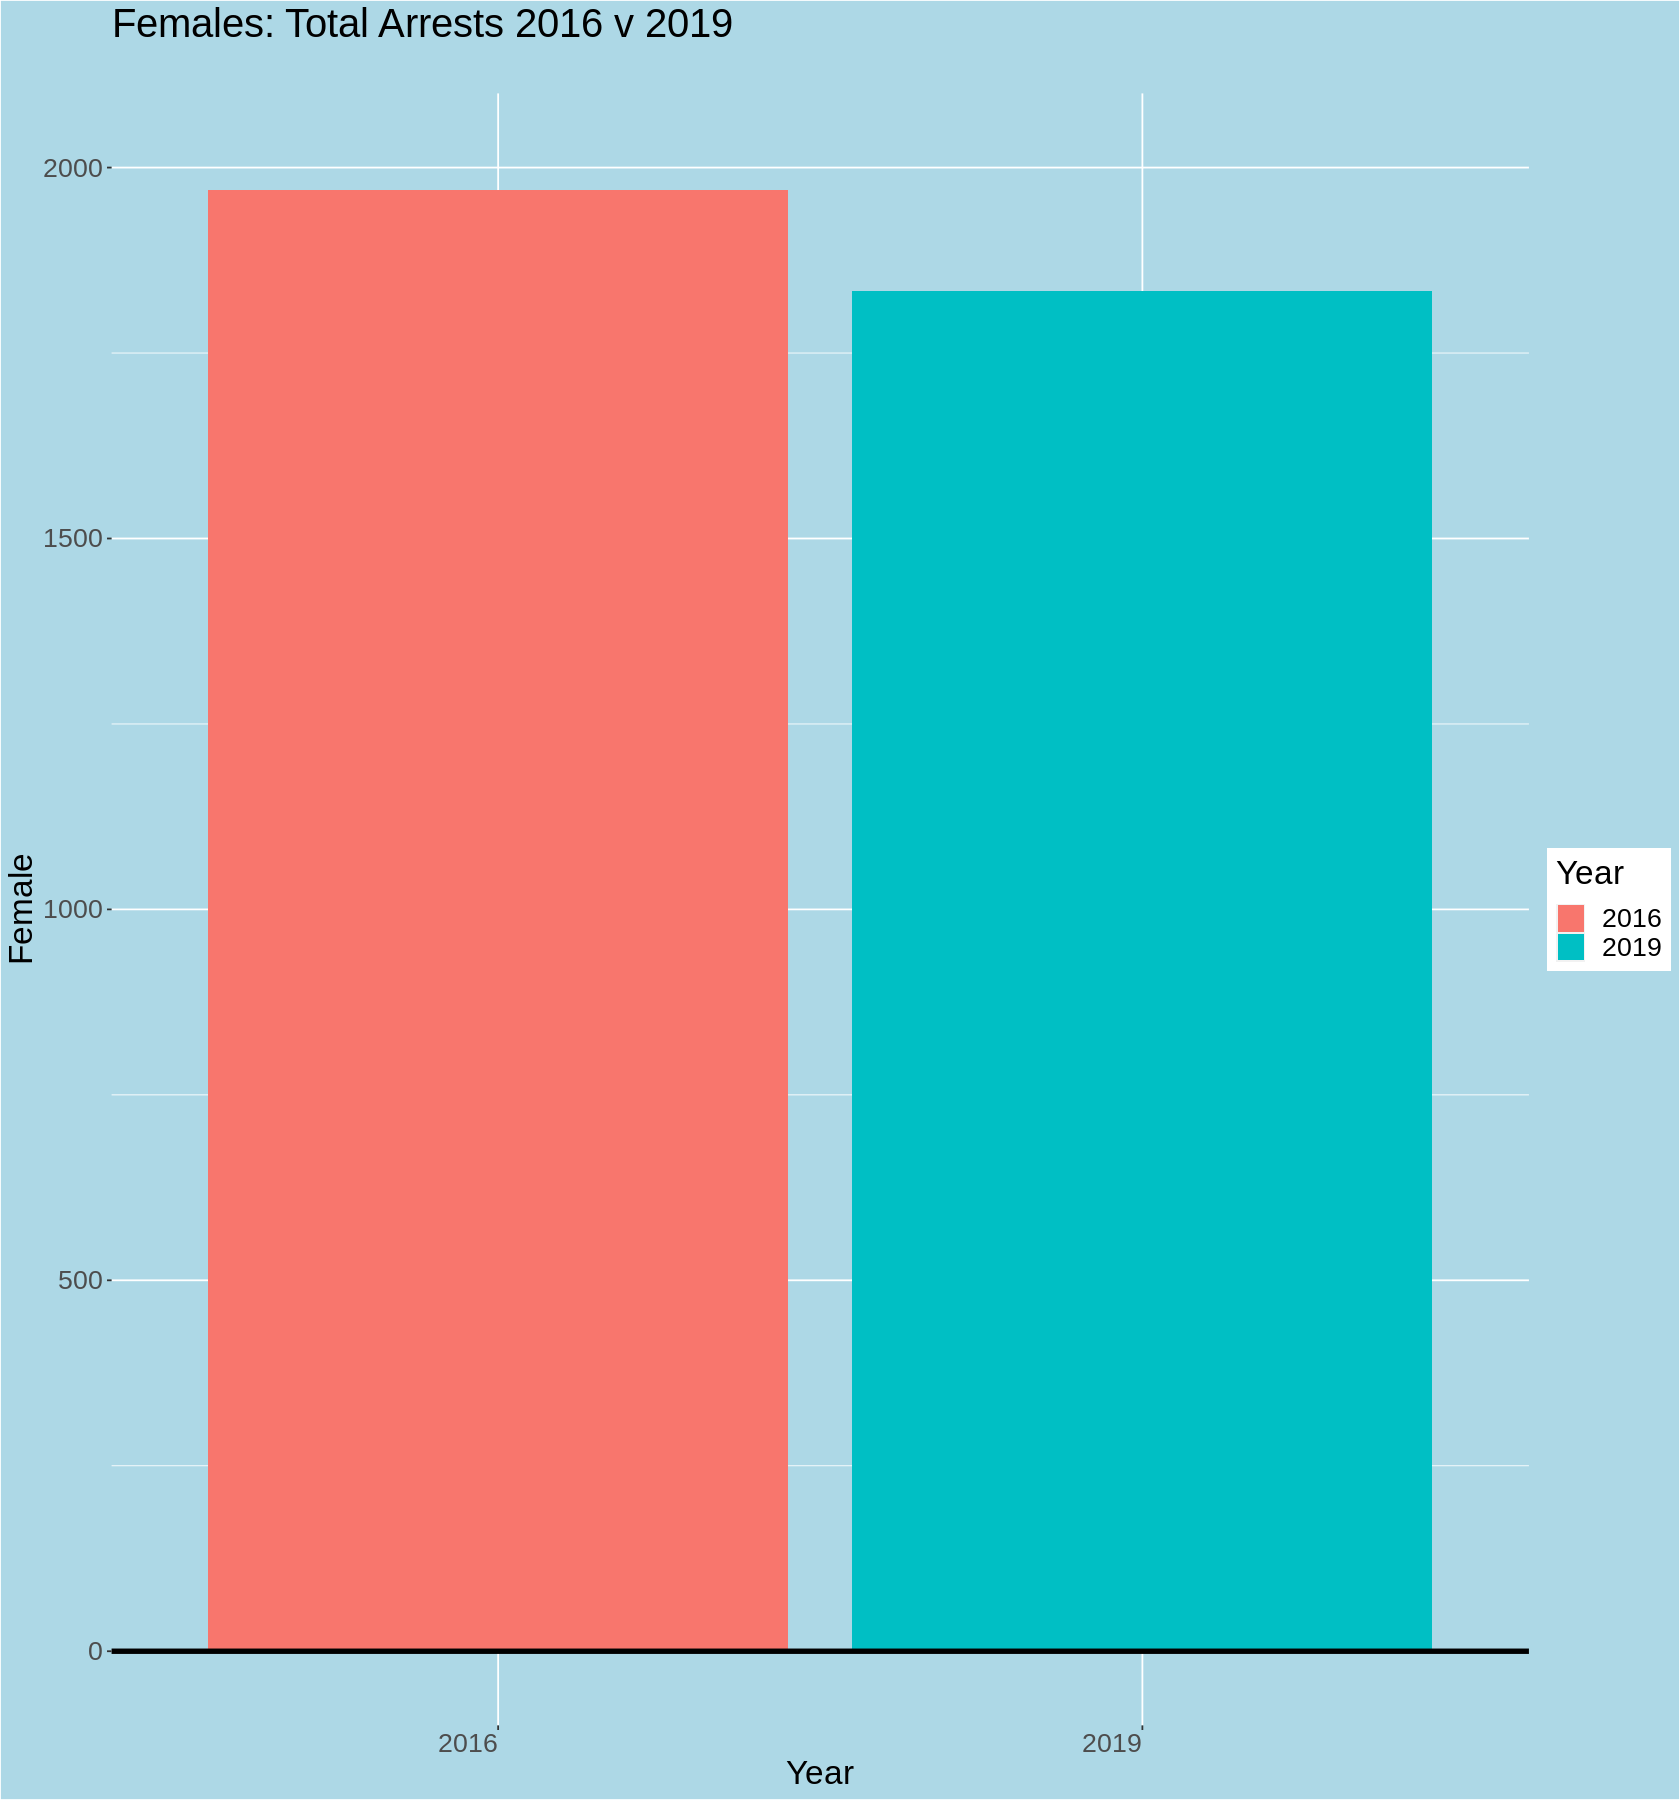

In [ ]:
ggplot(CGR_gender_compiled, aes(x= Year , y = Female , fill = Year)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,2000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Females: Total Arrests 2016 v 2019",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue"))

In [ ]:
str(CGR_gender_compiled )

'data.frame':	308 obs. of  7 variables:
 $ Year         : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ County       : chr  "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ Crime        : chr  "Total Arrests" "Felony Total" "Drug" "Violent" ...
 $ Total.Arrests: int  1374 431 51 104 38 238 943 77 173 316 ...
 $ Male         : int  969 326 36 88 25 177 643 59 125 201 ...
 $ Female       : int  405 105 15 16 13 61 300 18 48 115 ...
 $ Not.Reported : int  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
CGR_gender_compiled$Year <- as.factor(CGR_gender_compiled$Year)

Warning message:
“Removed 26 rows containing missing values (position_stack).”
Warning message:
“Removed 272 rows containing missing values (geom_bar).”


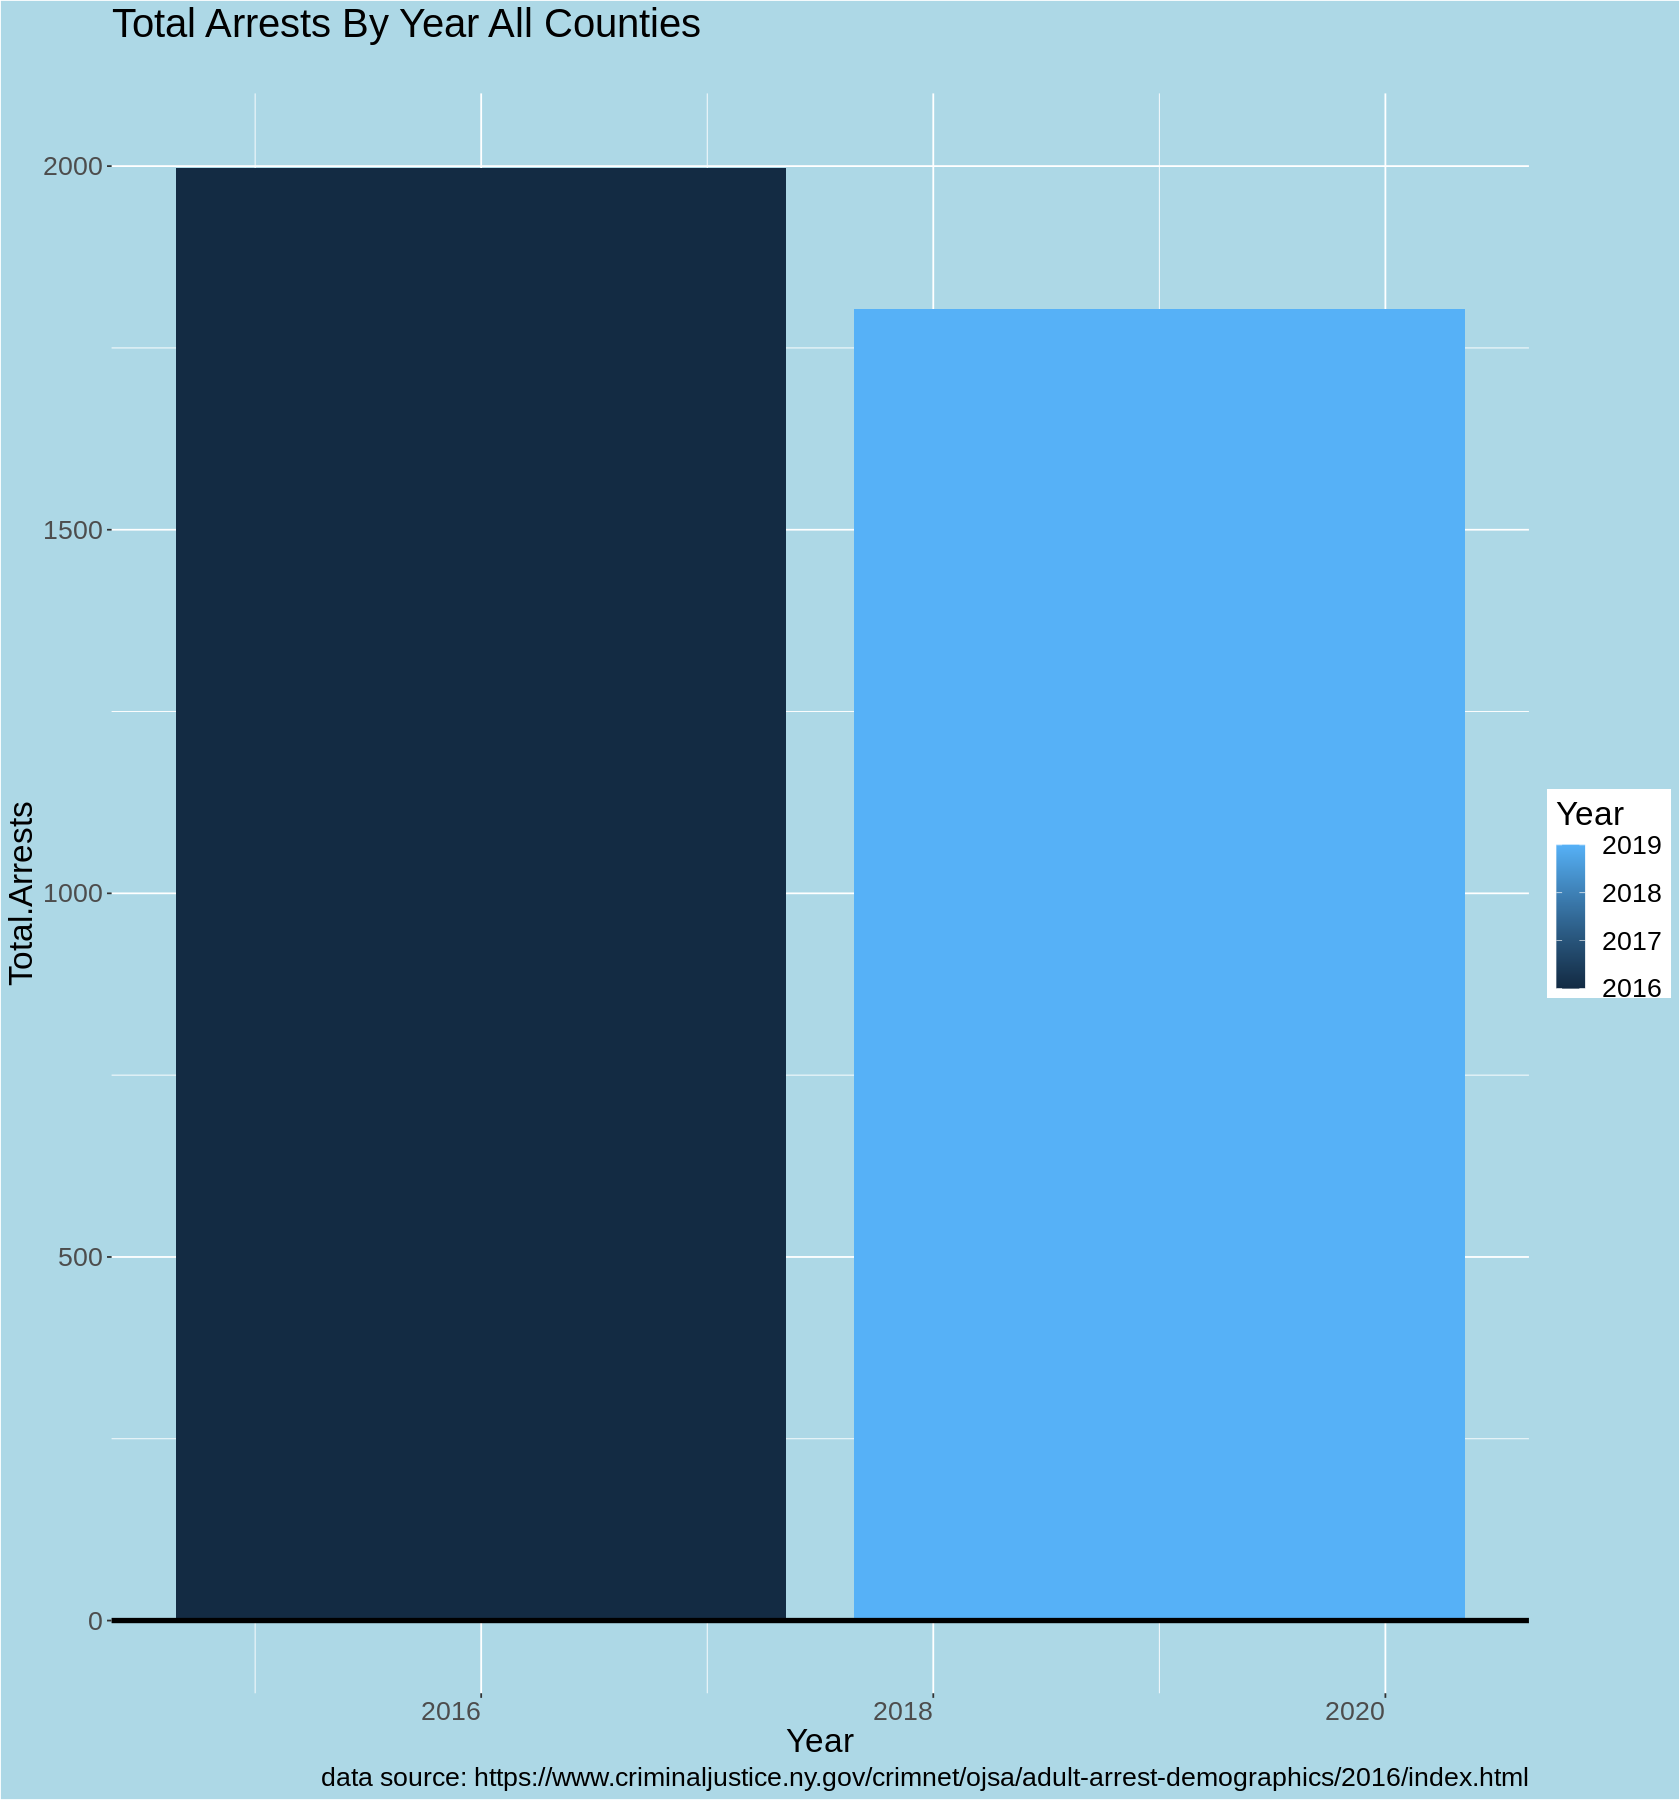

In [ ]:
ggplot(CGR_gender_compiled, aes(x= Year , y = Total.Arrests , fill = Year)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,2000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title =  "Total Arrests By Year All Counties",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 20)) +
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) 

In [ ]:
labs(title =  "2019:  Crime in the Finger Lake Region",
                    subtitle = "Please Note the Log Scale On the Y-Axis",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15))  

# Absolute Change



## Let us first look at the change in Total Crime

In [ ]:
Total_Crime <- gender_pct %>%
              filter(Crime == "Total Arrests")

In [ ]:
Total_Crime

Year,County,Crime,Total.Arrests,Male,Female,Not.Reported,Year_19,County_19,Crime_19,⋯,Male_19,Female_19,Not.Reported_19,Pct_Change_Total_Arrests,PctChangTotCorected,PctChangeMale,PctChangeFemale,TotalChange,ChangeMale,ChangeFemale
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2016,Cayuga,Total Arrests,1374,969,405,0,2019,Cayuga,Total Arrests,⋯,905,336,0,0.9032023,-0.09679767,0.9339525,0.8296296,-133,-64,-69
2016,Chemung,Total Arrests,2115,1360,755,0,2019,Chemung,Total Arrests,⋯,1434,603,1,0.9635934,-0.03640662,1.0544118,0.7986755,-77,74,-152
2016,Cortland,Total Arrests,1349,967,382,0,2019,Cortland,Total Arrests,⋯,782,292,0,0.7961453,-0.20385471,0.8086867,0.7643979,-275,-185,-90
2016,Livingston,Total Arrests,1352,949,402,1,2019,Livingston,Total Arrests,⋯,682,341,0,0.7566568,-0.24334320,0.7186512,0.8482587,-329,-267,-61
2016,Monroe,Total Arrests,14899,10880,4018,1,2019,Monroe,Total Arrests,⋯,9006,3584,0,0.8450232,-0.15497684,0.8277574,0.8919861,-2309,-1874,-434
2016,Onondaga,Total Arrests,11020,7826,3193,1,2019,Onondaga,Total Arrests,⋯,6729,2793,1,0.8641561,-0.13584392,0.8598262,0.8747260,-1497,-1097,-400
2016,Ontario,Total Arrests,1946,1291,655,0,2019,Ontario,Total Arrests,⋯,1427,640,0,1.0621788,0.06217883,1.1053447,0.9770992,121,136,-15
2016,Schuyler,Total Arrests,333,249,84,0,2019,Schuyler,Total Arrests,⋯,184,79,0,0.7897898,-0.21021021,0.7389558,0.9404762,-70,-65,-5
2016,Seneca,Total Arrests,825,550,274,1,2019,Seneca,Total Arrests,⋯,430,198,1,0.7624242,-0.23757576,0.7818182,0.7226277,-196,-120,-76


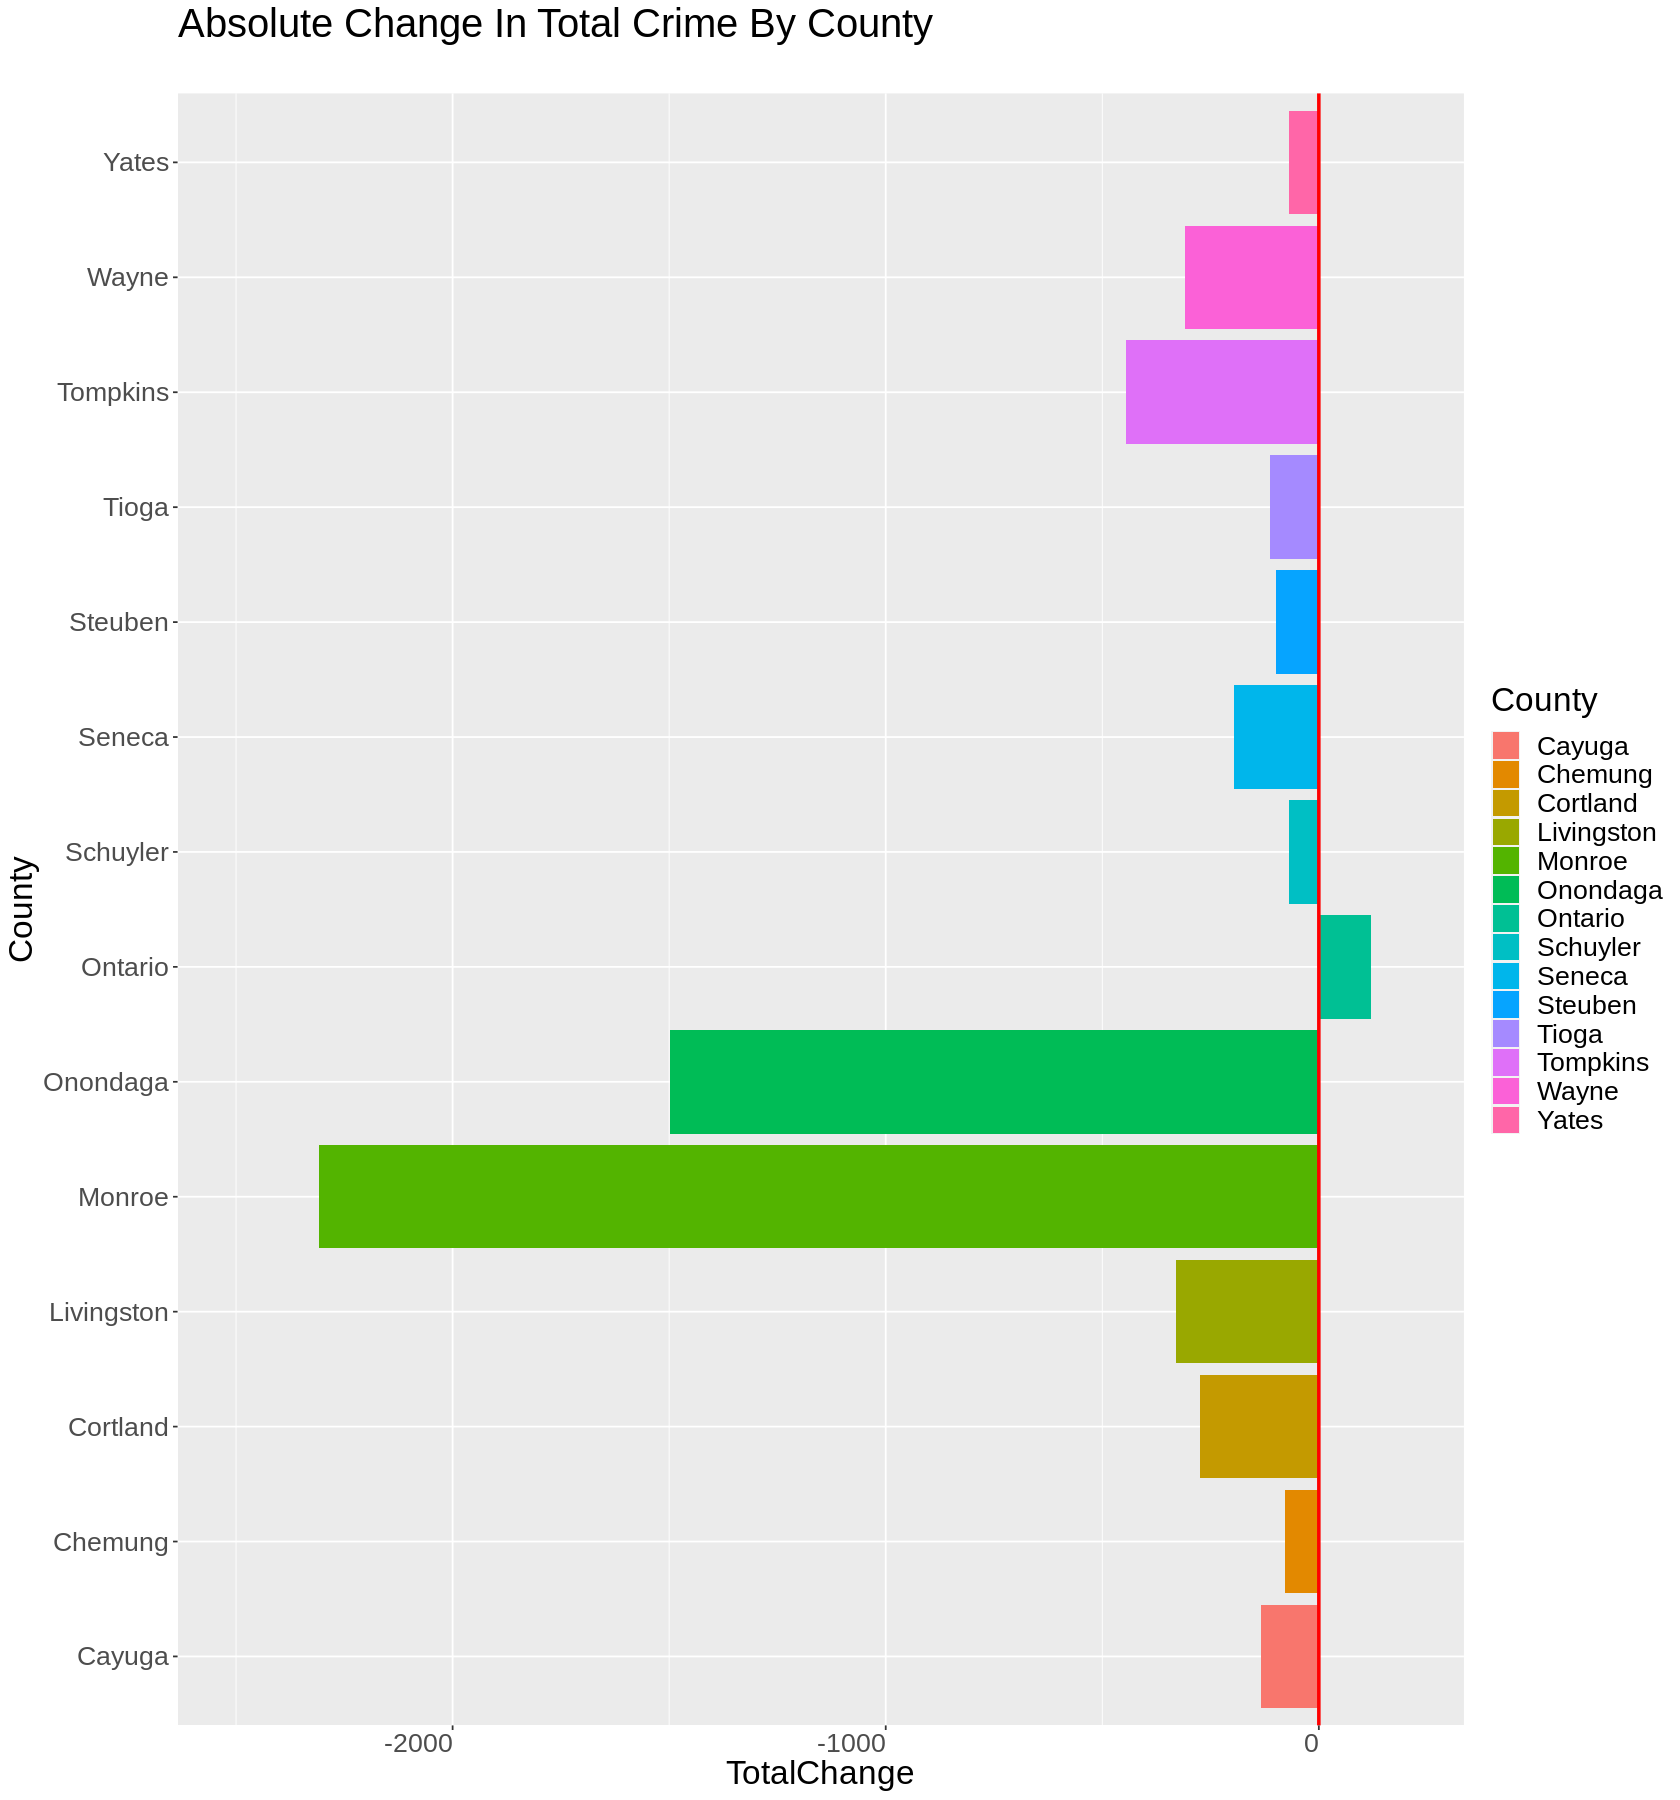

In [ ]:
ggplot(Total_Crime, aes(x= County , y = TotalChange , fill = County)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-2500,200)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "red", size=1)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Absolute Change In Total Crime By County",
                subtitle = "")+
                coord_flip()

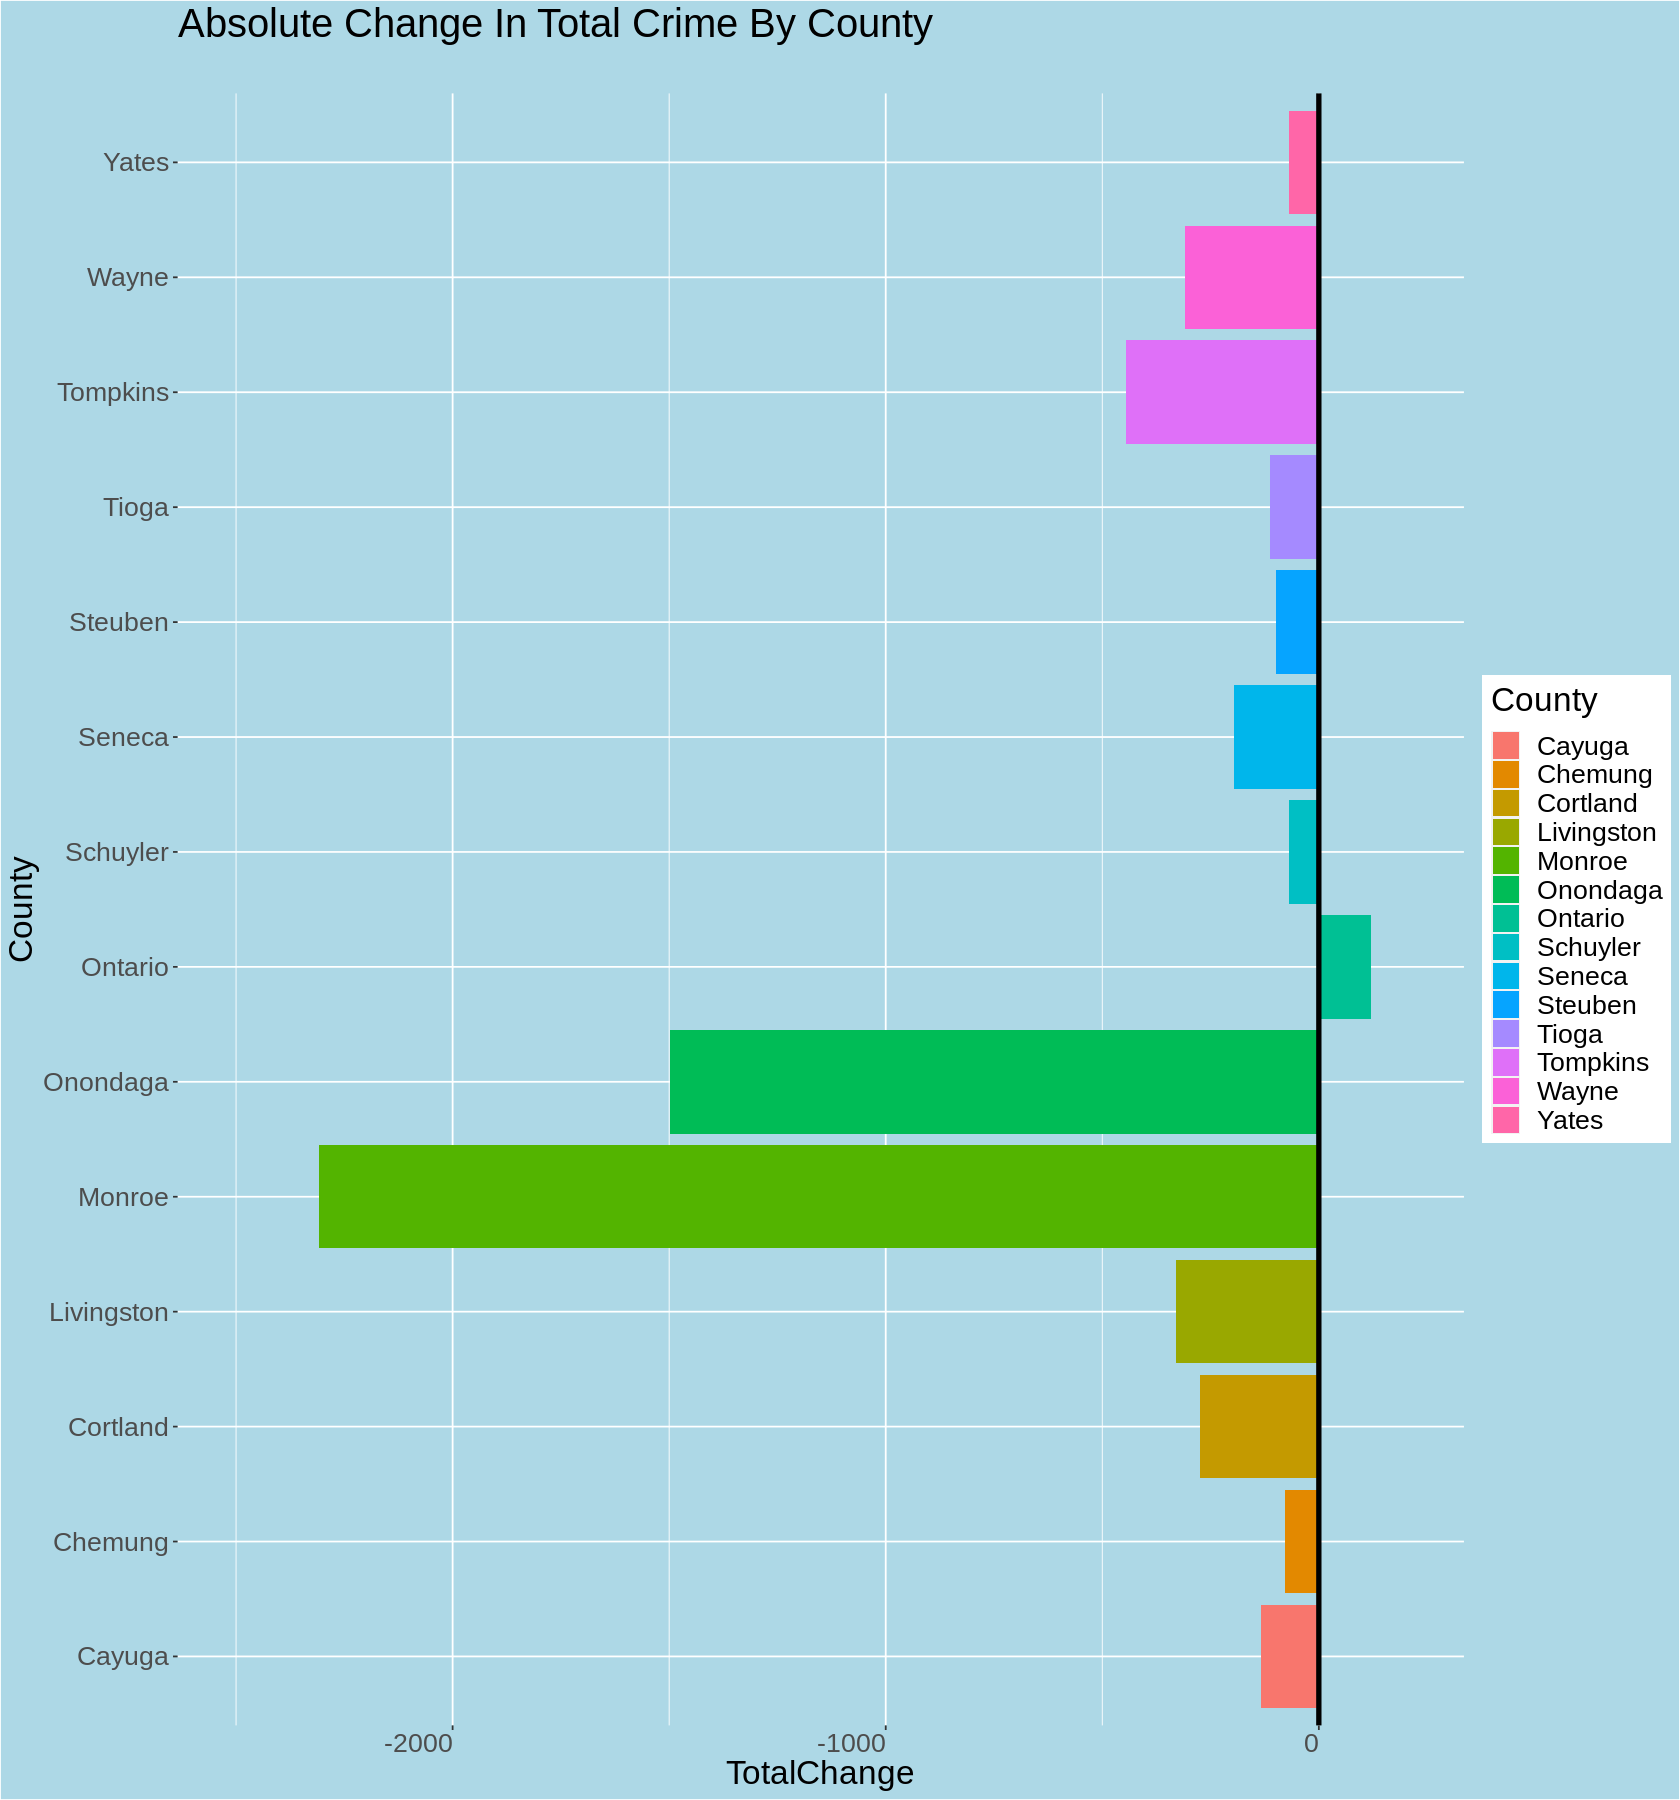

In [ ]:
ggplot(Total_Crime, aes(x= County , y = TotalChange , fill = County)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-2500,200)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Absolute Change In Total Crime By County",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                coord_flip()

But let us look at this in percentages

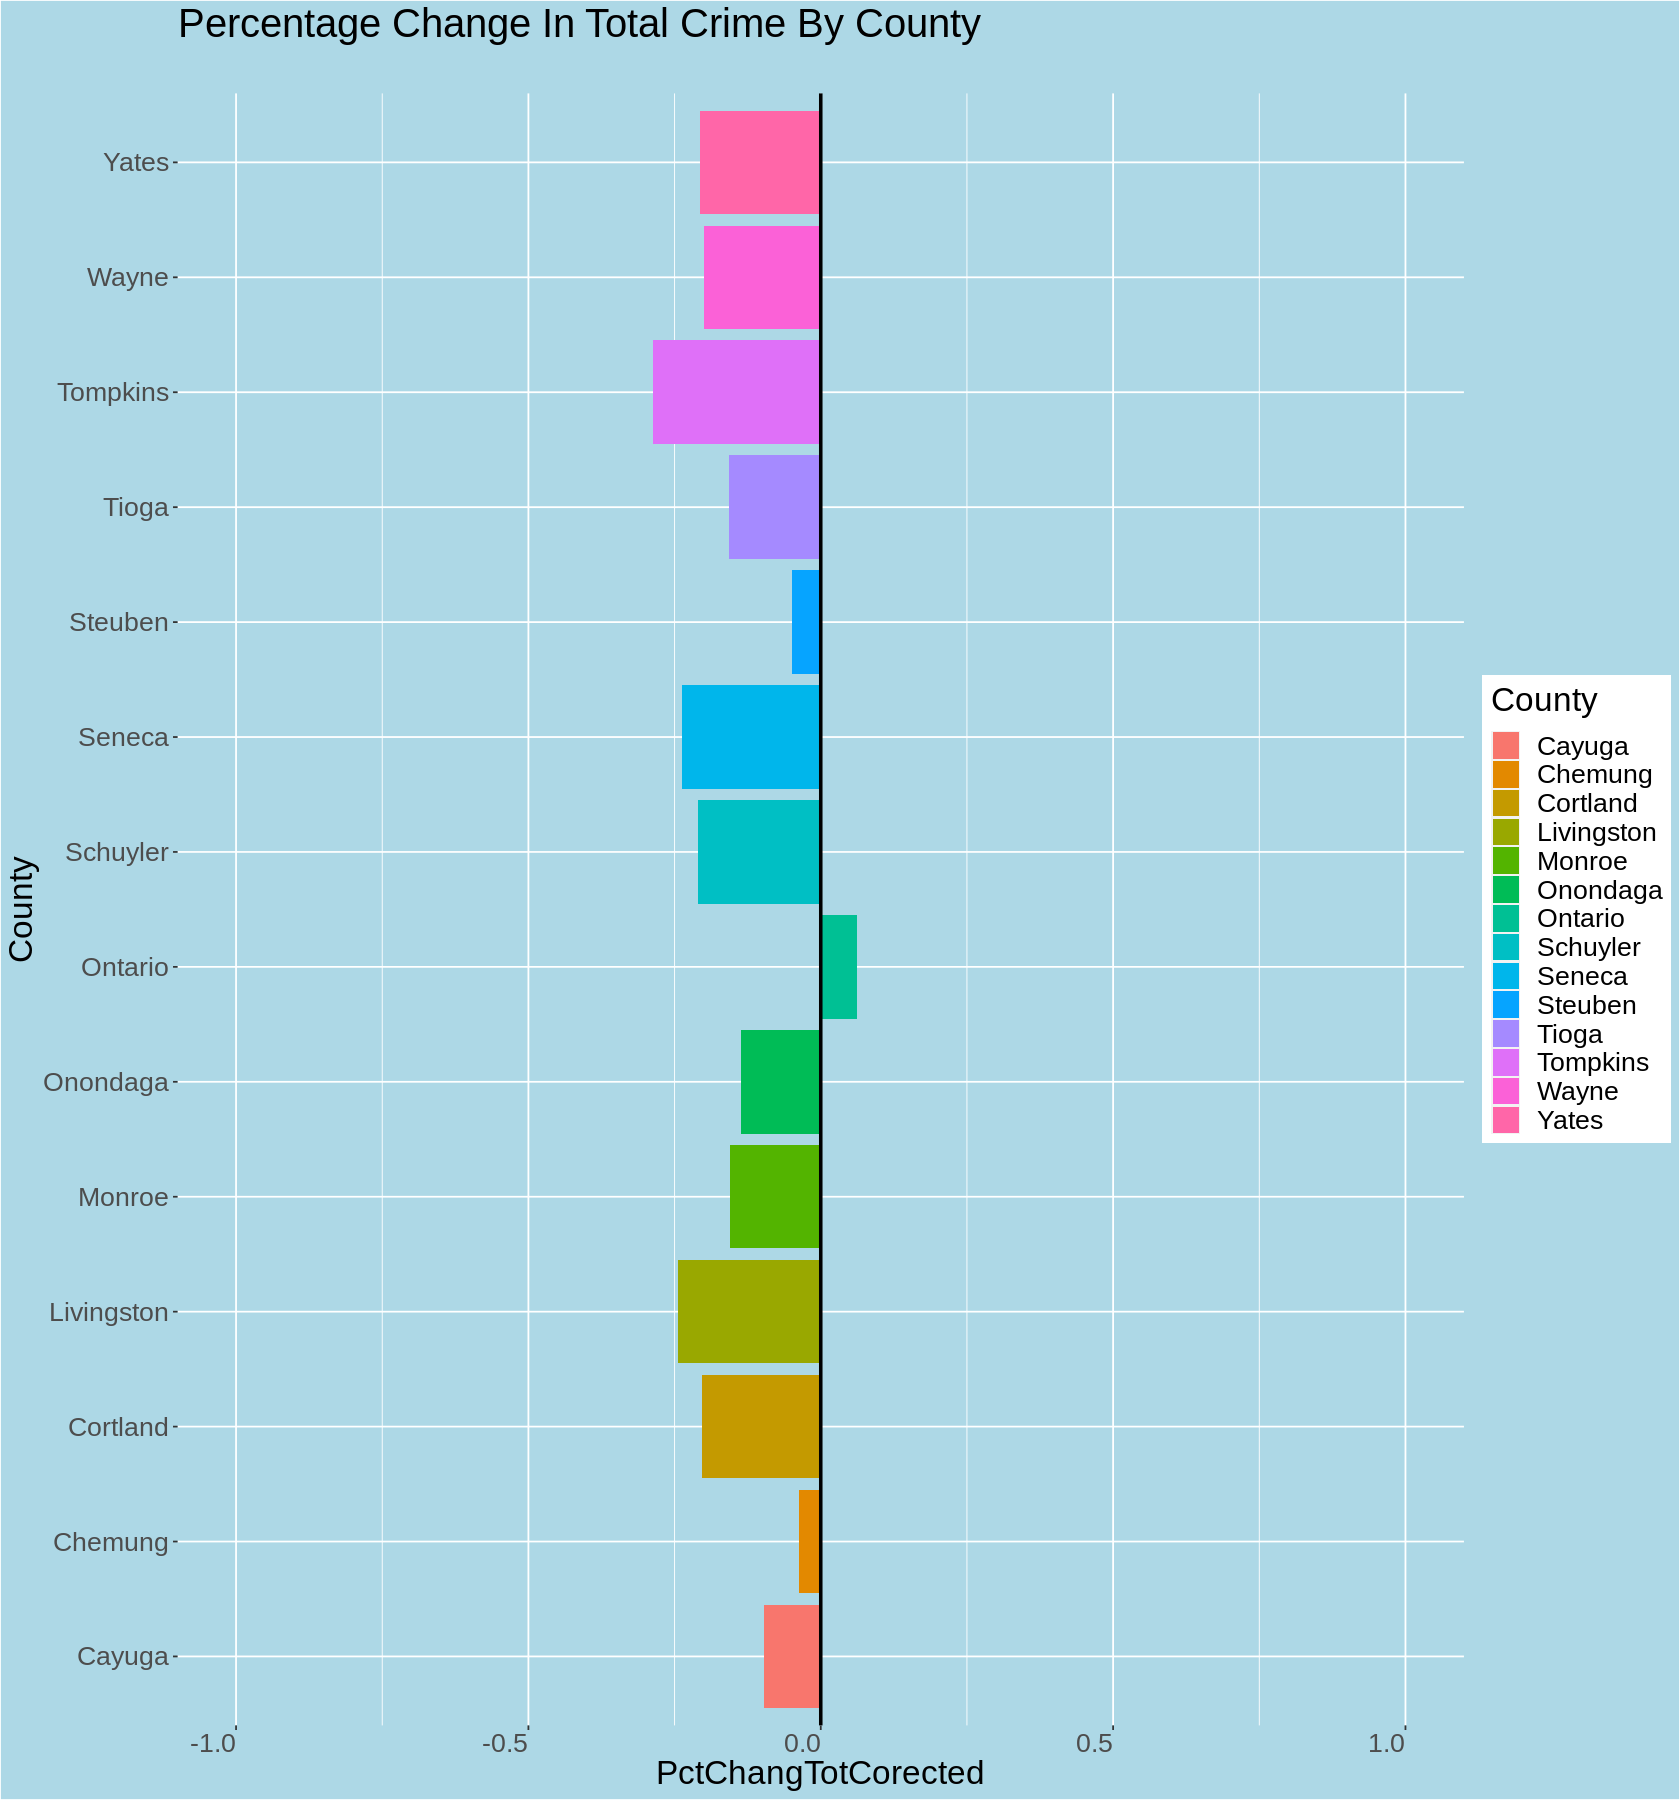

In [ ]:
ggplot(Total_Crime, aes(x= County , y = PctChangTotCorected , fill = County)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-1, 1)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Percentage Change In Total Crime By County",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                      coord_flip()

That was a comaprison of county to county for total arrests.  Next let us look check to see if each county had similar trends in crime.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


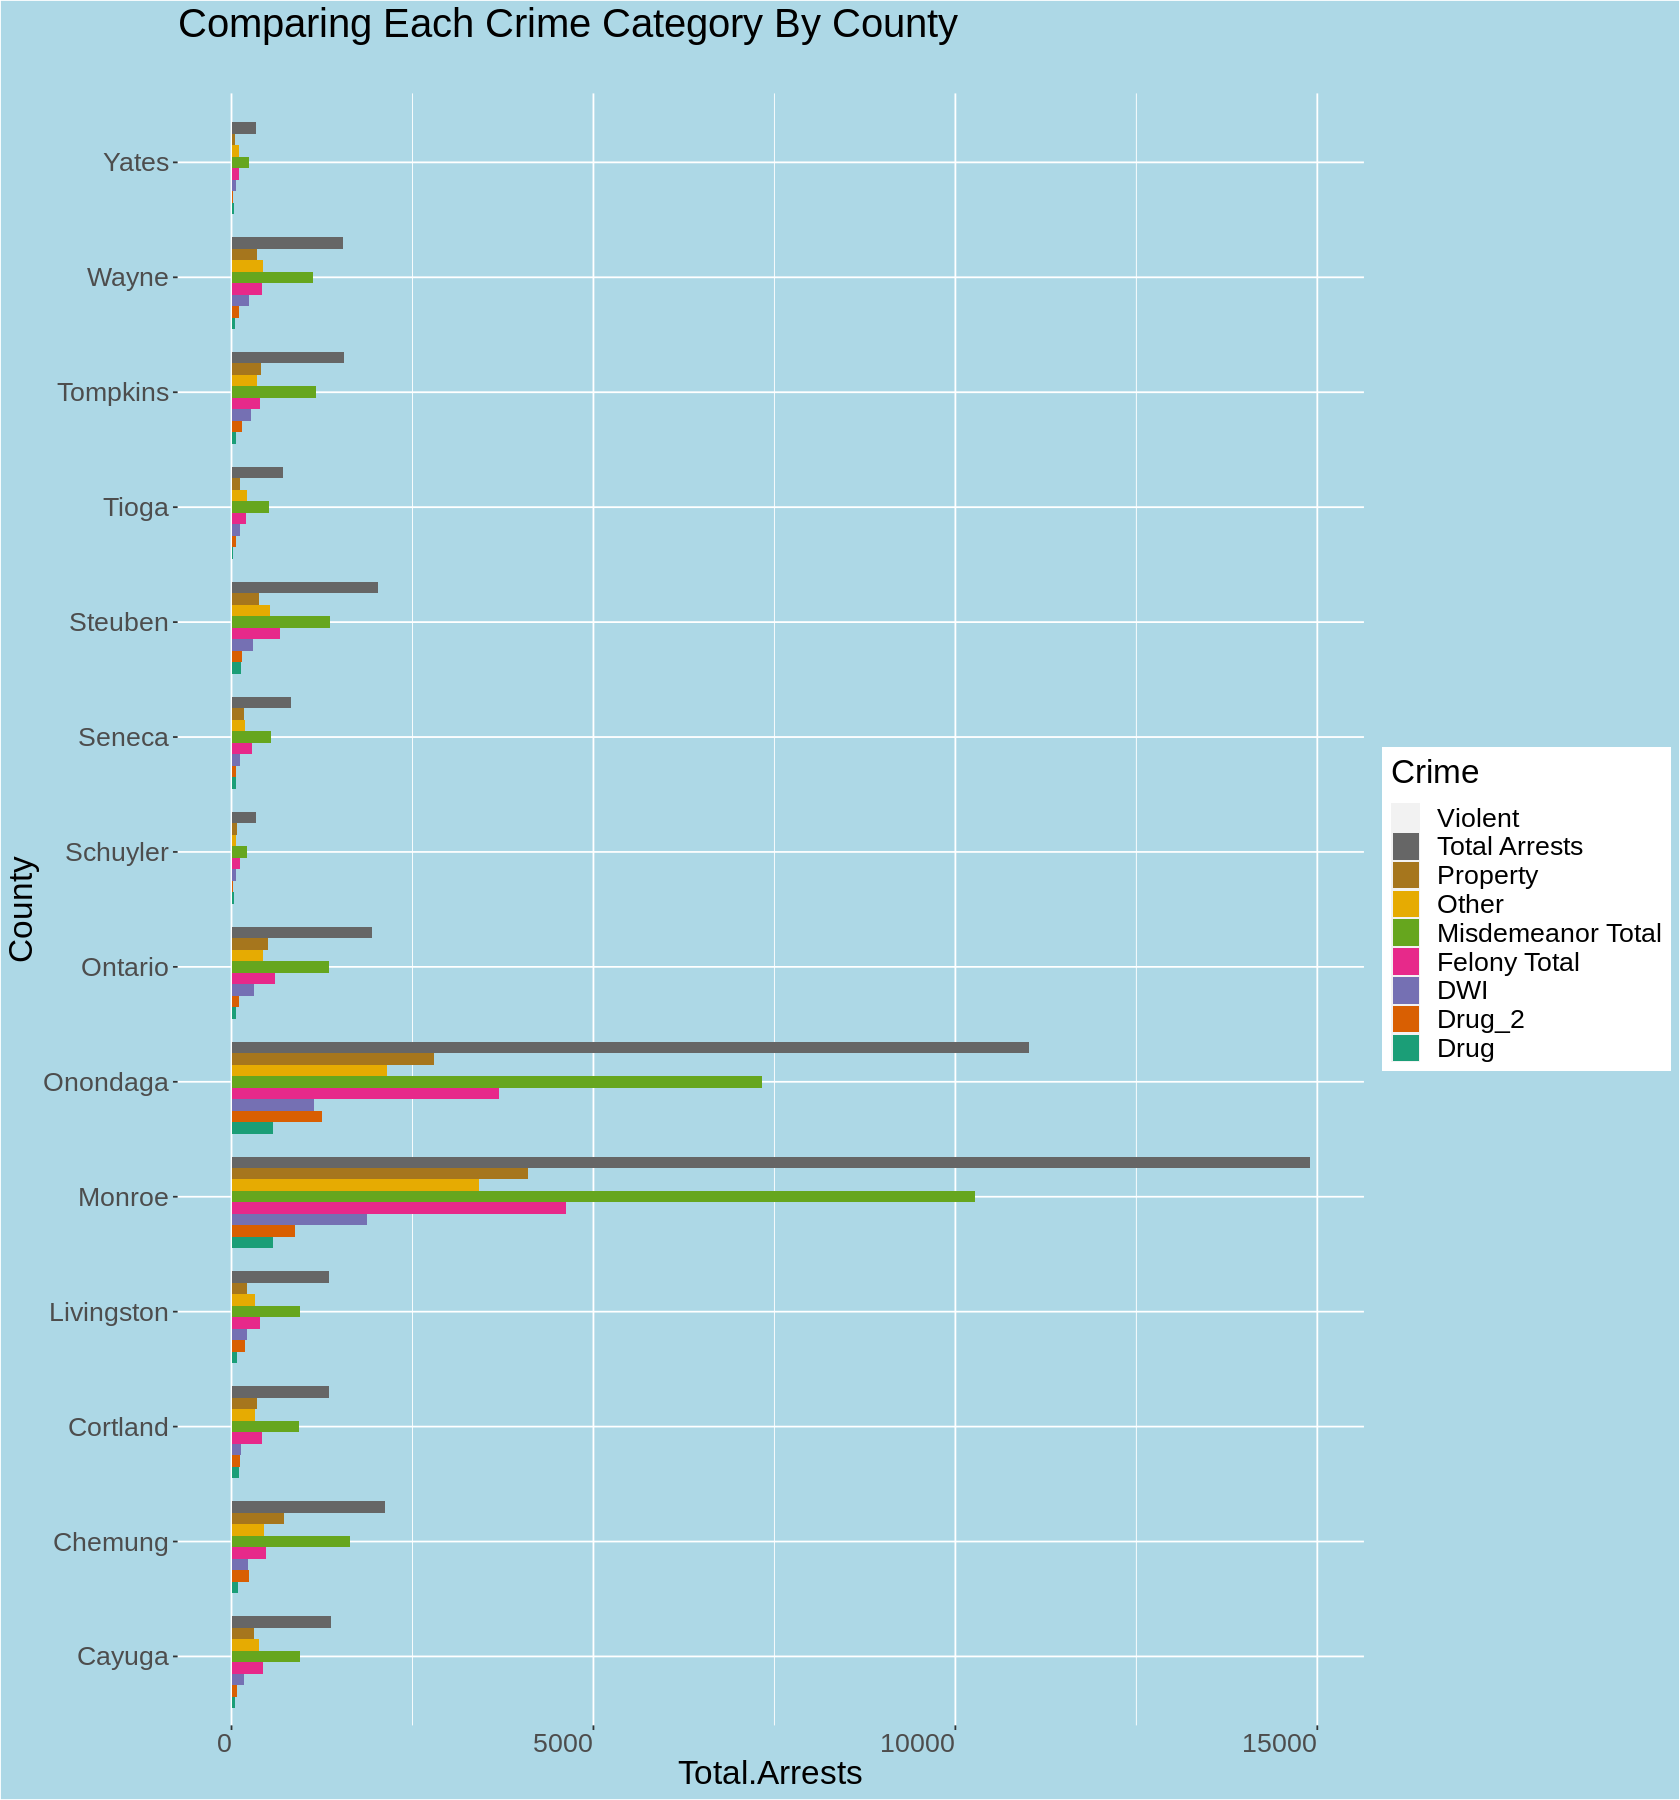

In [ ]:
ggplot(gender_pct, aes(County, Total.Arrests   , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=TRUE))+
                      coord_flip()

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


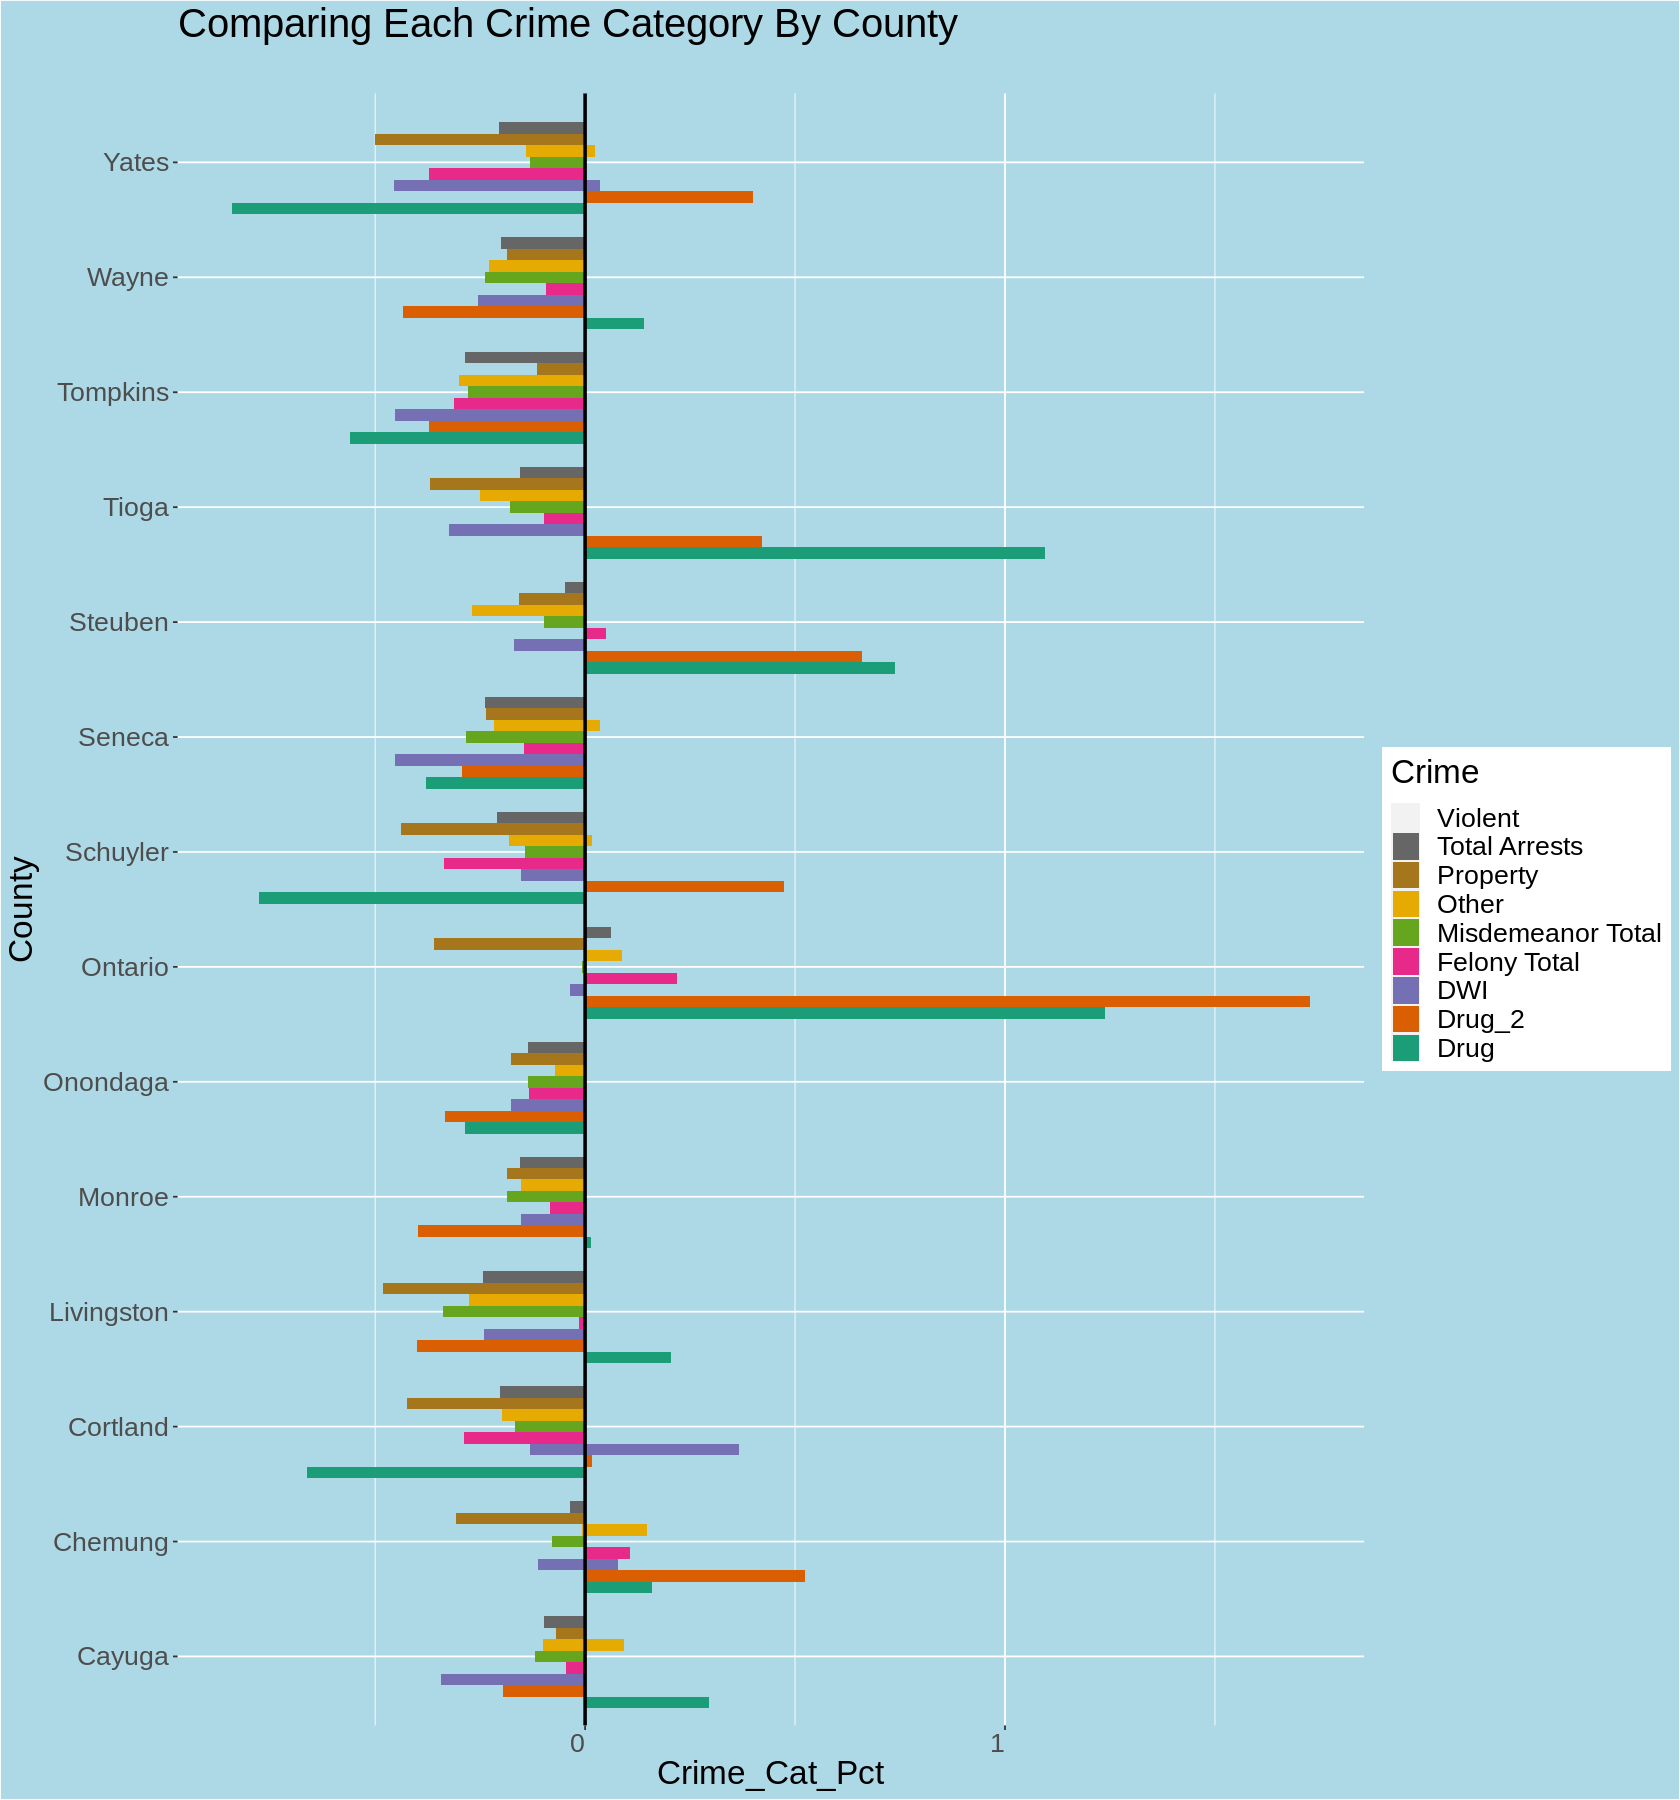

In [ ]:
ggplot(gender_pct, aes(County, Crime_Cat_Pct  , fill = Crime)) +
                              geom_bar(stat = "identity",width = 0.9, position = "dodge")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1)+
                guides(fill = guide_legend(reverse=TRUE))+
                coord_flip()
                      

Most crime is down in most counties  but there is no ignoring .Itlooks like each county has its own crime trends. 

Better to convert this to percentages

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


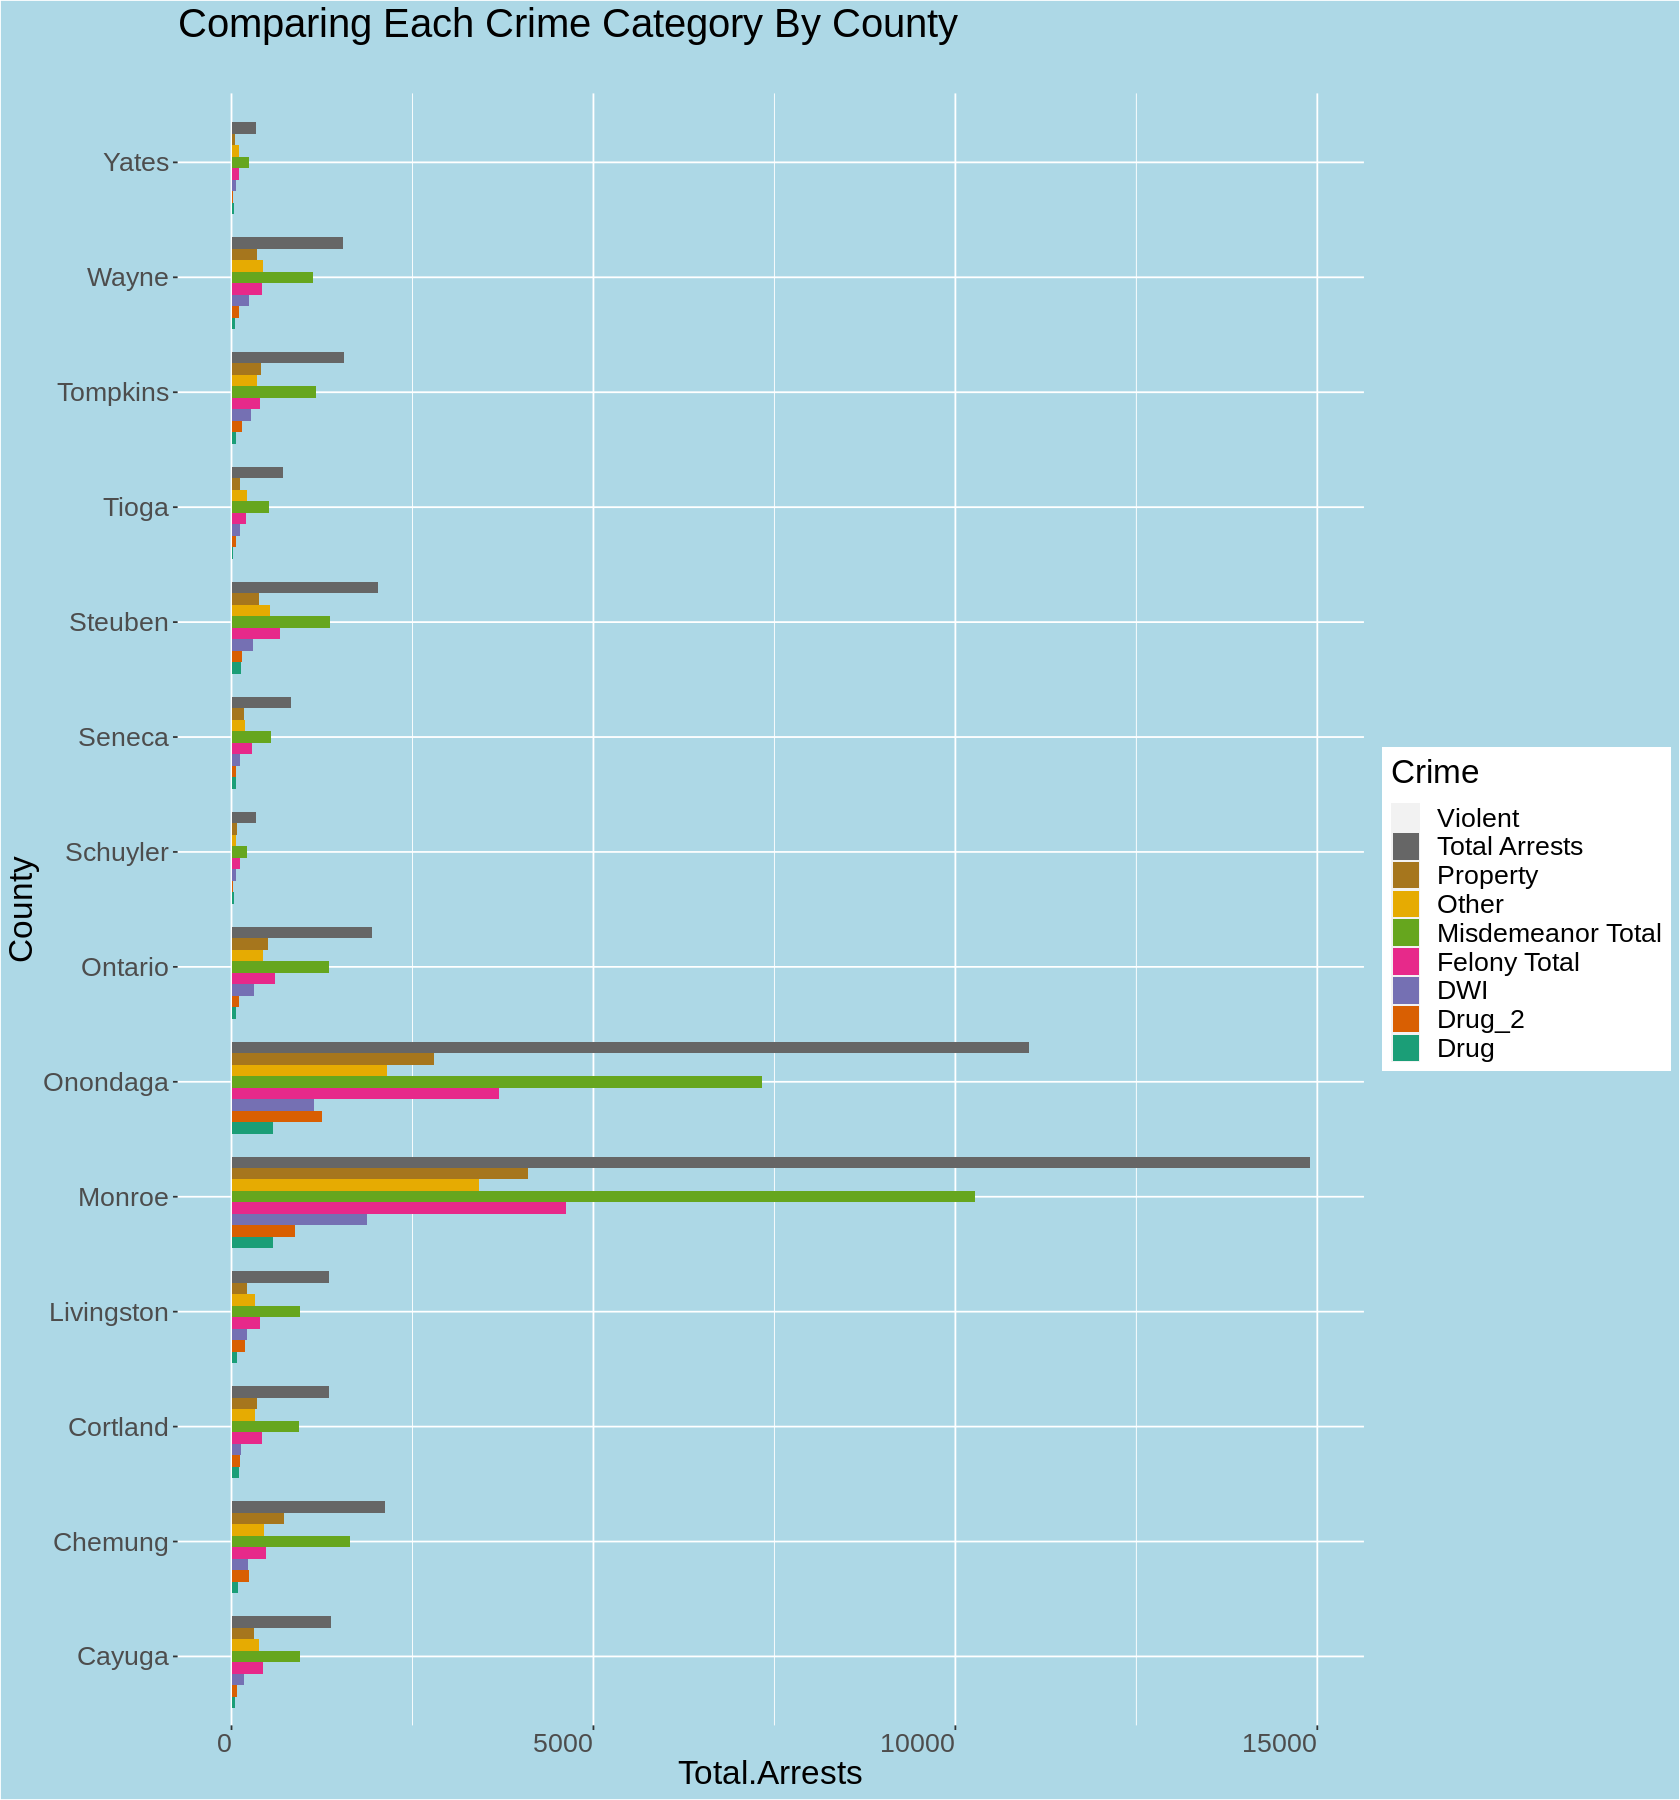

In [ ]:
ggplot(gender_pct, aes(County, Total.Arrests , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=TRUE))+
                      coord_flip()

Make a facet plot , facet on crime.  Facet Grid or Facet wrap?

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


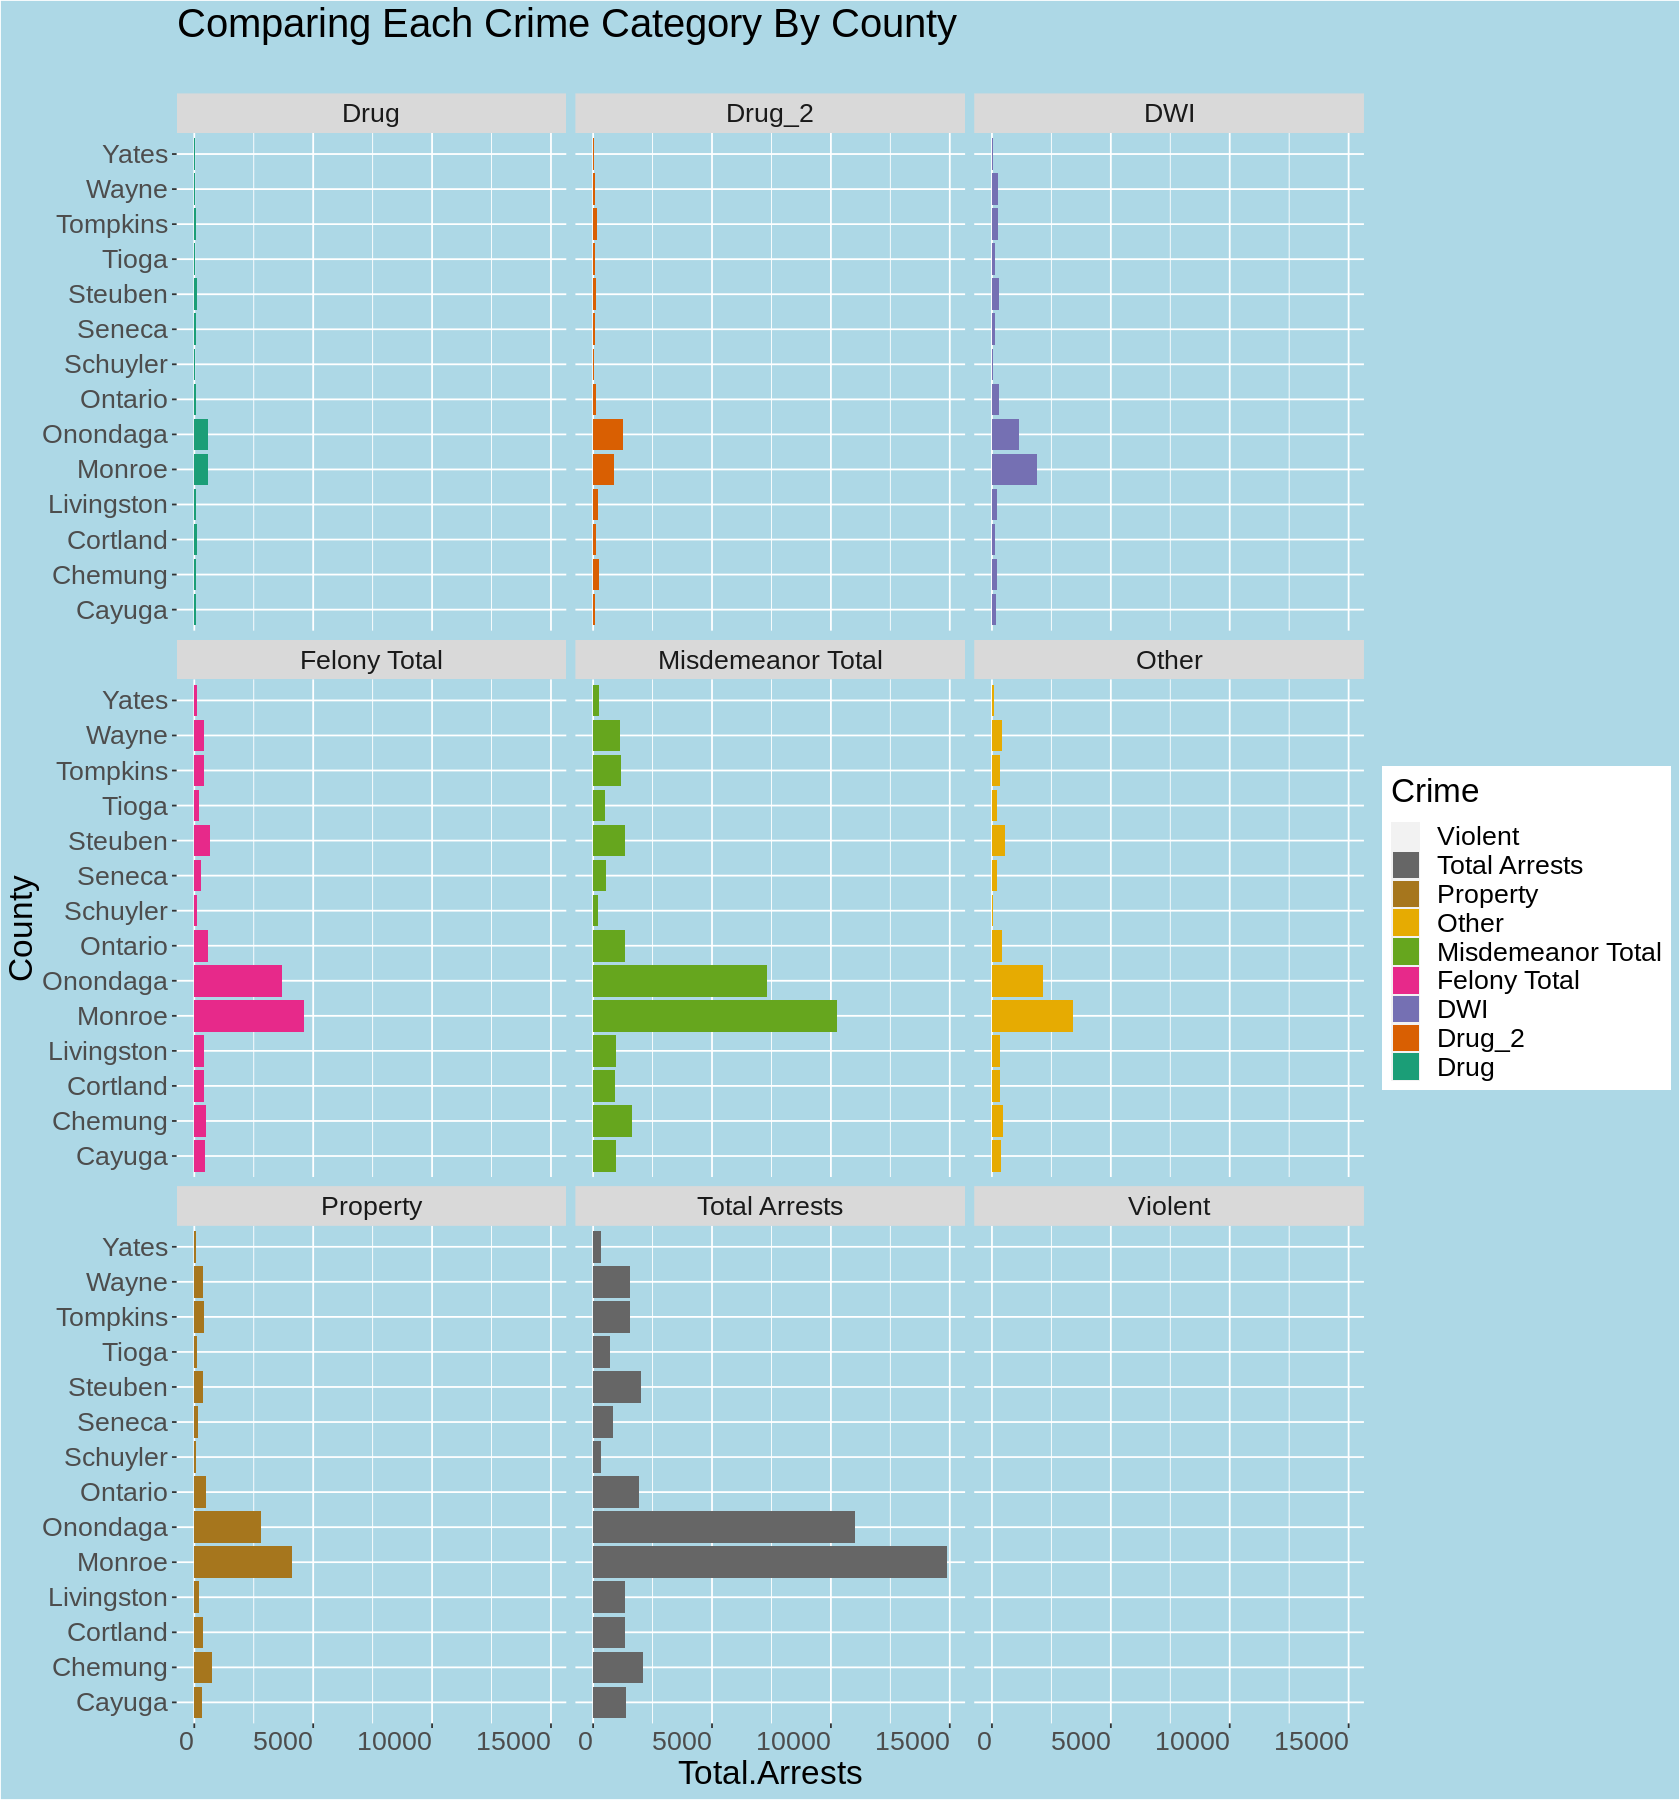

In [ ]:
ggplot(gender_pct, aes(County, Total.Arrests , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=TRUE))+
                      coord_flip()+
                      facet_wrap(~Crime)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


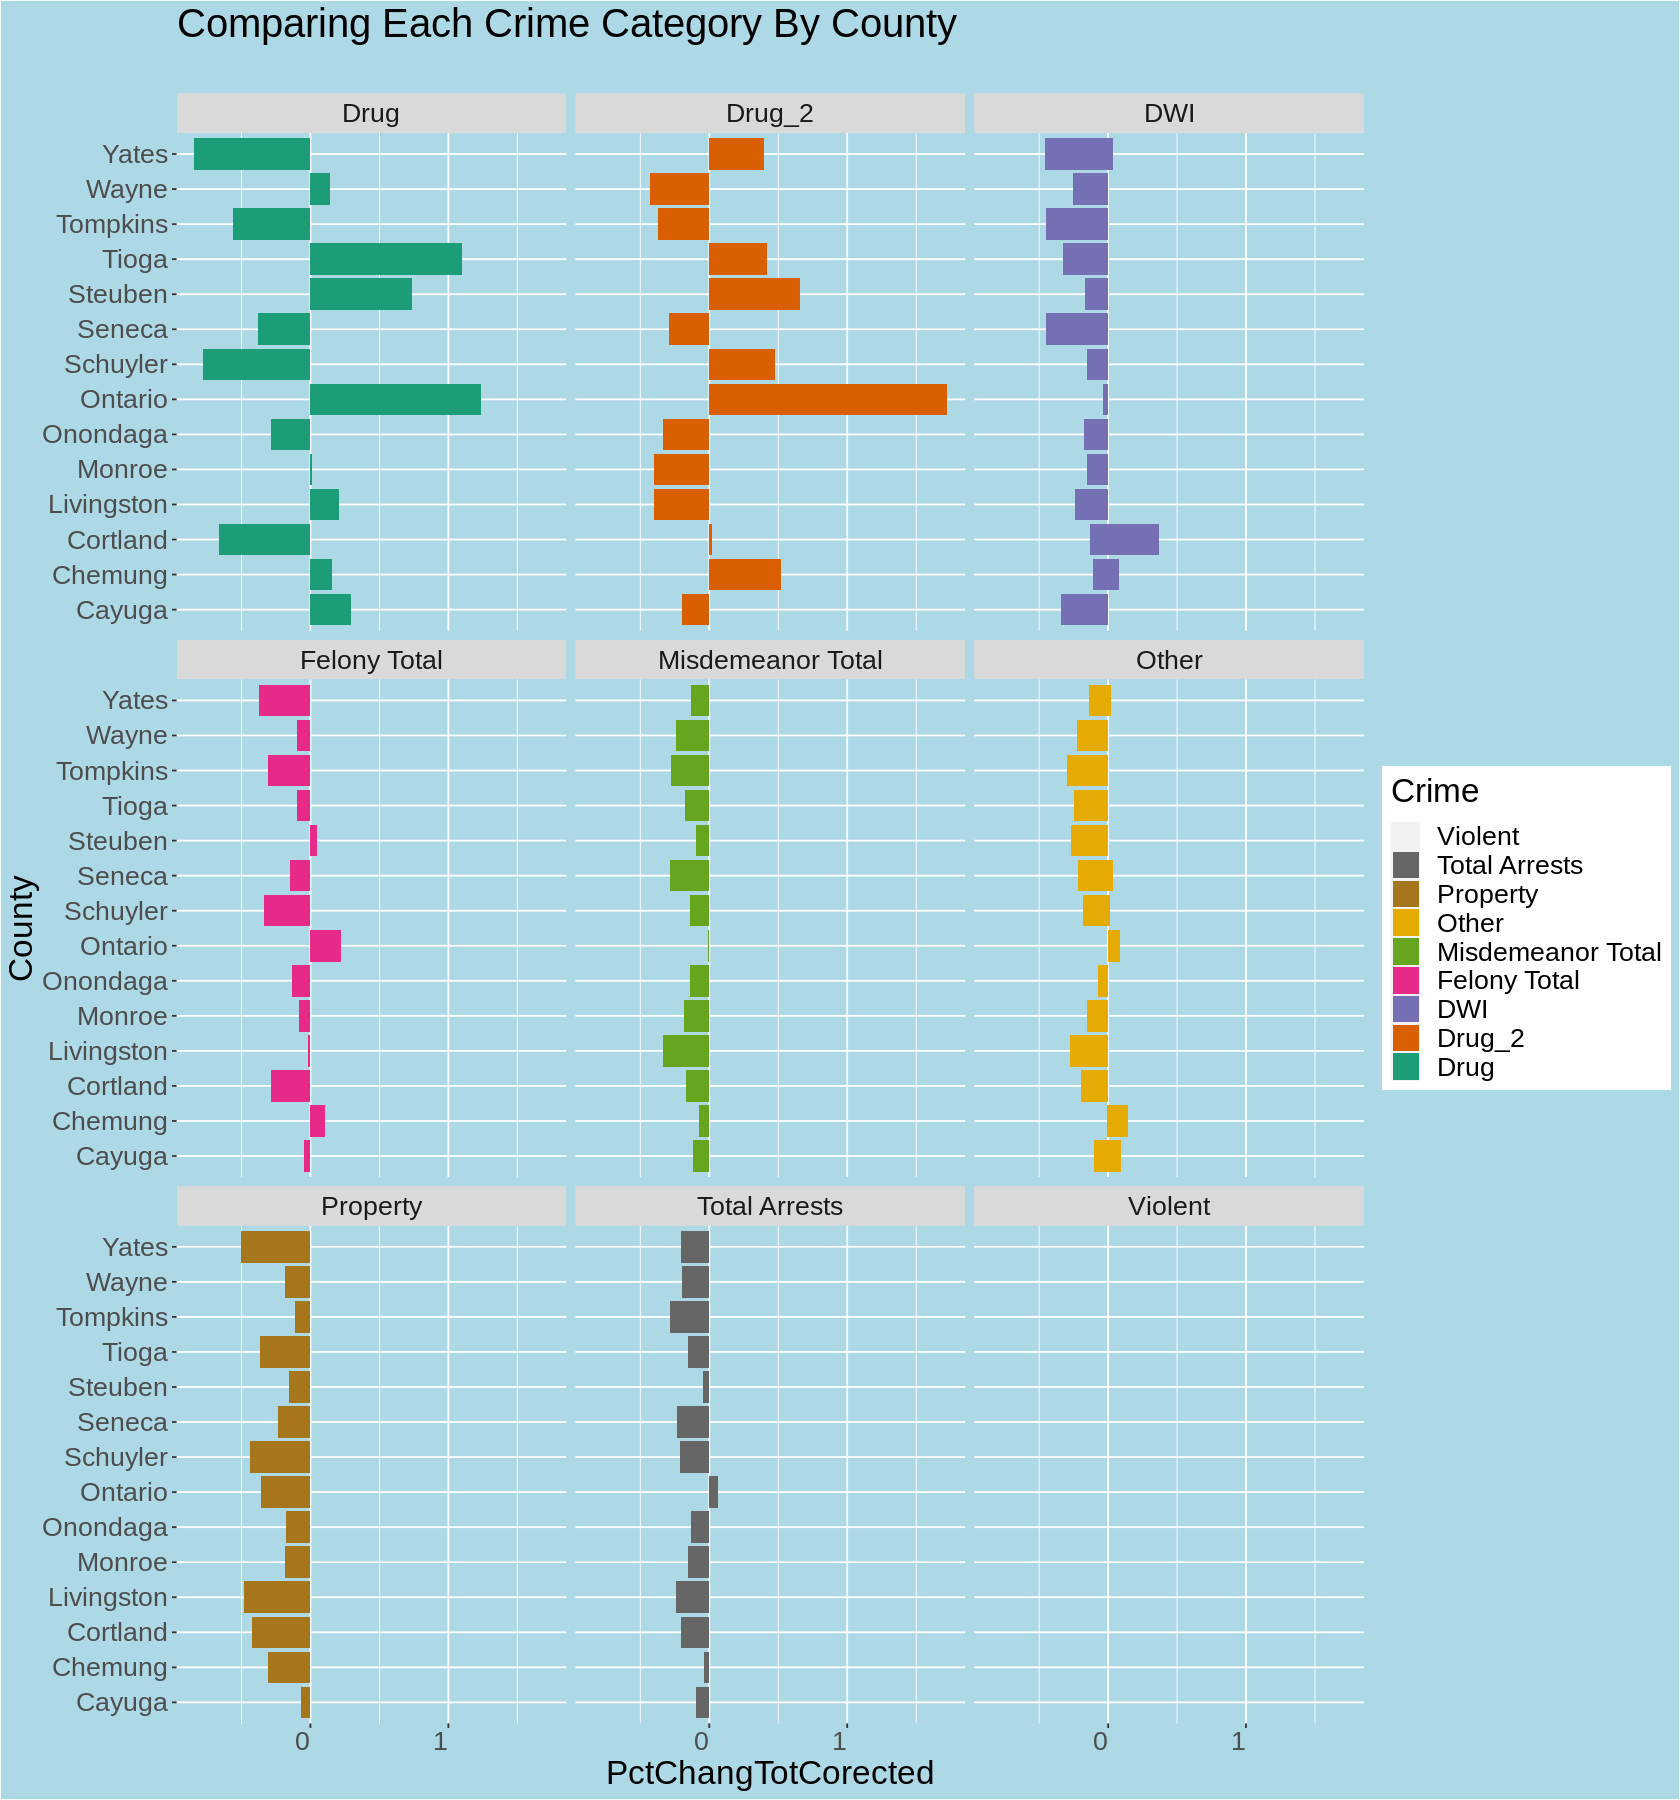

In [ ]:
ggplot(gender_pct, aes(County, PctChangTotCorected , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=TRUE))+
                      coord_flip()+
                      facet_wrap(~Crime)

# Gender Pct change

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



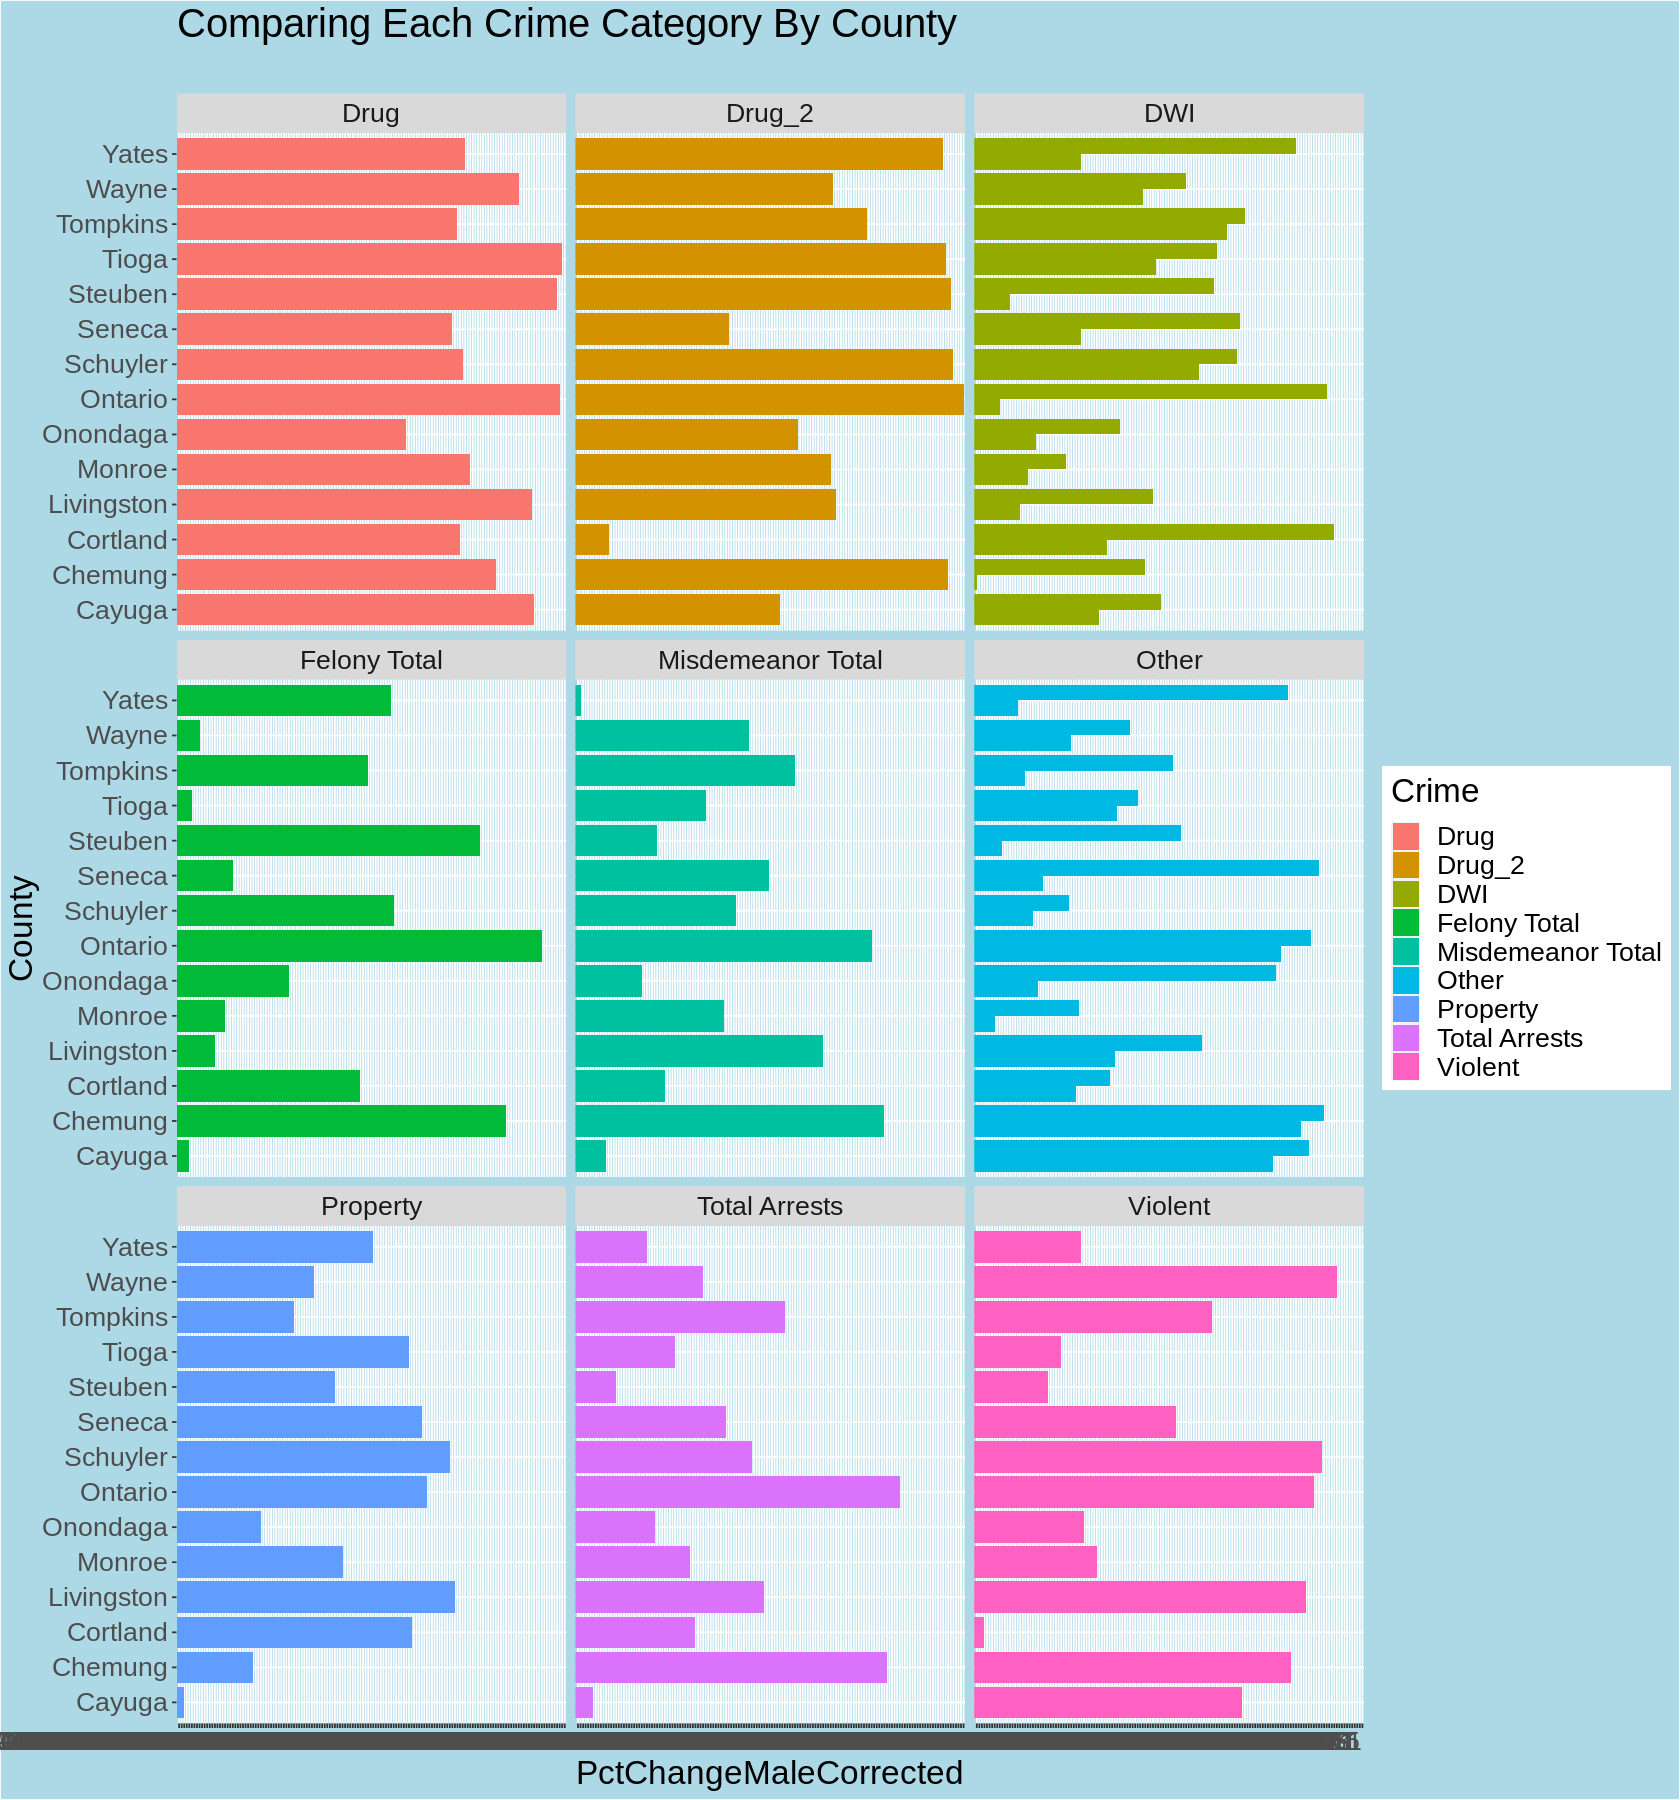

In [ ]:
ggplot(gender_pct, aes(County, PctChangeMaleCorrected  , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=FALSE))+
                      coord_flip()+
                      facet_wrap(~Crime )

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



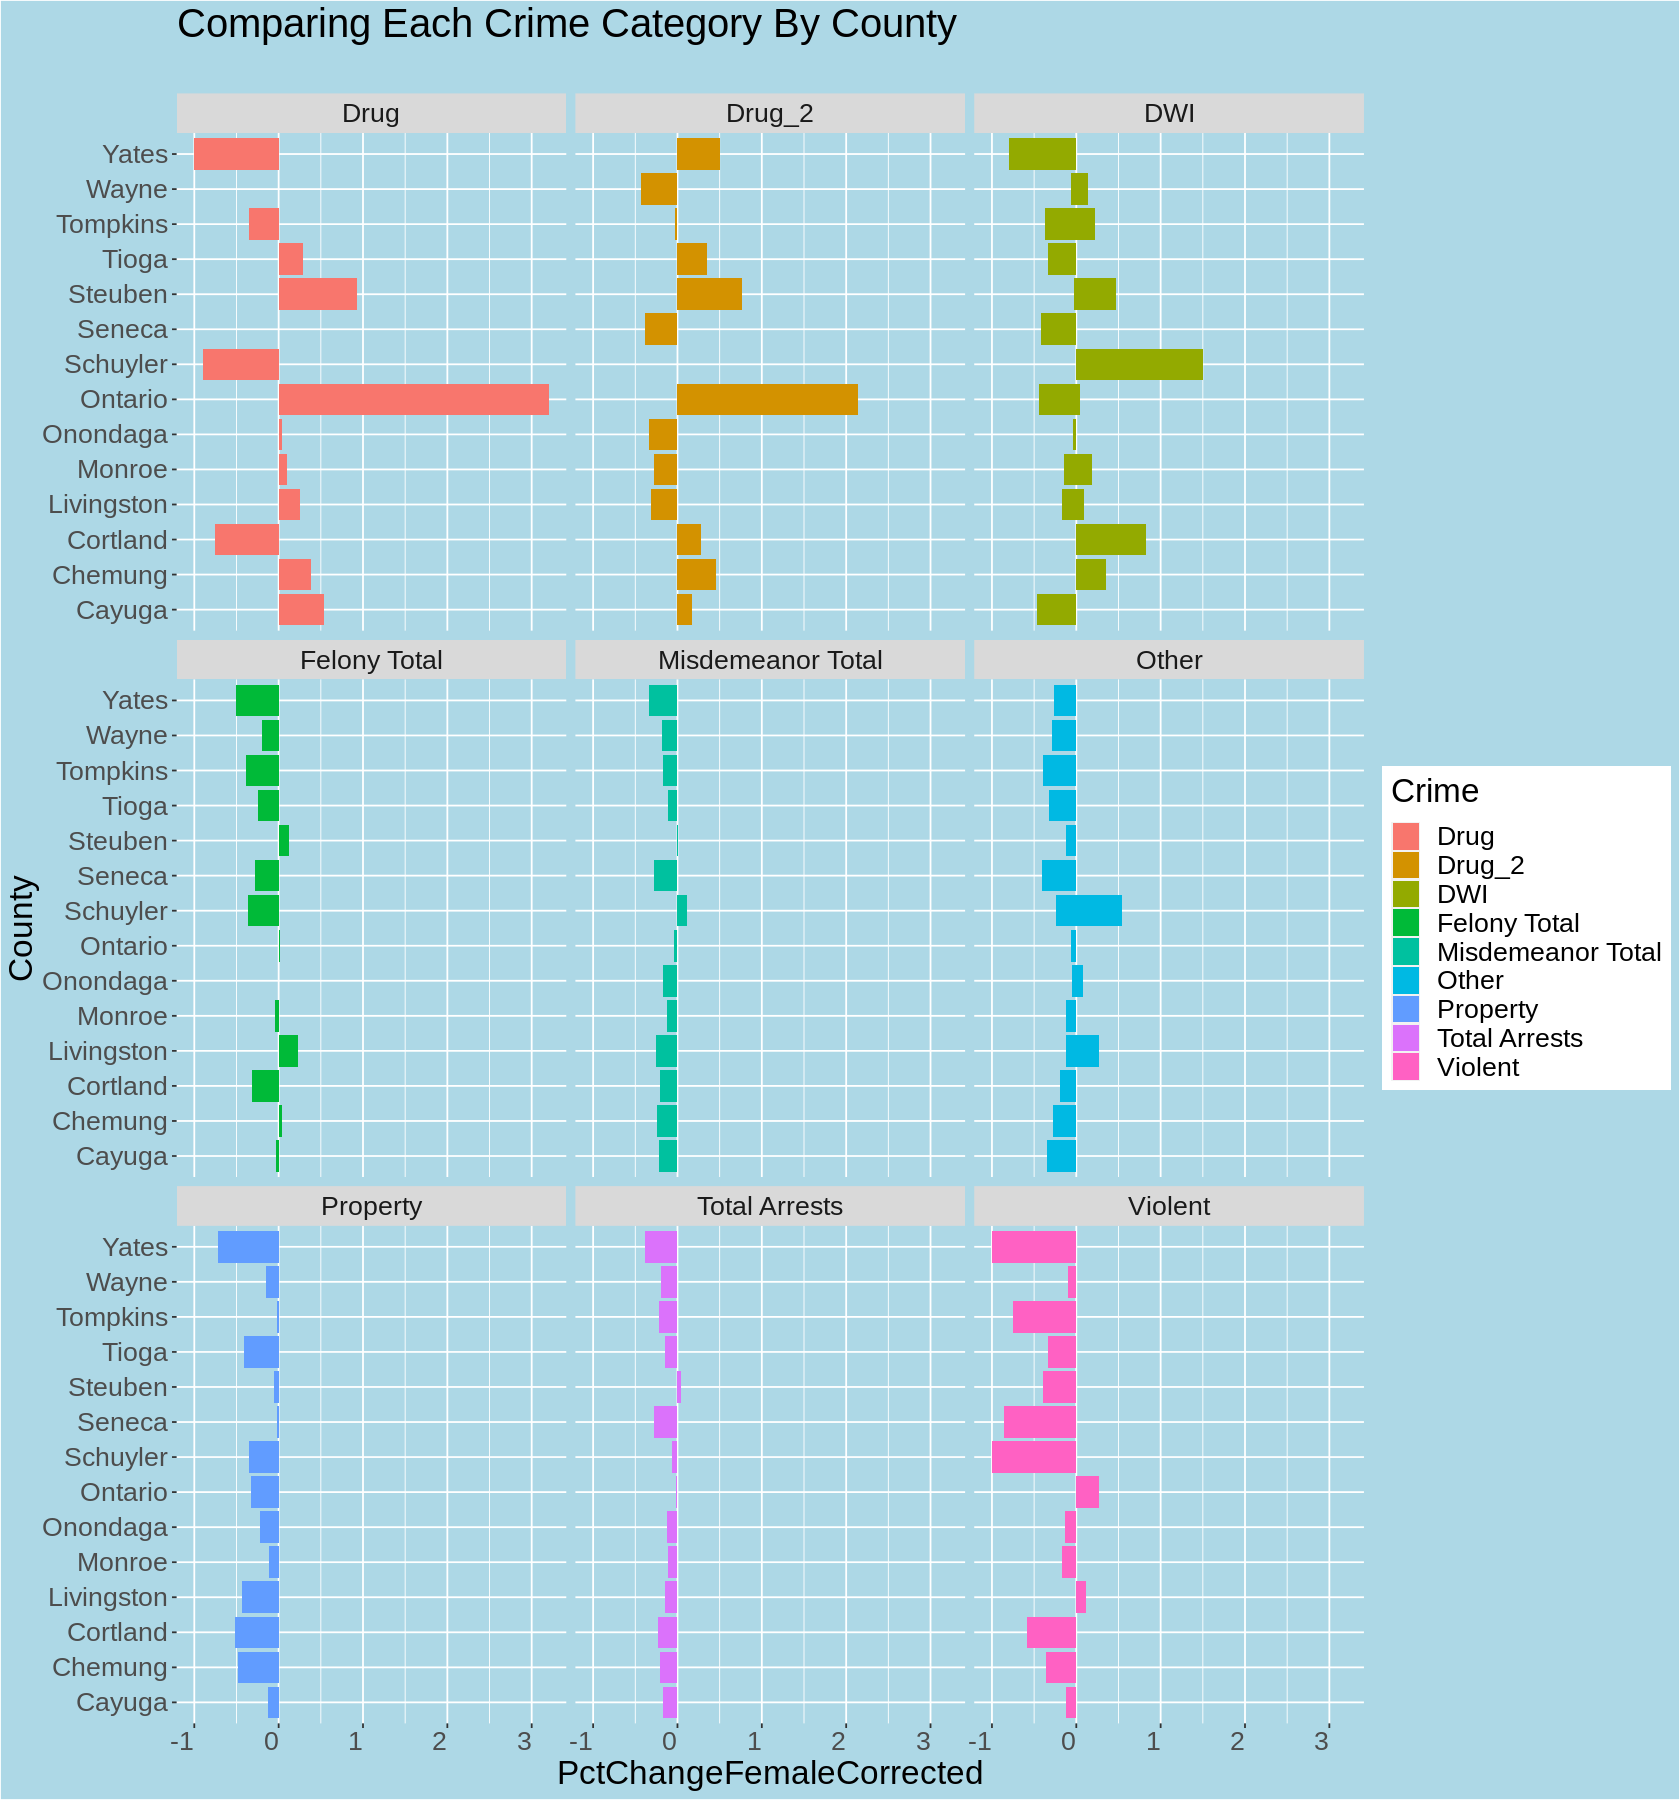

In [ ]:
ggplot(gender_pct, aes(County, PctChangeFemaleCorrected  , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=FALSE))+
                      coord_flip()+
                      facet_wrap(~Crime )

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



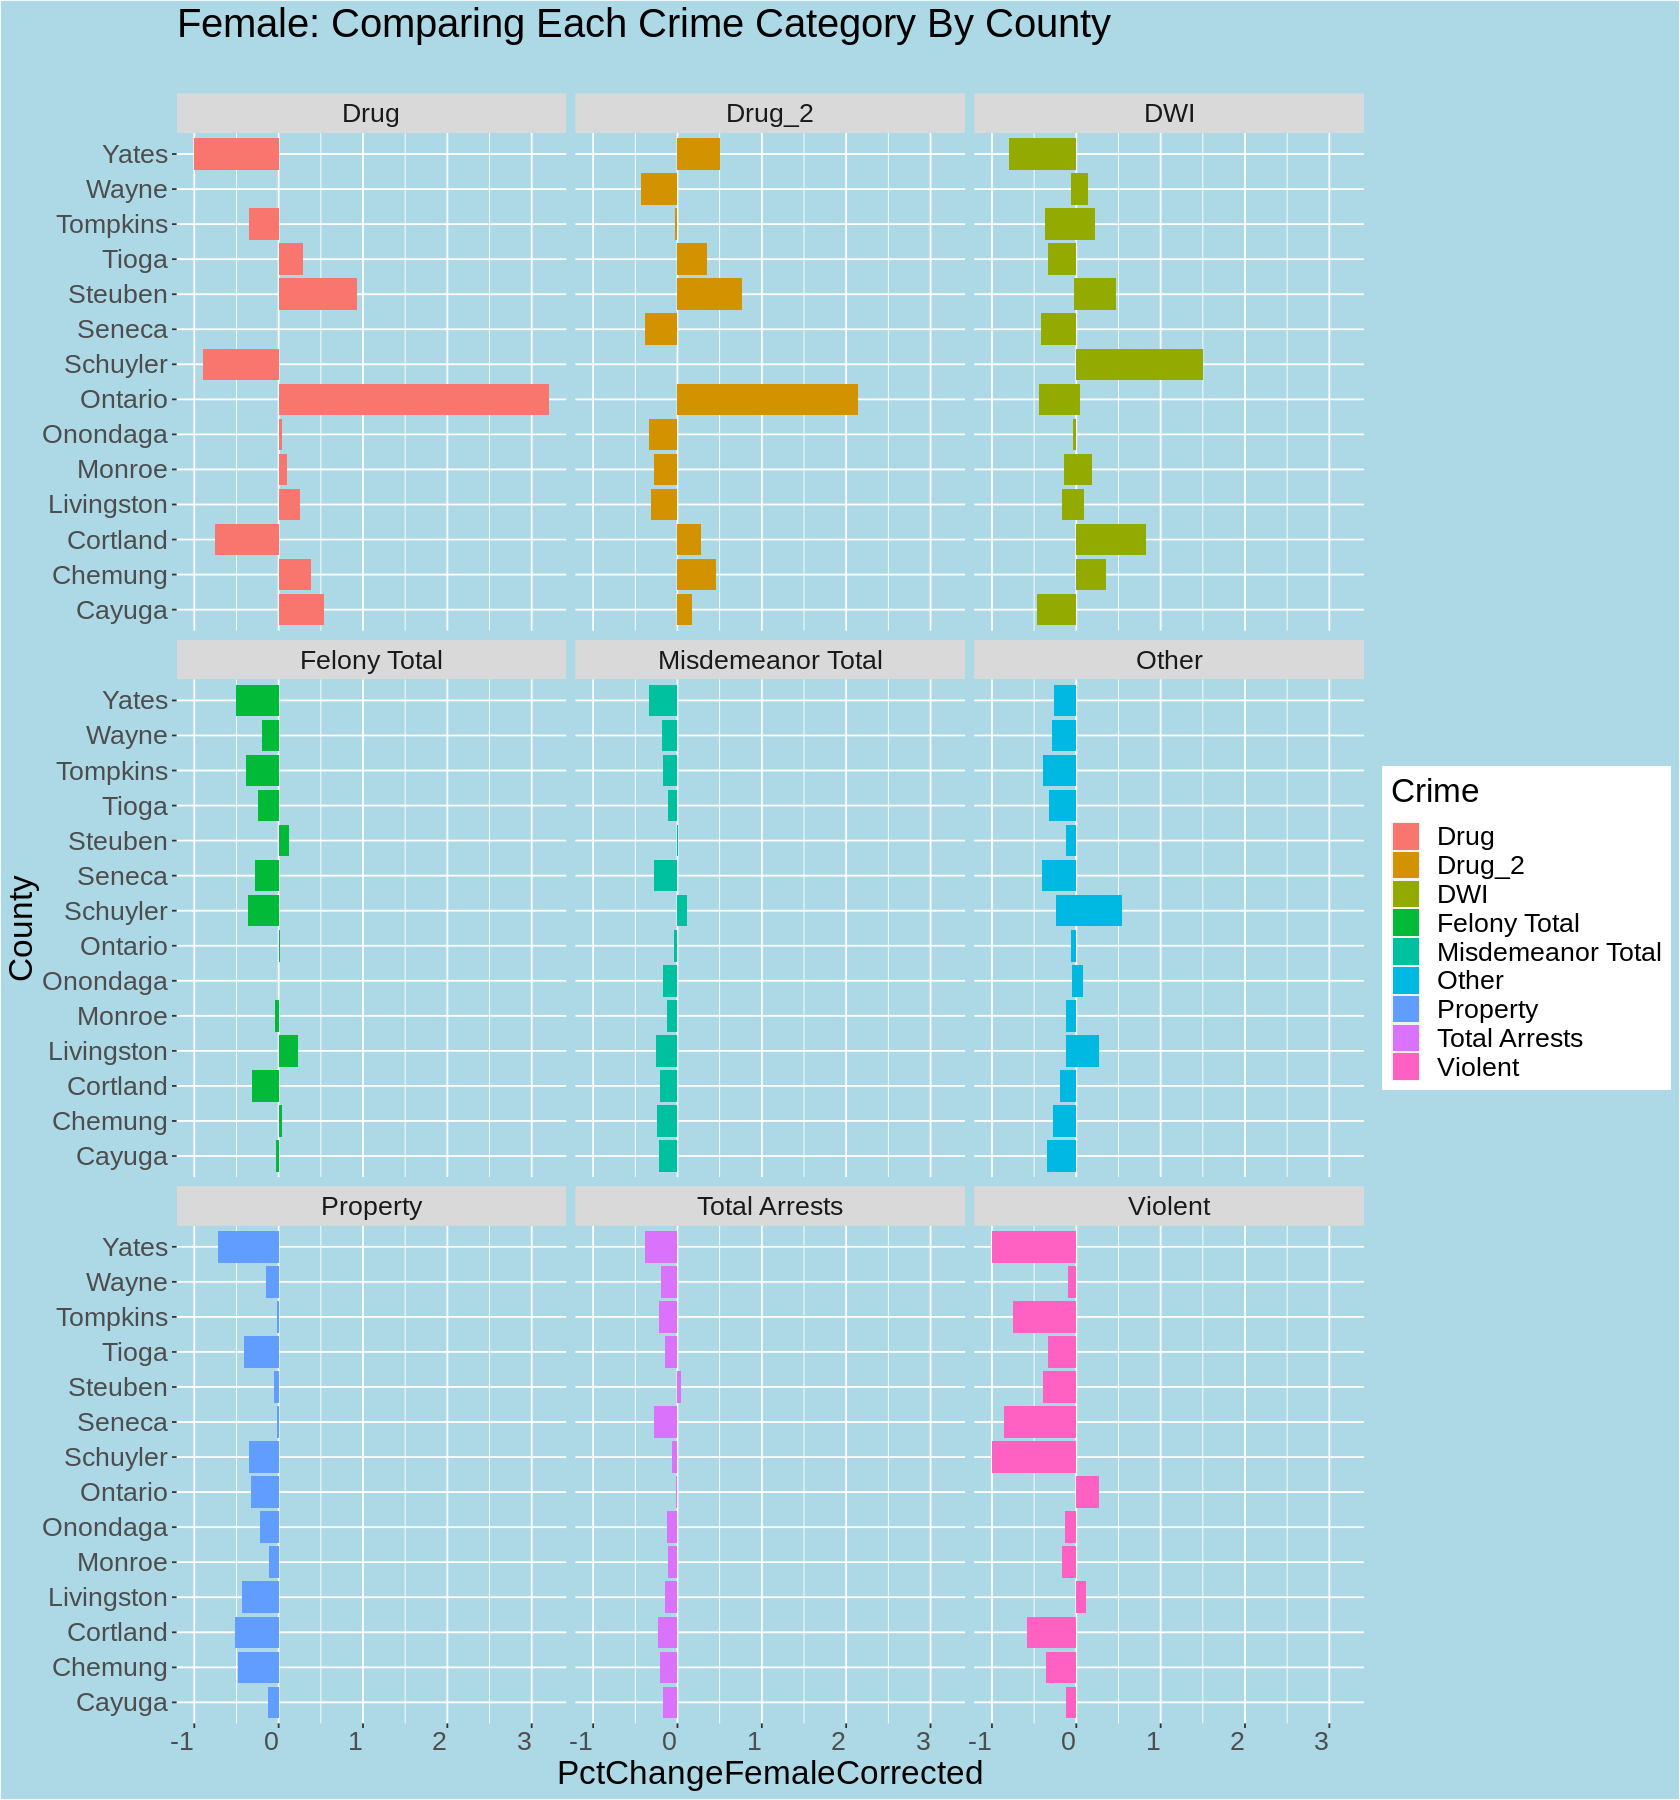

In [ ]:
#use default colors.  remove color brewere
ggplot(gender_pct, aes(County, PctChangeFemaleCorrected  , fill = Crime)) +
                              geom_bar(stat = "identity",position = "dodge")+
                              coord_flip()+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Female: Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=FALSE))+
                      coord_flip()+
                      facet_wrap(~Crime )


In [ ]:
str(gender_pct)

'data.frame':	154 obs. of  25 variables:
 $ Year                    : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ County                  : chr  "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ Crime                   : chr  "Total Arrests" "Felony Total" "Drug" "Violent" ...
 $ Total.Arrests           : int  1374 431 51 104 38 238 943 77 173 316 ...
 $ Male                    : int  969 326 36 88 25 177 643 59 125 201 ...
 $ Female                  : int  405 105 15 16 13 61 300 18 48 115 ...
 $ Not.Reported            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Year_19                 : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ County_19               : chr  "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ Crime_19                : chr  "Total Arrests" "Felony Total" "Drug" "Violent" ...
 $ Total.Arrests_19        : int  1241 411 66 60 25 260 830 62 135 294 ...
 $ Crime_Cat_Pct           : num  -0.0968 -0.0464 0.2941 -0.4231 -0.3421 ...
 $ Male_19                 : in

#CGR RACE

In [ ]:
CGR_race <- read.csv("/content/CGR_race_ethnicity_worksheet - ValuesOnly.csv")
head(CGR_race,3)
tail(CGR_race,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,0,0.000000000,1,0.019607843


,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
305,Yates,2019,DWI,58,52,0.8965517,2,0.03448276,3,0.05172414,0,0,1,0.01724138
306,Yates,2019,Property,26,23,0.8846154,3,0.11538462,0,0.00000000,0,0,0,0.00000000
307,Yates,2019,Other,92,86,0.9347826,3,0.03260870,3,0.03260870,0,0,0,0.00000000


Do total arrests by a race and then for each crime

In [ ]:
Total_Race <-colSums(CGR_race[ , c(5,7,9,11,13)])

In [ ]:
#df <- data.frame(colname = names(demo),colSums_demo=colSums(demo))
df <- data.frame(colSums(CGR_race[ , c(5,7,9,11,13)]))
df

,colSums.CGR_race...c.5..7..9..11..13...
,<dbl>
White,130744
Black,78014
Hispanic,18007
Asian,1734
Other.Unknown,2232


In [ ]:
Totals_race <- read.csv("/content/CGR_race_ethnicity_worksheet - RaceTotals.csv")
Totals_race

Race,Total
<chr>,<int>
White,130744
Black,78014
Hispanic,18007
Asian,1734
Other,2232


Don't know how to automatically pick scale for object of type function. Defaulting to continuous.

ERROR while rich displaying an object: Error: Aesthetics must be valid data columns. Problematic aesthetic(s): x = year. 
Did you mistype the name of a data column or forget to add after_stat()?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr

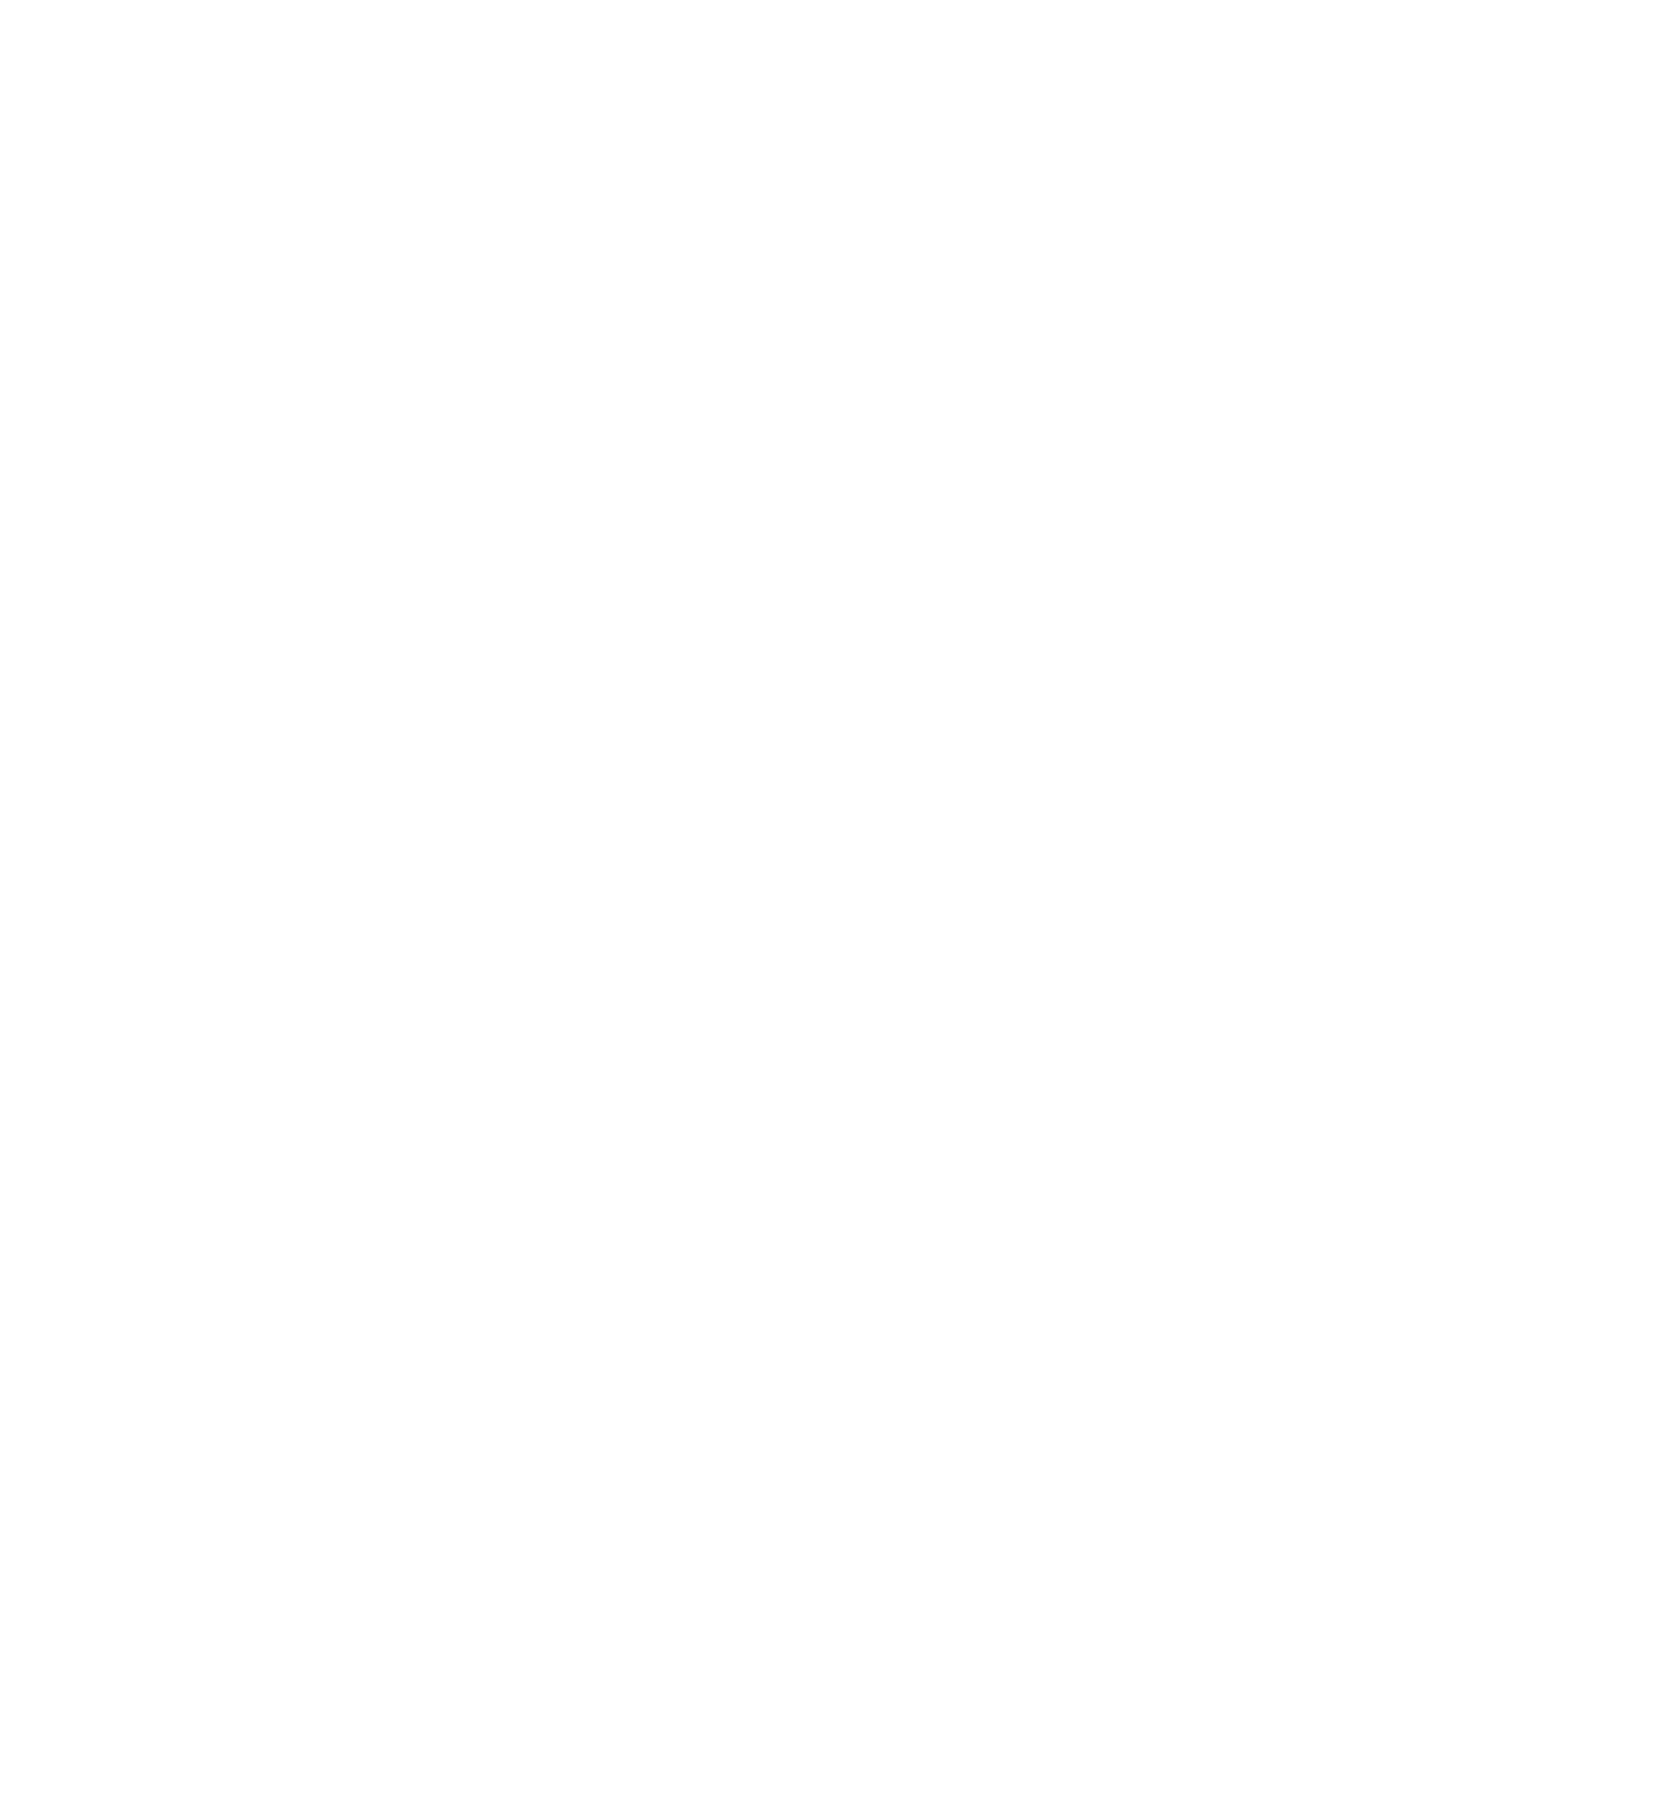

In [44]:
ggplot(Totals_race, aes(x= year , y = Total , fill = Race)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,150000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Totals By Race",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                      guides(colour = guide_legend(reverse=T))+
                      guides(colour = guide_legend(reverse=TRUE))

Year by year for race bar chart


In [13]:
Race_values <- read.csv("/content/CGR_race_ethnicity_worksheet - ValuesOnly (1).csv")

In [14]:
str(Race_values)

'data.frame':	307 obs. of  14 variables:
 $ county       : chr  "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ year         : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ crime        : chr  "Total Arrests" "Felony Total" "Drug" "Violent" ...
 $ Total.Arrests: int  1374 431 51 104 38 238 943 77 173 316 ...
 $ White        : int  1071 325 33 79 33 180 746 55 155 244 ...
 $ WhitePct     : num  0.779 0.754 0.647 0.76 0.868 ...
 $ Black        : int  240 92 16 24 4 48 148 15 8 59 ...
 $ BlackPct     : num  0.175 0.213 0.314 0.231 0.105 ...
 $ Hispanic     : int  42 12 1 1 0 10 30 1 9 9 ...
 $ HispanicPct  : num  0.03057 0.02784 0.01961 0.00962 0 ...
 $ Asian        : int  2 0 0 0 0 0 2 1 0 0 ...
 $ AsianPct     : num  0.00146 0 0 0 0 ...
 $ Other.Unknown: int  19 2 1 0 1 0 17 5 1 4 ...
 $ OtherPct     : num  0.01383 0.00464 0.01961 0 0.02632 ...


In [30]:
Race_long <- pivot_longer(Race_values , cols = 4:14, names_to = "Race", values_to = "Number")

In [31]:
head(Race_long,10)

county,year,crime,Race,Number
<chr>,<int>,<chr>,<chr>,<dbl>
Cayuga,2016,Total Arrests,Total.Arrests,1374.000000000
Cayuga,2016,Total Arrests,White,1071.000000000
Cayuga,2016,Total Arrests,WhitePct,0.779475983
Cayuga,2016,Total Arrests,Black,240.000000000
Cayuga,2016,Total Arrests,BlackPct,0.174672489
Cayuga,2016,Total Arrests,Hispanic,42.000000000
Cayuga,2016,Total Arrests,HispanicPct,0.030567686
Cayuga,2016,Total Arrests,Asian,2.000000000
Cayuga,2016,Total Arrests,AsianPct,0.001455604


In [ ]:
tail(Race_long,20)

In [37]:
# Now filter out Pct so we are left with counts
Total_Arrest_Race <- Race_long %>%
                  filter(crime == "Total Arrests")

#Total_Arrest_Race

In [38]:
#filter for total arrests

Total_Arrest_Race <- Race_long %>%
                  filter(Number >= 1)

#Total_Arrest_Race

In [55]:
#filter out "Total Arrests" as a race
Total_Arrest_Race <- subset(Total_Arrest_Race, Race!="Total.Arrests")

In [63]:
# Drop "White PErcent" as a race
Total_Arrest_Race <- subset(Total_Arrest_Race, Race!="WhitePct")

In [ ]:
head(Total_Arrest_Race,20)

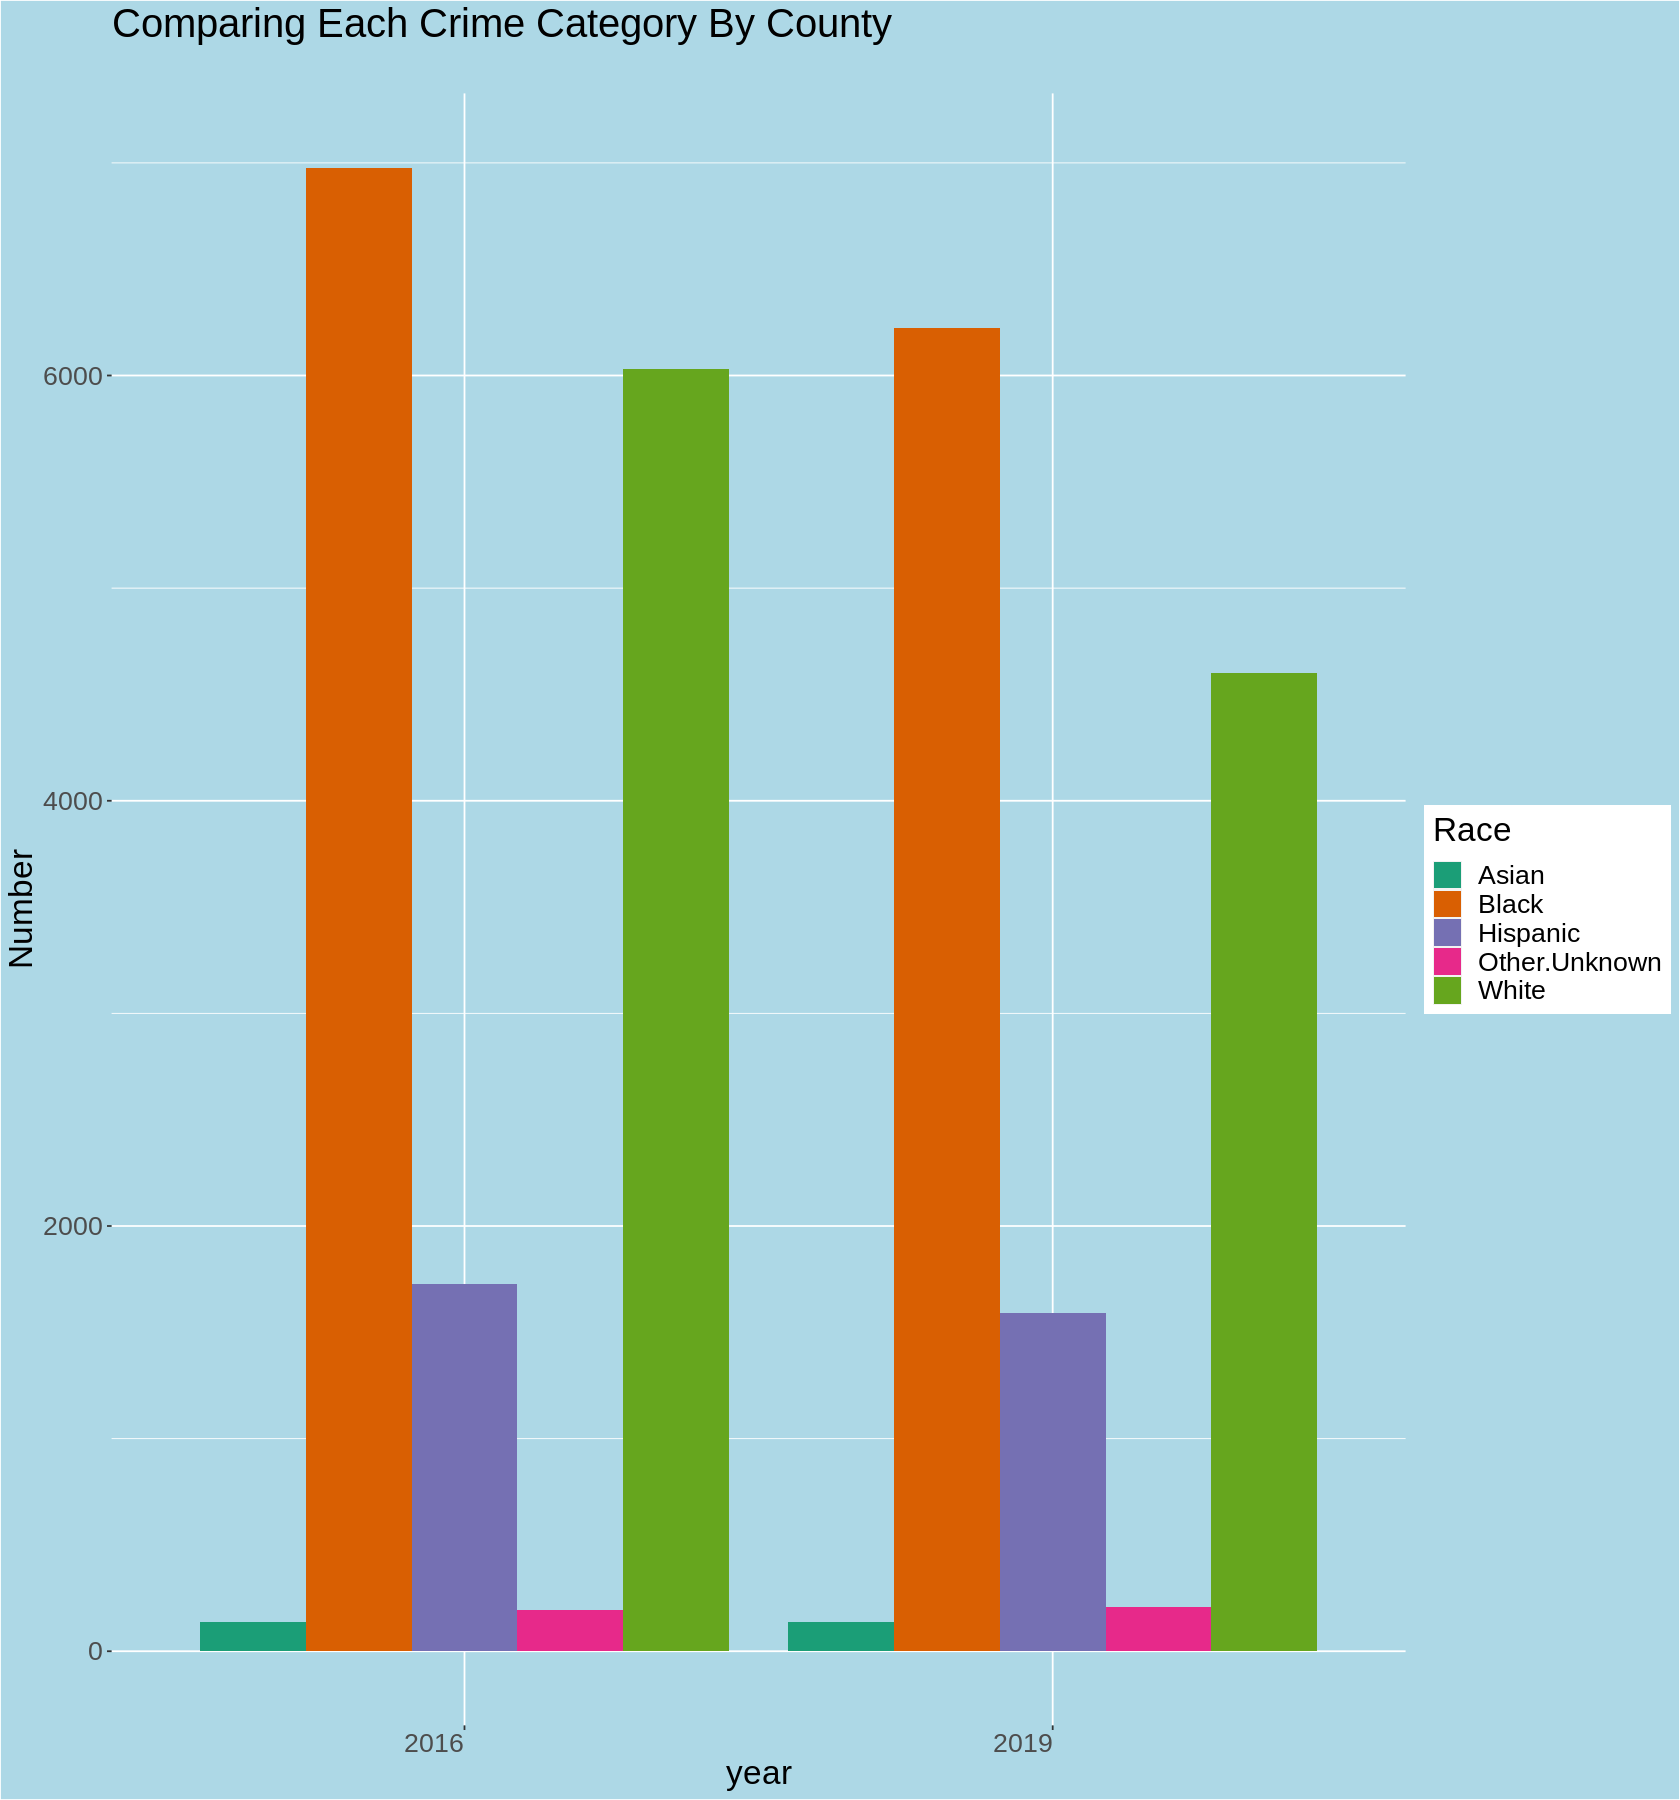

In [65]:
# total Crime by race
ggplot(Total_Arrest_Race, aes( year, Number , fill = Race)) +
                              geom_bar(stat = "identity",position = "dodge")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=90, hjust=1))+
                               scale_fill_brewer(palette = "Dark2")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                       theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=FALSE))

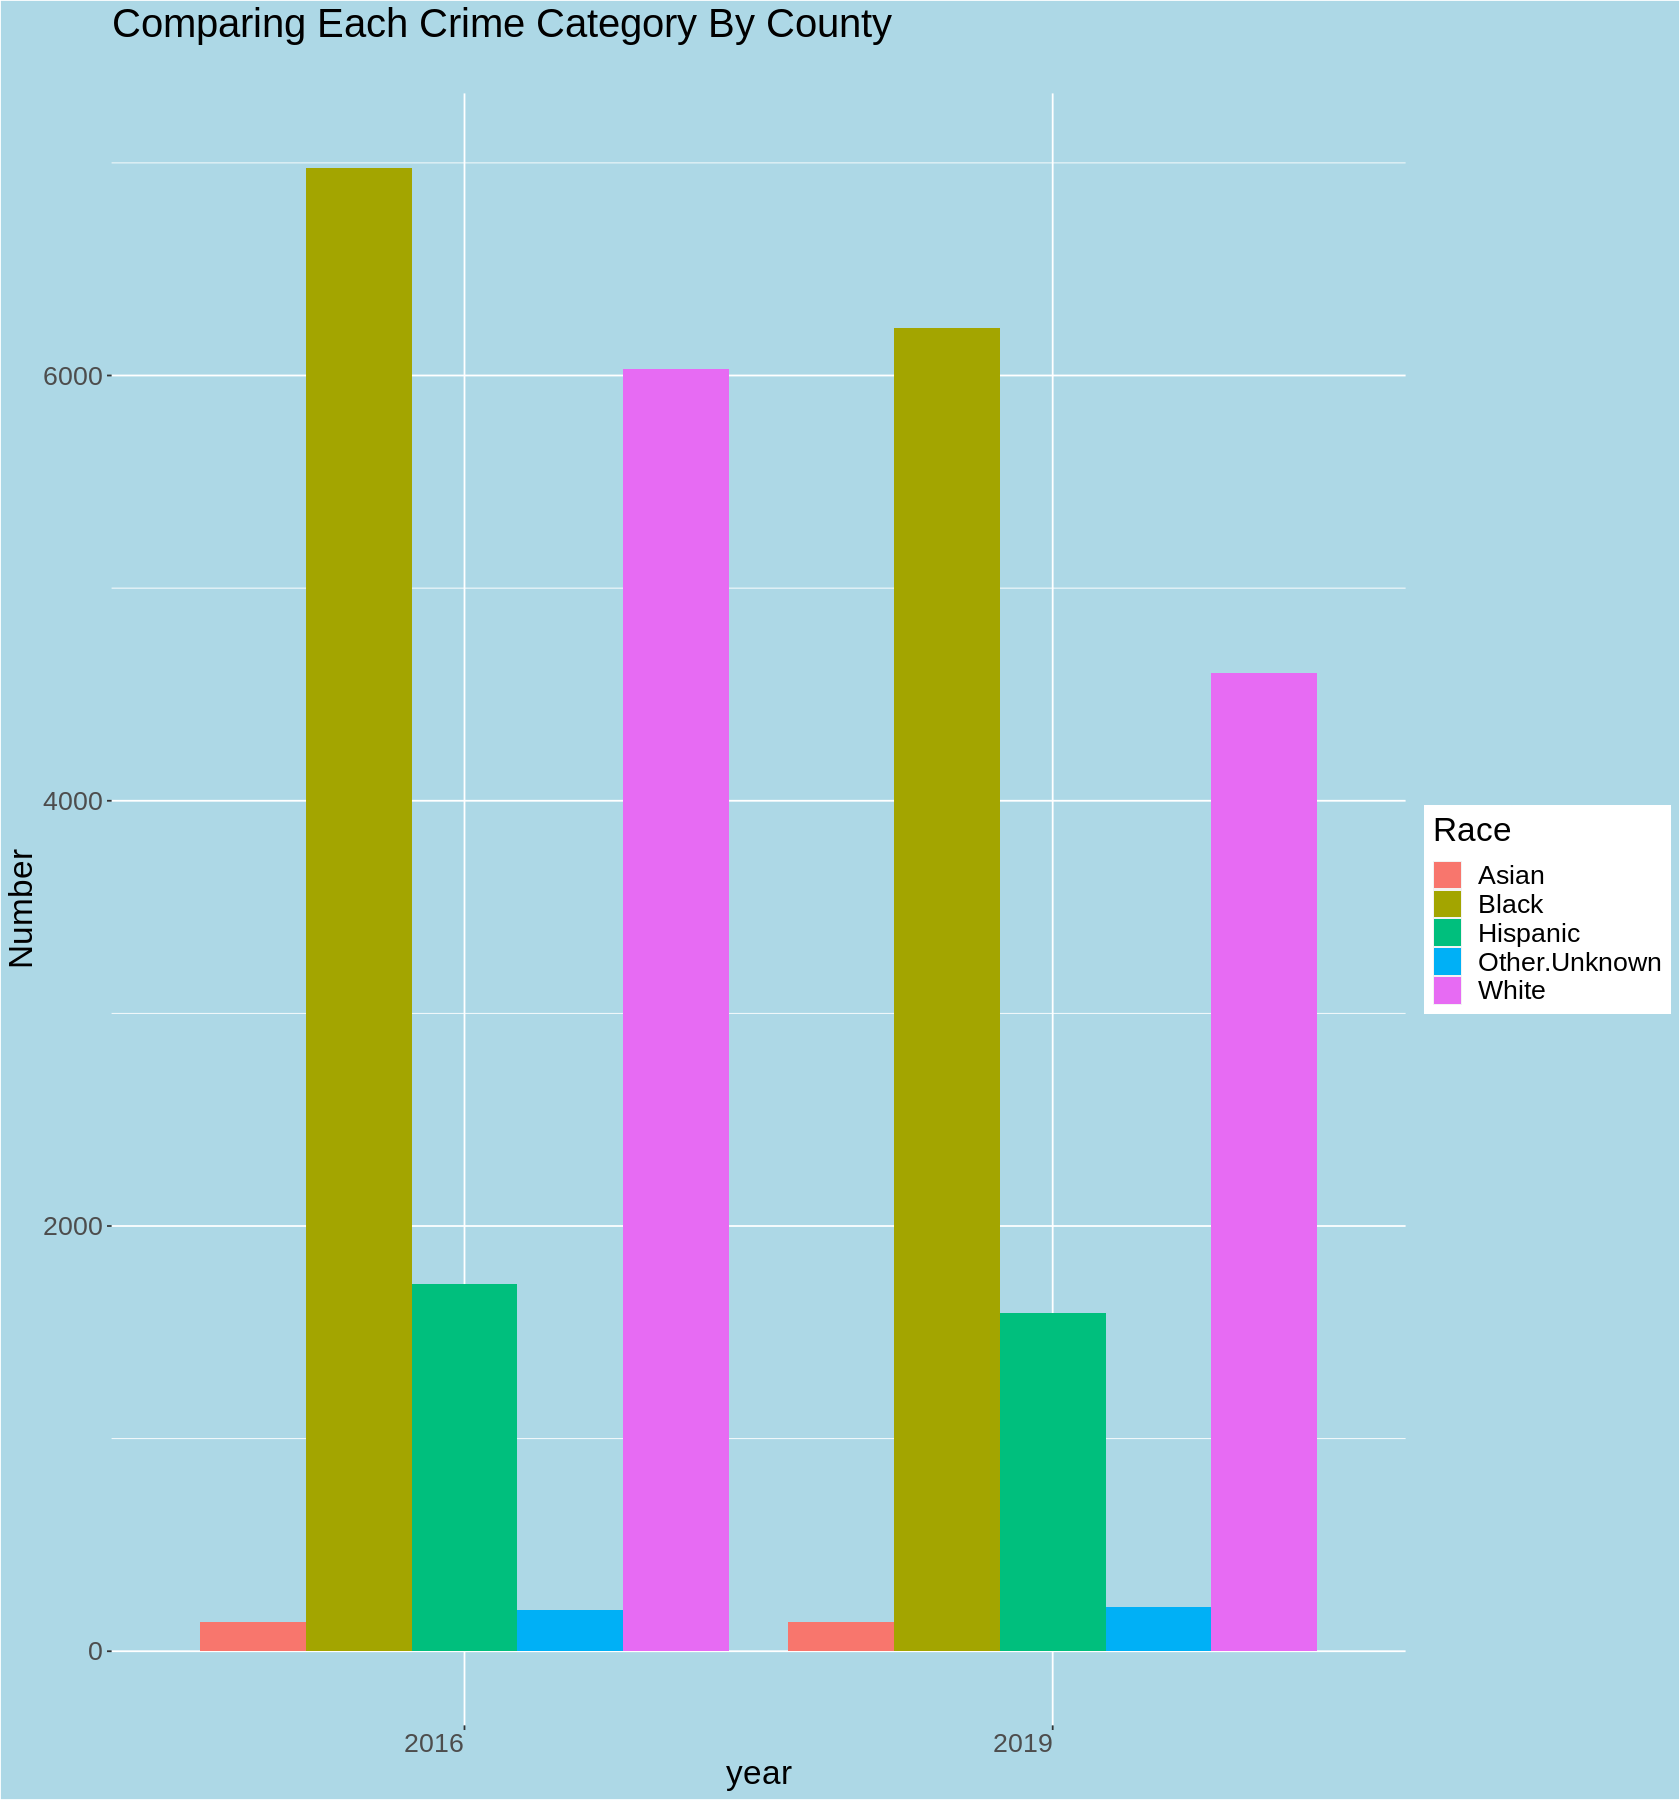

In [66]:
ggplot(Total_Arrest_Race, aes(year, Number , fill = Race)) +
                              geom_bar(stat = "identity",position = "dodge")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
               theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Each Crime Category By County",
                subtitle = "")
                              

In [59]:
Total_Arrest_Race$year <- as.factor(Total_Arrest_Race$year)

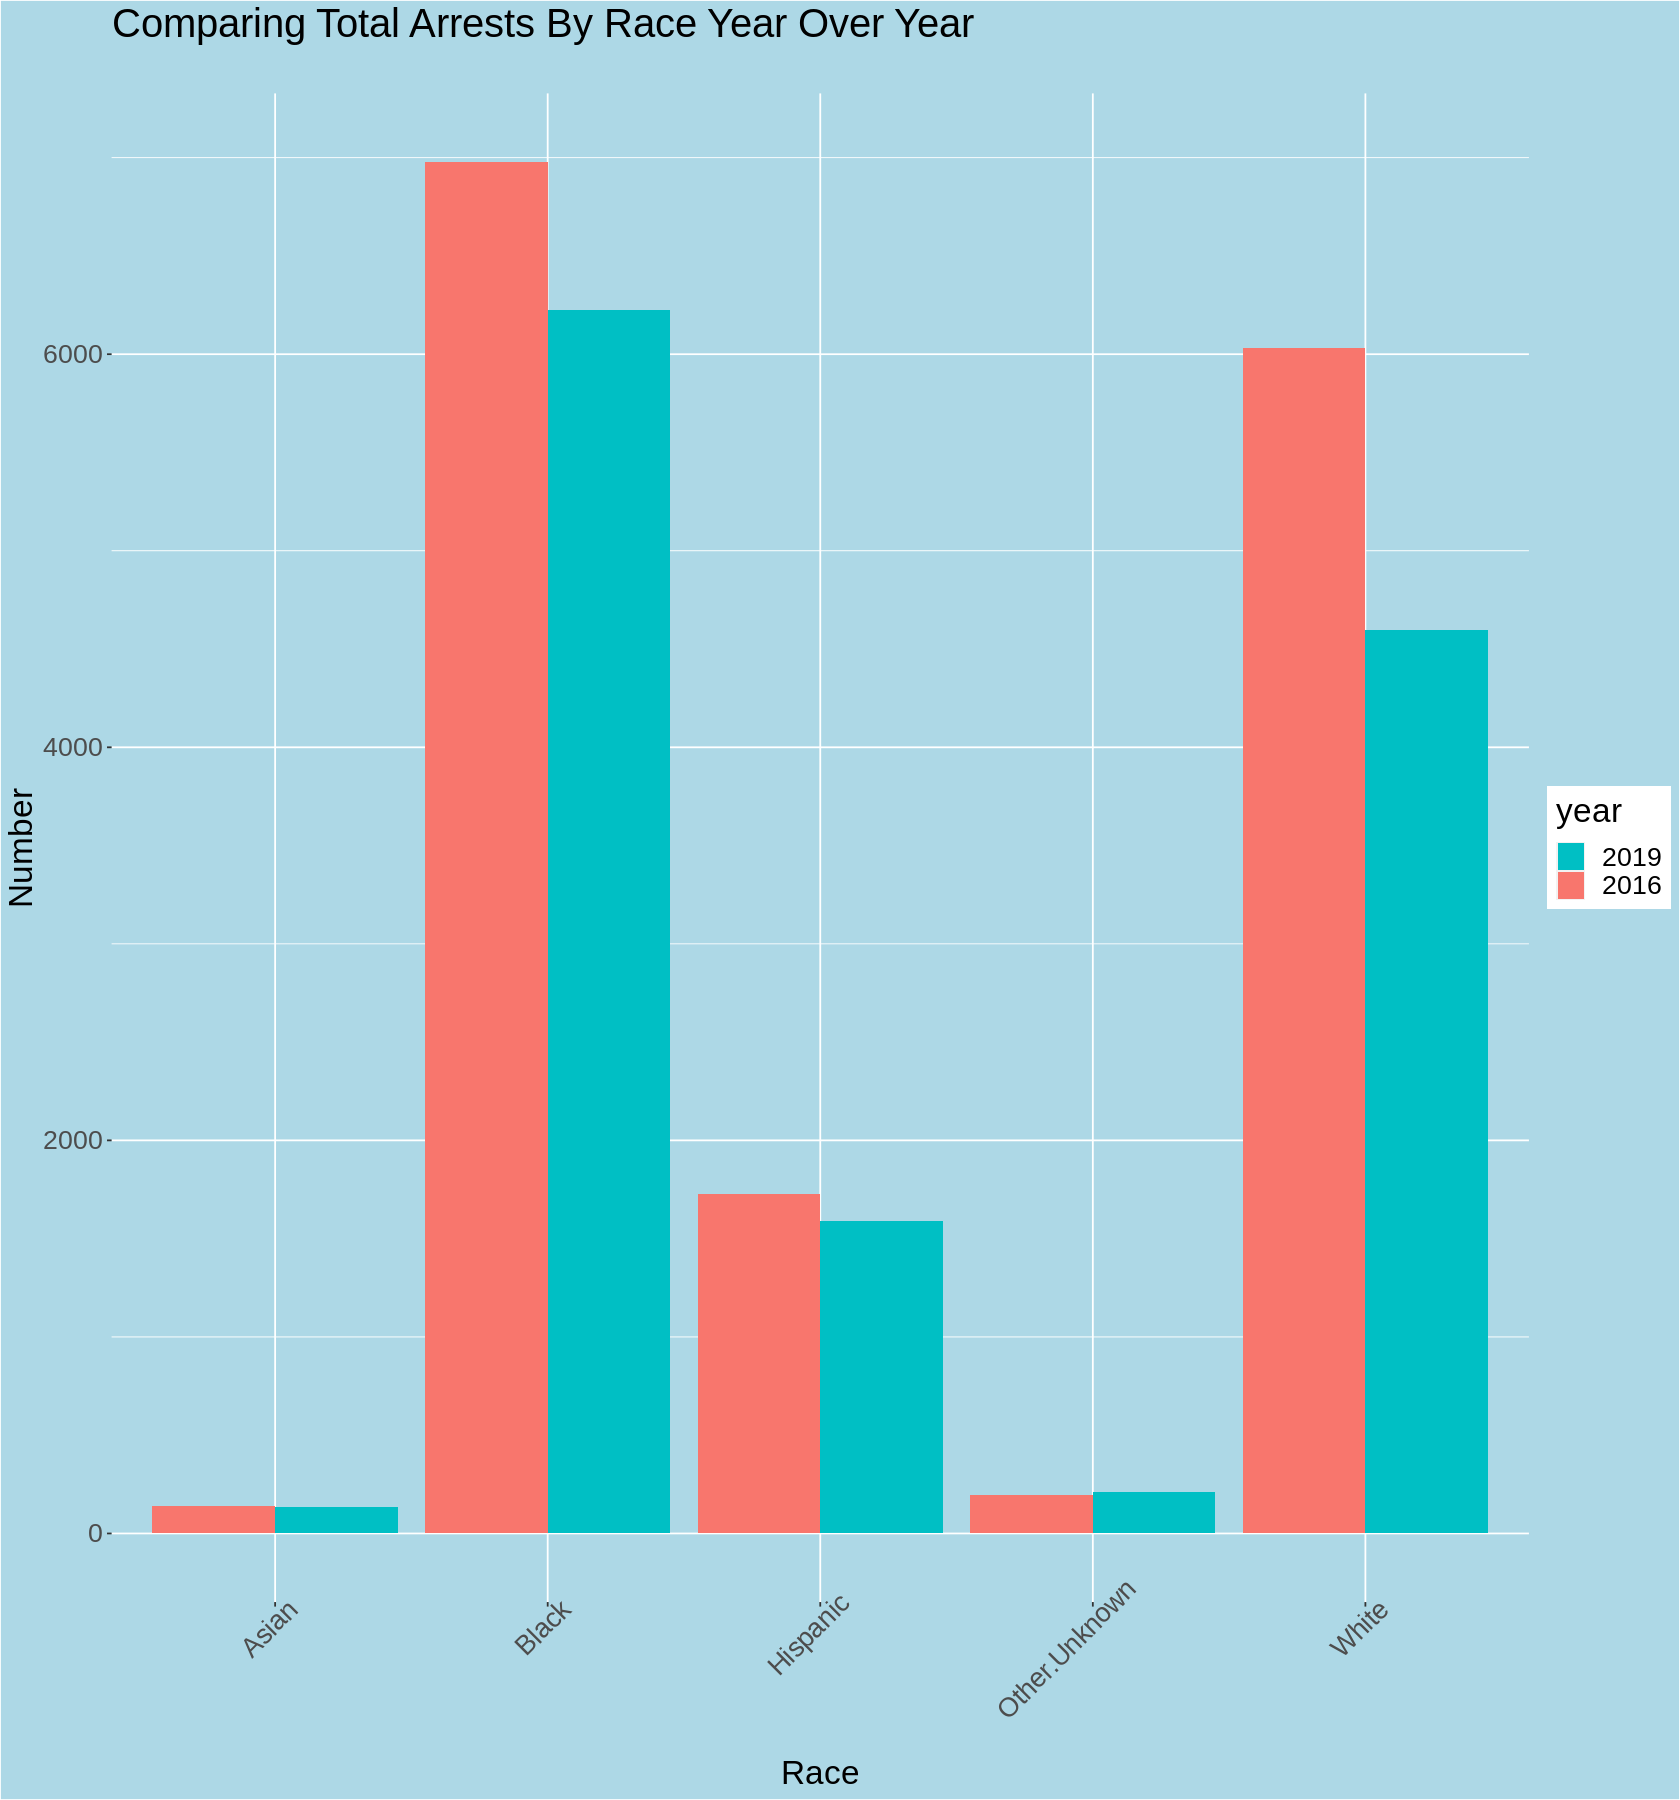

In [67]:
ggplot(Total_Arrest_Race, aes(Race, Number )) +
                              geom_bar(aes(fill= year)  ,stat = "identity",position = "dodge")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Total Arrests By Race Year Over Year",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=TRUE))

##But looking at the percent might be the best way of doing this.

In [87]:
Pct_Total_Arrest_Race  <- Race_long %>%
                  filter(crime == "Total Arrests")

In [90]:
# First filter out the non pct data
target<- c("BlackPct","HispanicPct","AsianPct","WhitePct","OtherPct")

In [91]:
Pct_Total_Arrest_Race <- filter(Pct_Total_Arrest_Race, Race %in% target)

In [ ]:
head(Pct_Total_Arrest_Race)
tail(Pct_Total_Arrest_Race)

In [80]:
write.csv(Pct_Total_Arrest_Race,"Pct_Total_Arrest_Race.csv")

In [92]:
Pct_Total_Arrest_Race$year <- as.factor(Pct_Total_Arrest_Race$year)

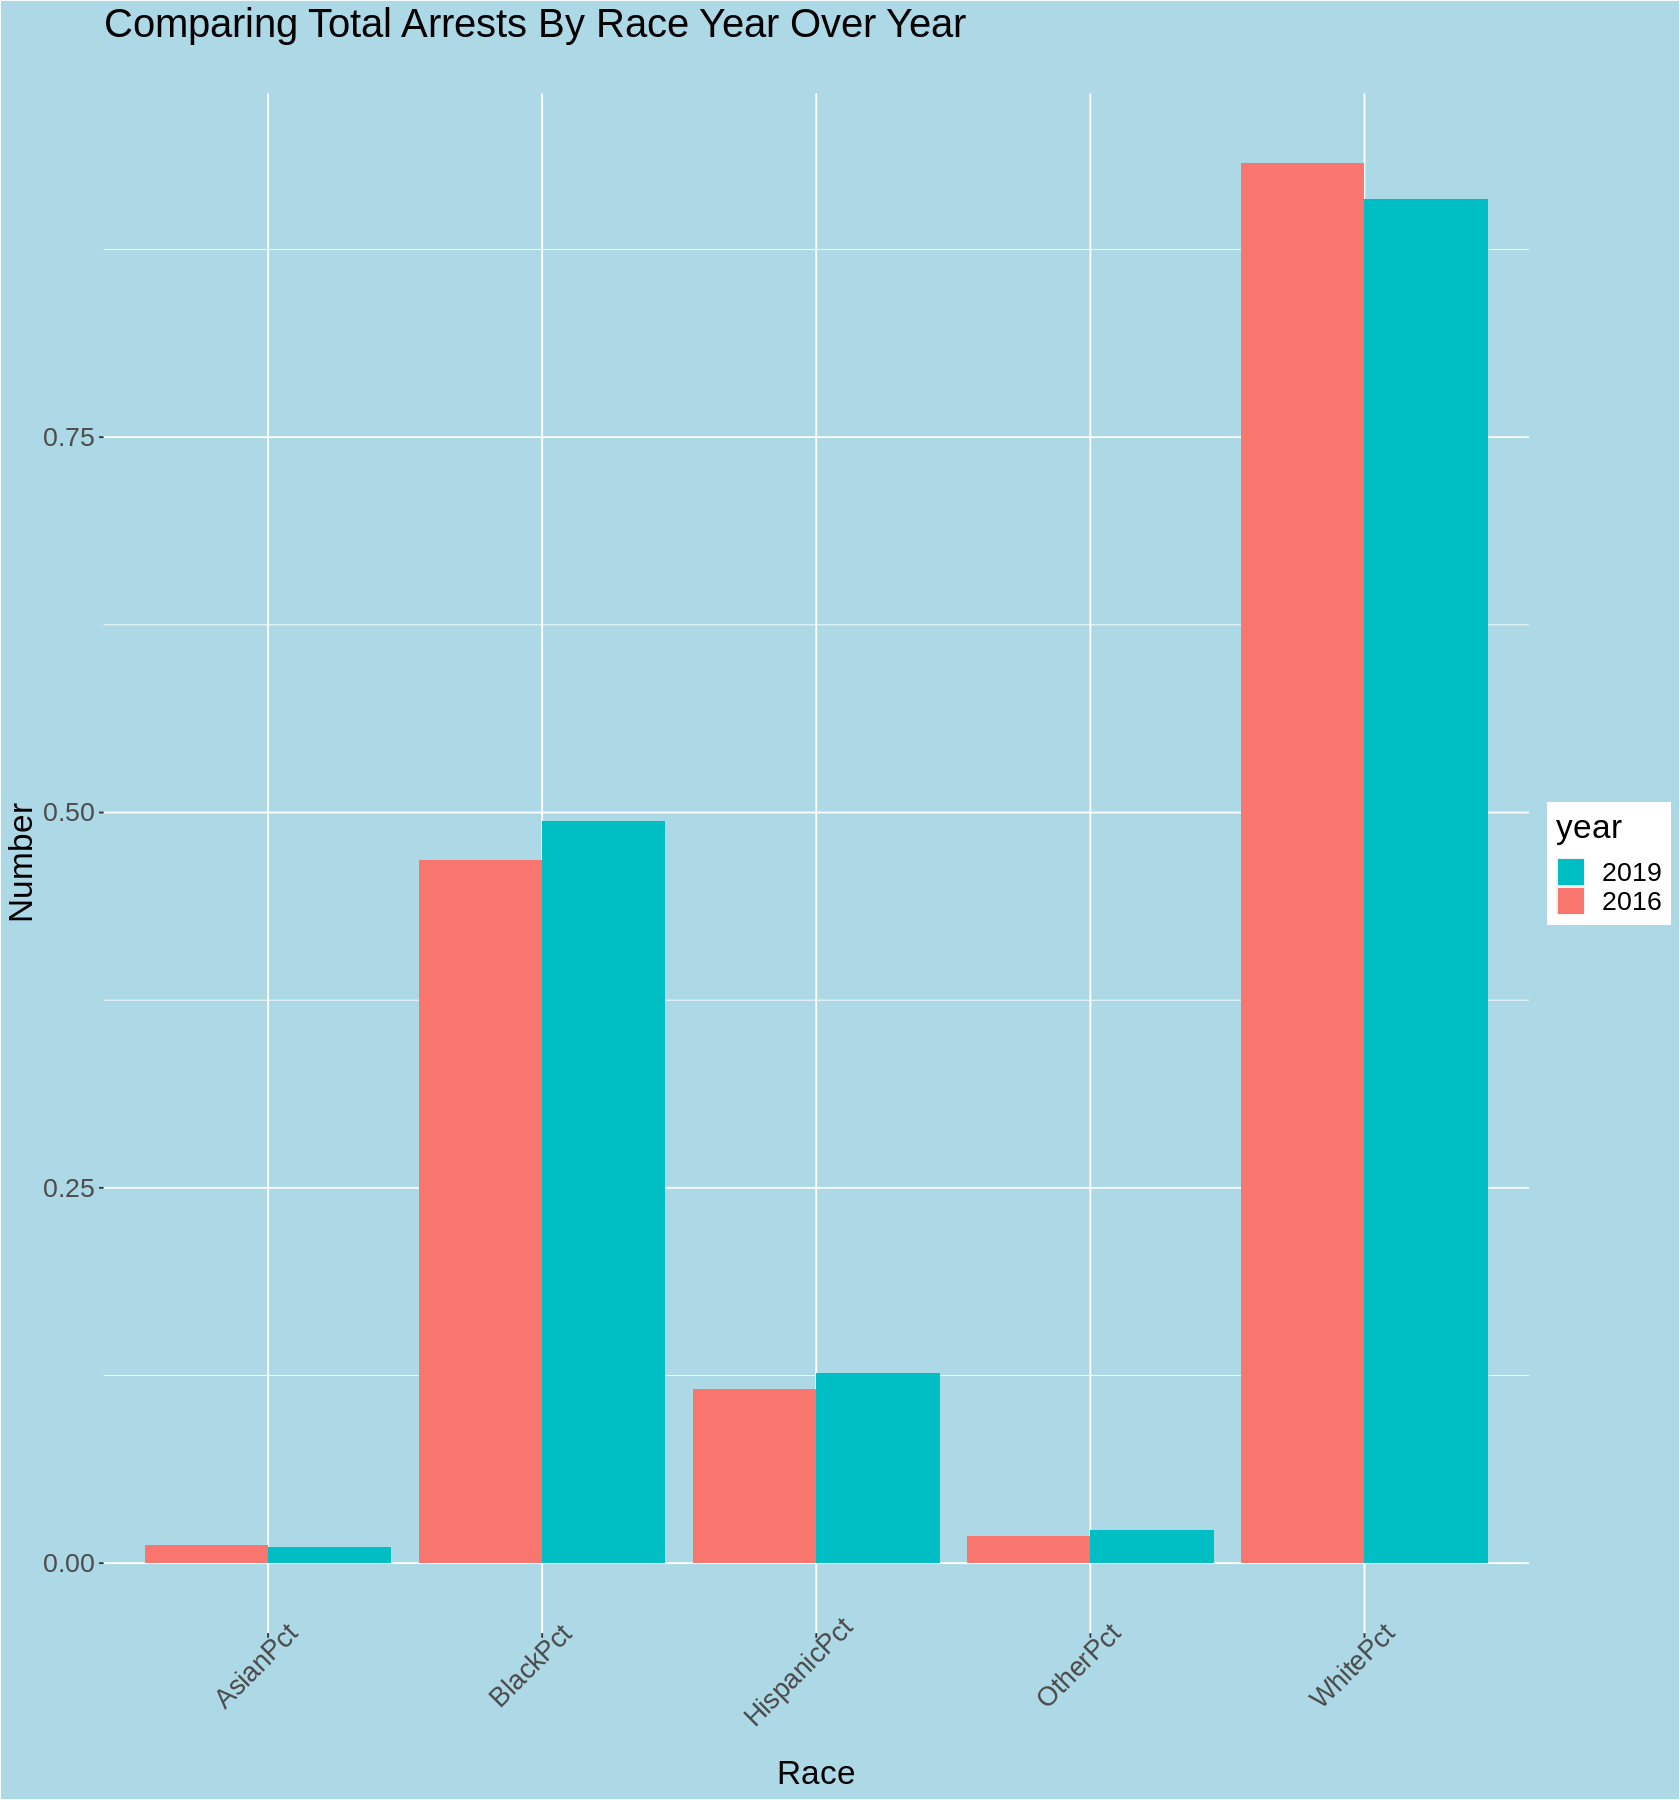

In [93]:
ggplot(Pct_Total_Arrest_Race, aes(Race, Number )) +
                              geom_bar(aes(fill= year)  ,stat = "identity",position = "dodge")+
                               theme(text = element_text(size=20),
                                axis.text.x = element_text(angle= 45, hjust=0.75)) +
                    theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue")) +
                       labs(title = "Comparing Total Arrests By Race Year Over Year",
                subtitle = "")+
                 guides(fill = guide_legend(reverse=TRUE))

In [76]:
head(Pct_Total_Arrest_Race,10)

county,year,crime,Race,Number
<chr>,<int>,<chr>,<chr>,<dbl>
Cayuga,2016,Total Arrests,WhitePct,0.779475983
Cayuga,2016,Total Arrests,BlackPct,0.174672489
Cayuga,2016,Total Arrests,HispanicPct,0.030567686
Cayuga,2016,Total Arrests,AsianPct,0.001455604
Cayuga,2016,Total Arrests,OtherPct,0.013828239
Cayuga,2016,Felony Total,WhitePct,0.754060325
Cayuga,2016,Felony Total,BlackPct,0.213457077
Cayuga,2016,Felony Total,HispanicPct,0.027842227
Cayuga,2016,Felony Total,AsianPct,0.000000000


#JUNK

In [ ]:
demo = data.frame(a=runif(10),b=runif(10,max=2),c=runif(10,max=3))

In [ ]:
demo

a,b,c
<dbl>,<dbl>,<dbl>
0.1804691,0.1229357,2.4332354
0.5716798,1.8828021,2.9127916
0.8935386,1.4217086,2.4332224
0.3867491,0.8896677,2.6117453
0.5350039,0.7121061,2.5428345
0.4931763,1.0089910,2.2717623
0.6640282,0.2949436,1.0544608
0.2704109,0.1024970,0.1036818
0.2065407,1.0145047,2.5926326


In [ ]:
df <- data.frame(colname = names(demo),colSums_demo=colSums(demo))
df

,colname,colSums_demo
,<chr>,<dbl>
a,a,5.097432
b,b,8.040834
c,c,21.805530


In [ ]:
#setting seed
set.seed(20)

In [ ]:
#creating a random dataframe
df <- data.frame(date=paste(rep(2000:2017, each=4),"Q",rep(1:4, 18)), GDP= cumsum(sample(c(-0.5, 3), 72, TRUE)))

In [ ]:
head(df)

,date,GDP
,<chr>,<dbl>
1,2000 Q 1,3.0
2,2000 Q 2,2.5
3,2000 Q 3,2.0
4,2000 Q 4,5.0
5,2001 Q 1,8.0
6,2001 Q 2,7.5


In [ ]:
#calculating the annual percentage change
df <- df %>% mutate(change=(GDP-lag(GDP,4))/lag(GDP,4)*100)

In [ ]:
df

date,GDP,change
<chr>,<dbl>,<dbl>
2000 Q 1,3.0,NA
2000 Q 2,2.5,NA
2000 Q 3,2.0,NA
2000 Q 4,5.0,NA
2001 Q 1,8.0,166.666667
2001 Q 2,7.5,200.000000
2001 Q 3,10.5,425.000000
2001 Q 4,10.0,100.000000
2002 Q 1,13.0,62.500000


In [ ]:
data <- data.frame(year = c(2003:2013),
                   gdp = c(7696034.9, 8690254.3, 9424601.9, 10520792.8,
                           11399472.2, 12256863.6, 12072541.6, 13266857.9,
                           14527336.9, 15599270.7, 16078959.8))

In [ ]:
head(data)

,year,gdp
,<int>,<dbl>
1,2003,7696035
2,2004,8690254
3,2005,9424602
4,2006,10520793
5,2007,11399472
6,2008,12256864


In [ ]:
growth_rate <- function(x)(x/lag(x)-1)*100 

In [ ]:
data$growth_rate <- growth_rate(data$gdp)

In [ ]:
head(data)

,year,gdp,growth_rate
,<int>,<dbl>,<dbl>
1,2003,7696035,NA
2,2004,8690254,12.918593
3,2005,9424602,8.450243
4,2006,10520793,11.631164
5,2007,11399472,8.351836
6,2008,12256864,7.521325


In [ ]:
fake_data <- read.csv("/content/Drop_Out_School_FAKE - makebelievedata.csv")

In [ ]:
head(fake_data)
tail(fake_data)

,state,drop_out
,<chr>,<dbl>
1,Alabama,7.7
2,Alaska,2.8
3,Arizona,8.5
4,Arkansas,6.8
5,California,6.0
6,Colorado,6.4


,state,drop_out
,<chr>,<dbl>
45,Vermont,-2.7
46,Virginia,-4.2
47,Washington,-7.1
48,West Virginia,-6.7
49,Wisconsin,-4.7
50,Wyoming,-4.3


In [ ]:
#fake_data$drop_out <- as.numeric(as.character(fake_data$drop_out))

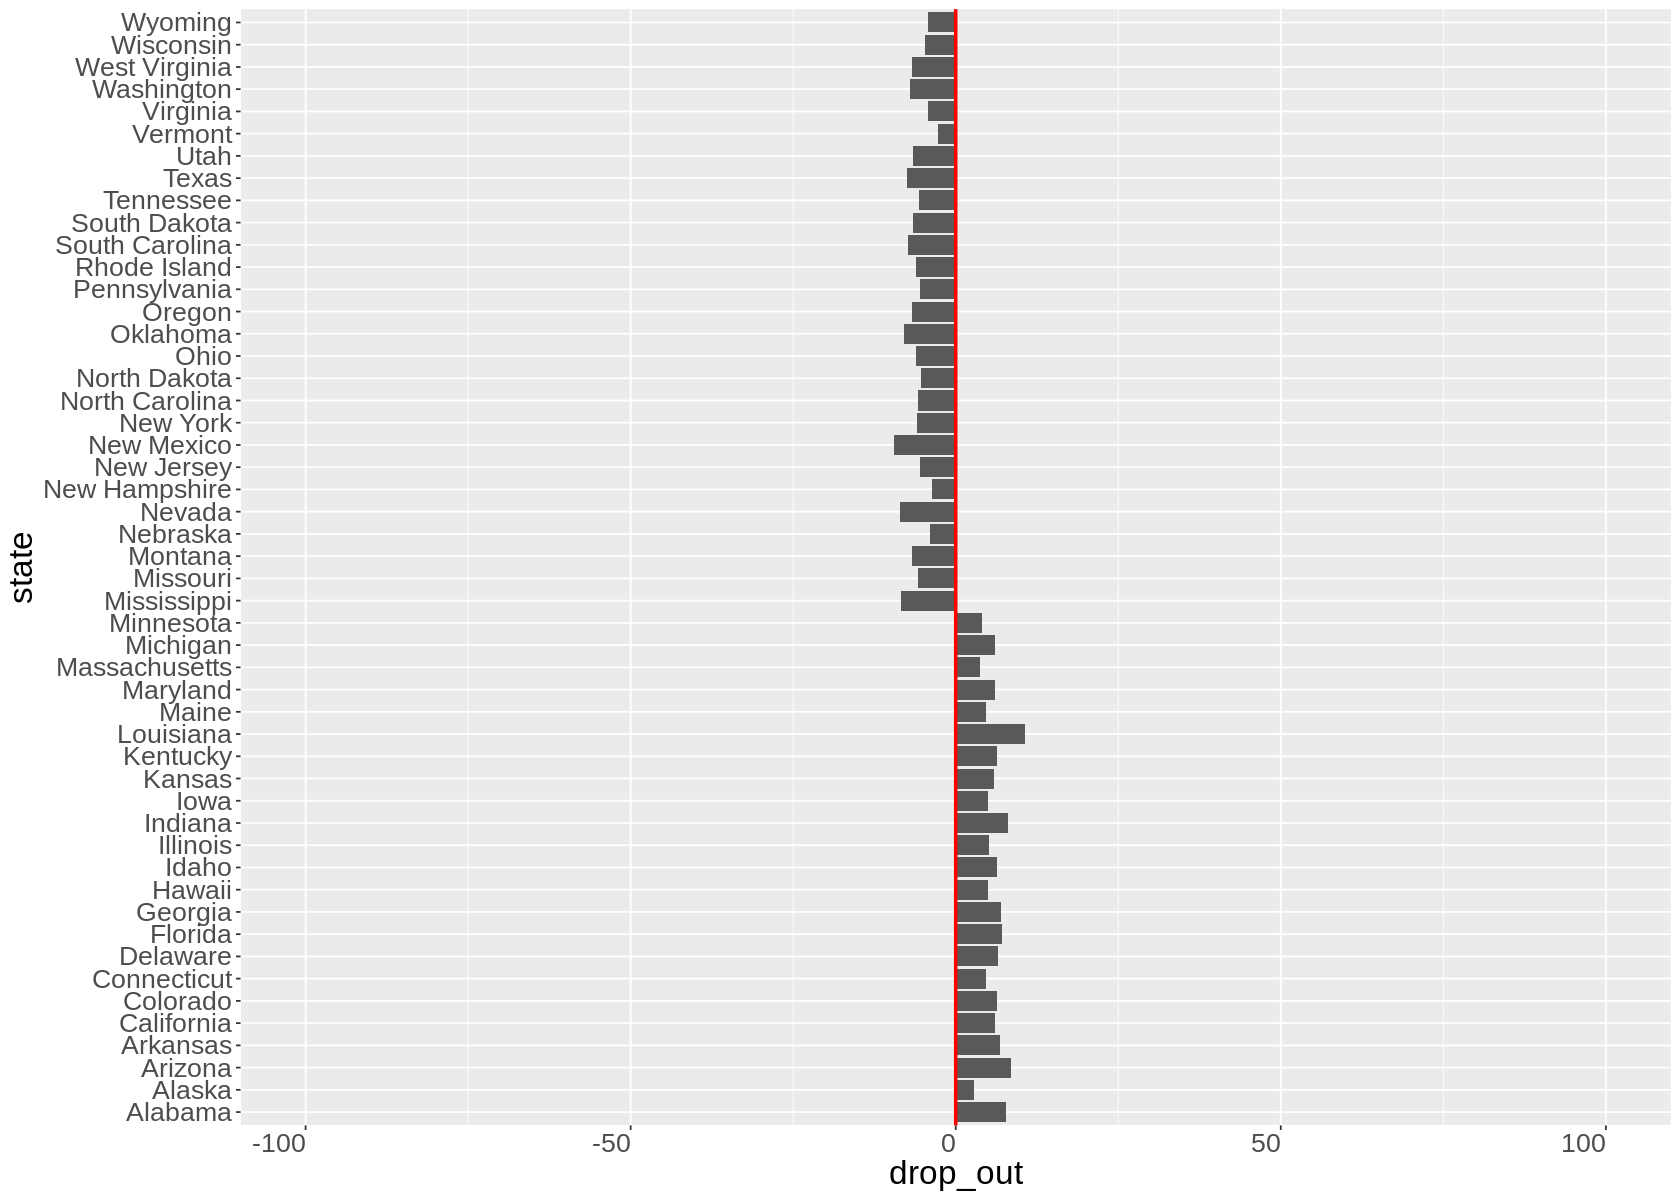

In [ ]:
ggplot(fake_data, aes(x= state , y = drop_out)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(-100,100)+
        coord_flip()+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "red", size=1)

In [ ]:
data <- structure(list( Date = structure(c(1L, 1L, 1L, 1L, 1L, 2L, 2L, 2L, 2L, 2L), 
                                        .Label = c("11-May-18", "18-May-18"), 
                                        class = "factor"), 
                        Party = structure(c(5L, 3L, 2L, 1L, 4L, 5L, 3L, 2L, 1L, 4L), 
                                         .Label = c("Green", "Liberal", "NDP", "Others", "PC"), 
                                         class = "factor"), 
                        Pct = c(42.3, 28.4, 22.1, 5.4, 1.8, 41.9, 29.3, 22.3, 5, 1.4)), 
                  class = "data.frame", 
                  row.names = c(NA, -10L))

In [ ]:
data

Date,Party,Pct
<fct>,<fct>,<dbl>
11-May-18,PC,42.3
11-May-18,NDP,28.4
11-May-18,Liberal,22.1
11-May-18,Green,5.4
11-May-18,Others,1.8
18-May-18,PC,41.9
18-May-18,NDP,29.3
18-May-18,Liberal,22.3
18-May-18,Green,5.0


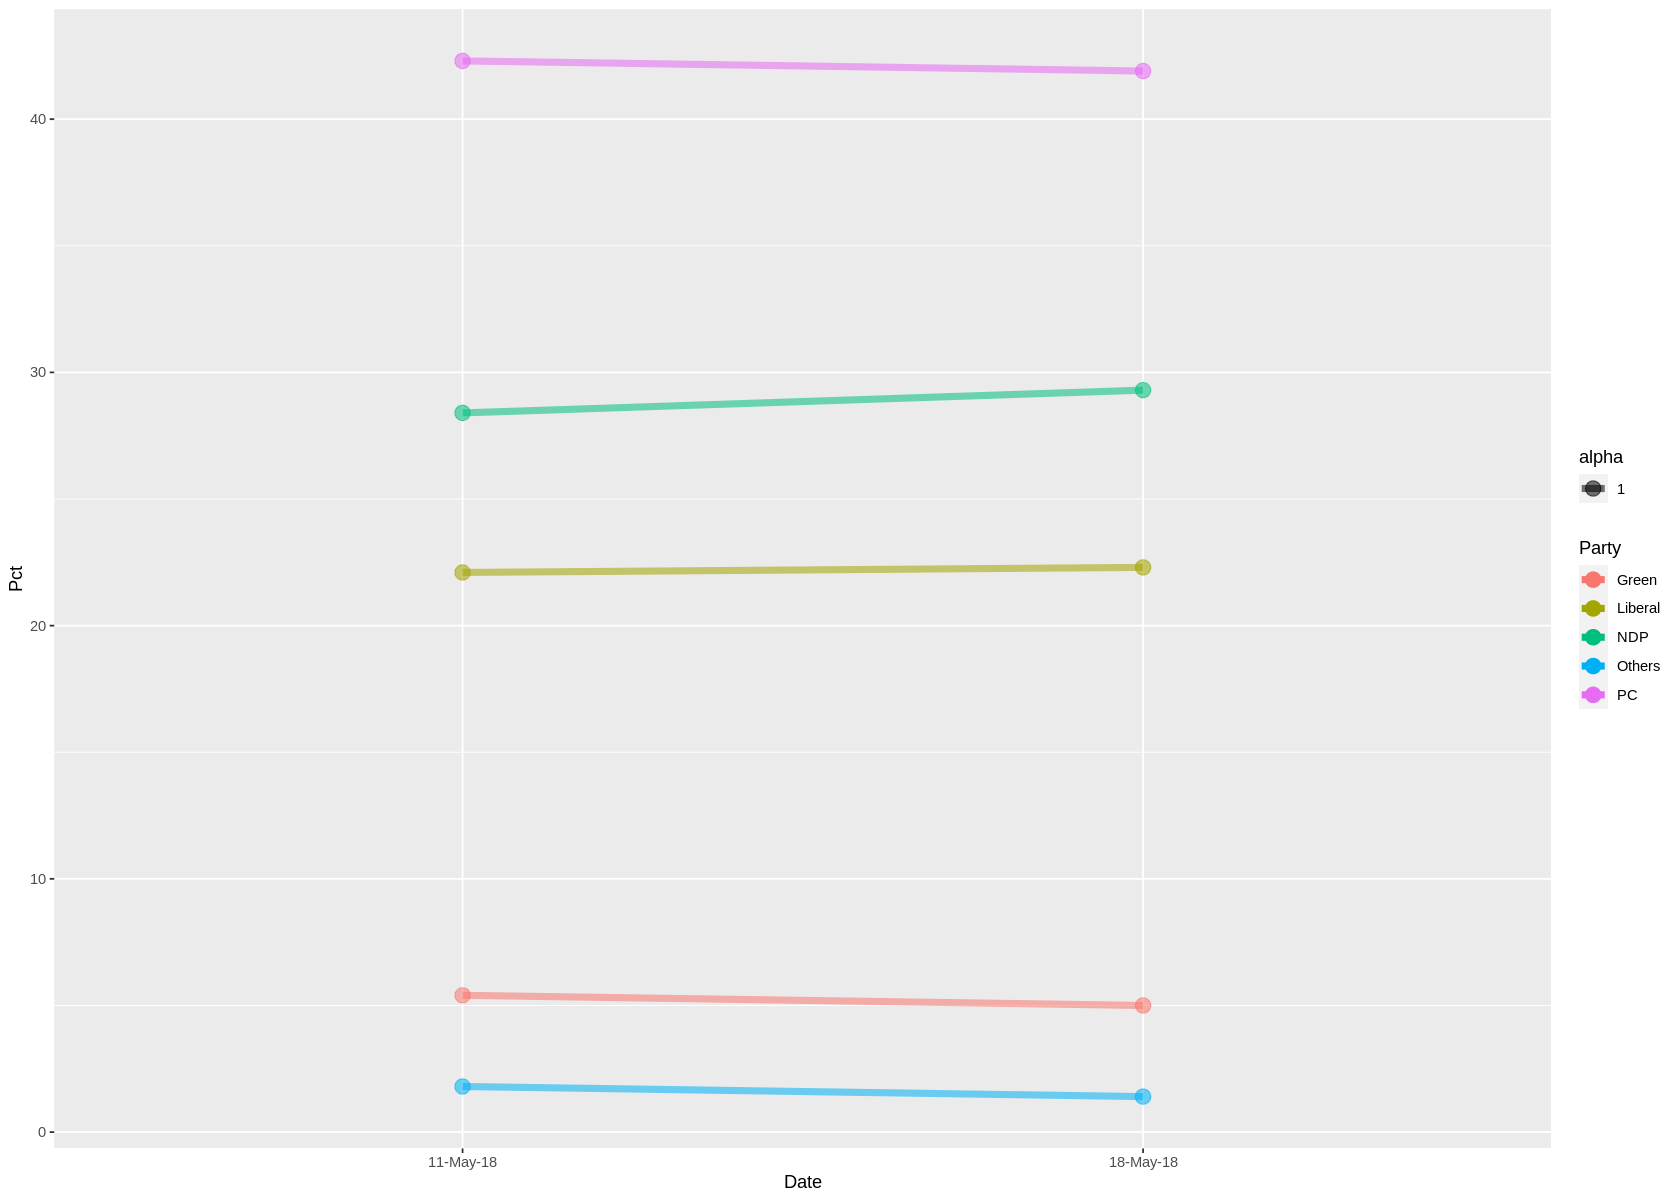

In [ ]:
ggplot(data = data, aes(x = Date, y = Pct, group = Party)) +
  geom_line(aes(color = Party, alpha = 1), size = 2) +
  geom_point(aes(color = Party, alpha = 1), size = 4)

# Divergent

In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car name,mpg_z,mpg_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>
Cadillac Fleetwood,10.4,8,472,205,2.93,5.250,17.98,0,0,3,4,Cadillac Fleetwood,-1.61,below
Lincoln Continental,10.4,8,460,215,3.00,5.424,17.82,0,0,3,4,Lincoln Continental,-1.61,below
Camaro Z28,13.3,8,350,245,3.73,3.840,15.41,0,0,3,4,Camaro Z28,-1.13,below
Duster 360,14.3,8,360,245,3.21,3.570,15.84,0,0,3,4,Duster 360,-0.96,below
Chrysler Imperial,14.7,8,440,230,3.23,5.345,17.42,0,0,3,4,Chrysler Imperial,-0.89,below
Maserati Bora,15.0,8,301,335,3.54,3.570,14.60,0,1,5,8,Maserati Bora,-0.84,below


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'CarBrand' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

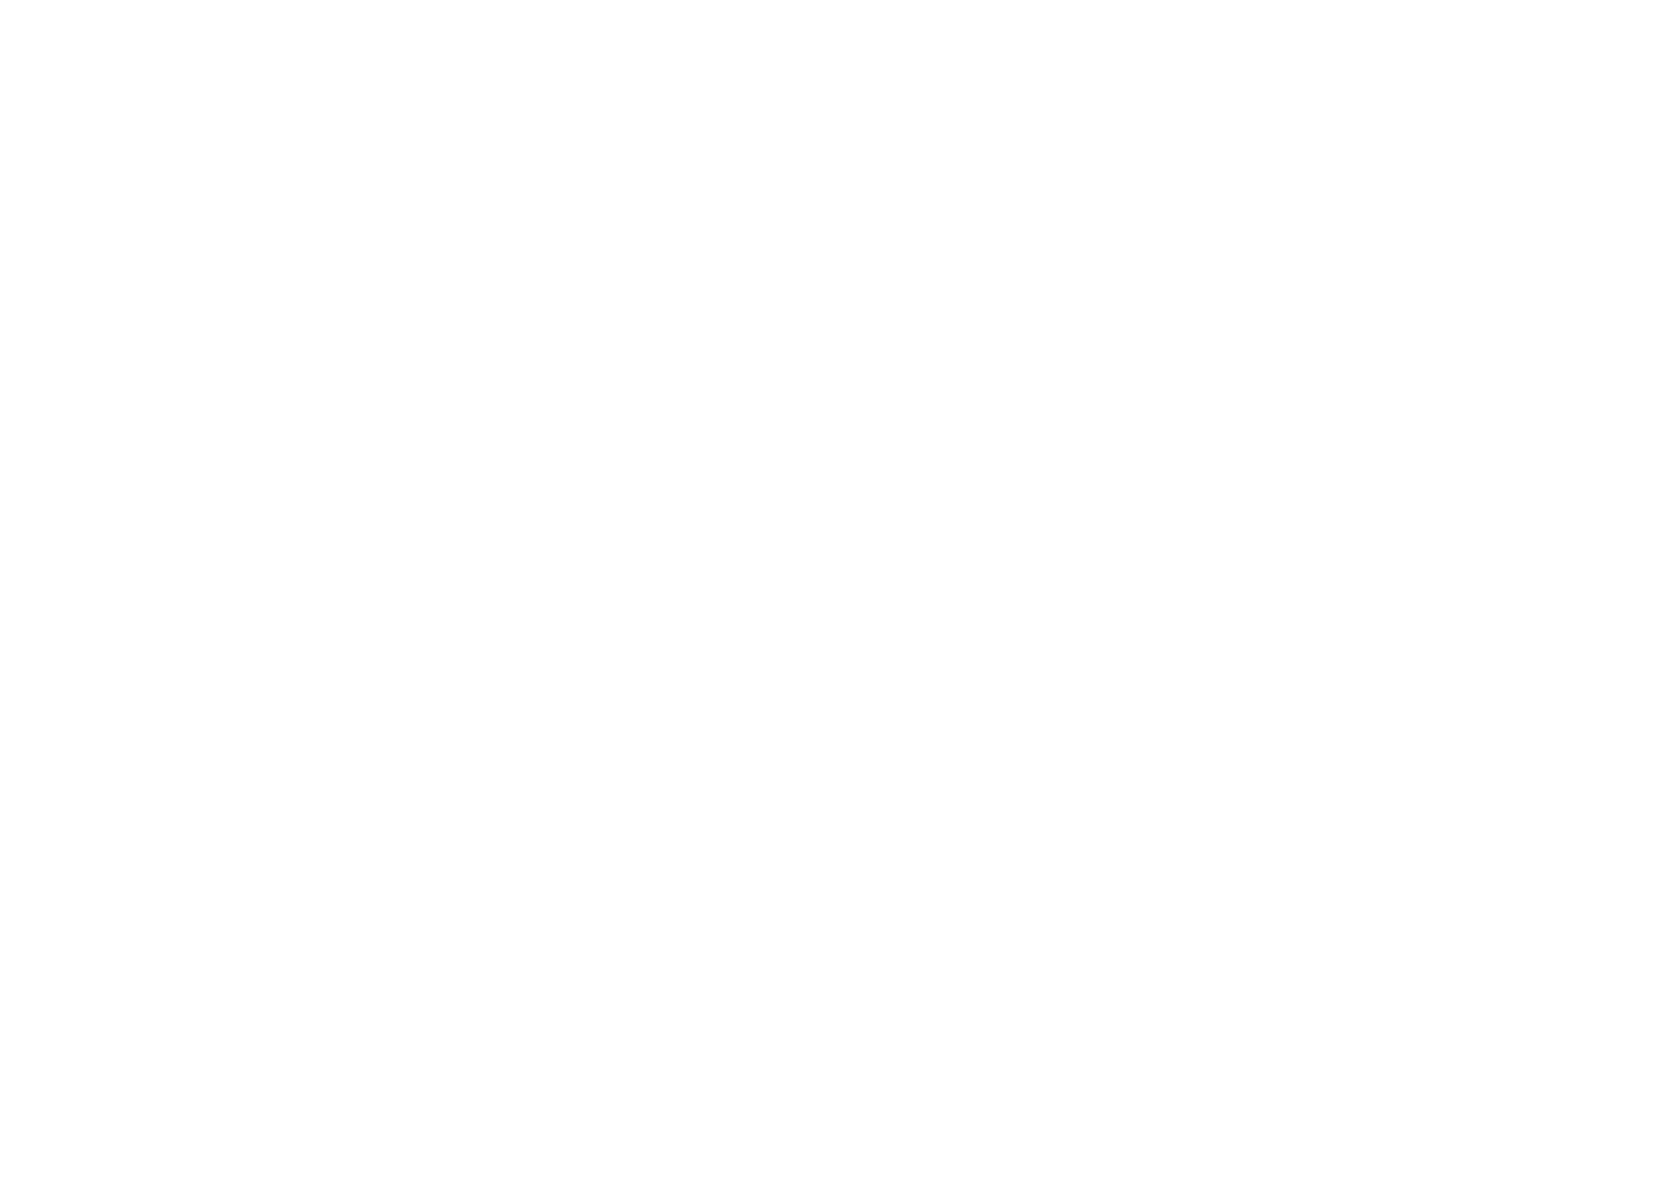

In [ ]:
ggplot(mtcars, aes(x=CarBrand, y=mpg_z_score, label=mpg_z_score)) +
geom_bar(stat='identity', aes(fill=mpg_type), width=.5) +
scale_fill_manual(name="Mileage (deviation)",
labels = c("Above Average", "Below Average"),
values = c("above"="#00ba38", "below"="#0b8fd3")) +
labs(subtitle="Z score (normalised) mileage for mtcars'",
title= "Diverging Bar Plot (ggplot2)", caption="Produced by Gary Hutson")+
coord_flip()